<div style='text-align: center;'>
    <h1><b>Machine Learning for Engineering and Science Applications</b></h1>
    <h2>Week-4 Linear Regression and Gradient Descent</h2>
</div>

Pre-requisite to understand the code
* Basic Knowledge in Python
* Knowledge on Vectorization and Vector Manipulation
<br>
<br>

Resources for understanding this section
1. MLESA Week - 1 and Week - 4 Lectures (https://nptel.ac.in/courses/106106198)
2. Normal Equations (https://www.datacamp.com/tutorial/tutorial-normal-equation-for-linear-regression)
3. Vectorization (https://machinelearningcompass.com/machine_learning_math/vectorization/)
<br>

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

<div style='text-align: center;'>
    <h2>Input Data</h2>
</div>

In [2]:
# Set a random seed for reproducibility
np.random.seed(1)

# Generate a dataset with features (X) and a target variable (Y)
num_samples = 100

X = np.random.rand(num_samples)
Y = 2 * X + 0.4 * np.random.randn(num_samples)  # Linear relation with some noise

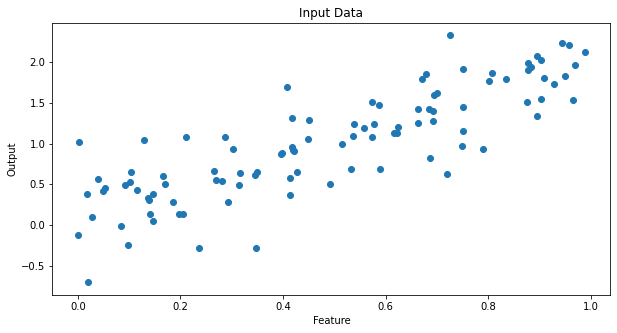

In [3]:
# Visualize data
fig= plt.figure(figsize=(10,5))
plt.title("Input Data")
plt.xlabel("Feature")
plt.ylabel("Output")
plt.plot(X,Y, marker='o', linestyle='none')
plt.show()

<div style='text-align: center;'>
    <h2>A. Linear Regression using Normal Equation</h2>
</div>

The normal equation is a closed-form solution used to find the value of weights that minimizes the cost function. Another way to describe the normal equation is as a one-step algorithm used to analytically find the coefficients that minimize the loss function.\
<br>
The formula for Normal Equation is:
<div align="center">
  $W = (X^T X)^{-1} X^T Y$
</div>
<br>
W - Weights for the Linear Regression model (Parameters that minimize the loss function)<br>
X - Input Features<br>
Y - Output

In [4]:
# Linear Regression Model
class LinearRegression_NE:
    
    def __init__(self, x, y):
        # Number of Samples
        self.samples = x.size
        # Augment 1 to every instance to accomodate for the Bias
        self.x = np.column_stack((np.ones_like(x), x))
        self.y = y
    
    # Compute Weight using the Normal Equations
    def train(self):
        XTX = np.dot(self.x.T, self.x) # X^T X
        XTY = np.dot(self.x.T, self.y) # X^T Y
        self.w = np.dot (np.linalg.inv(XTX), XTY)
        return self.w
    
    # Predict values for new data
    def predict(self, x):
        return np.dot(self.x, self.w)       

In [5]:
# Initiate the model
model = LinearRegression_NE(X, Y)

In [6]:
# Compute the weights
weights = model.train()
print("w =", weights)

w = [0.0947829  1.87397004]


In [7]:
# Predict the values
Y_HAT = model.predict(X)

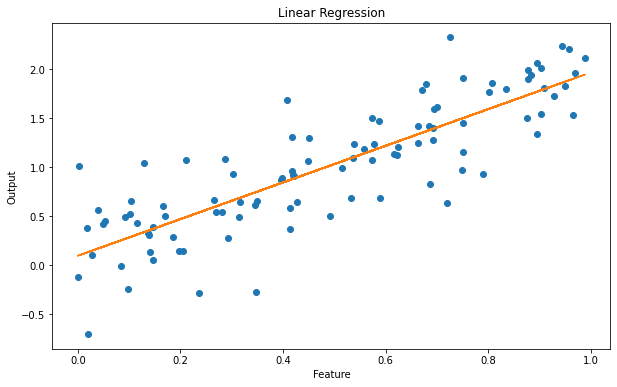

In [8]:
# Plot the regression line
fig= plt.figure(figsize=(10,6))
plt.title("Linear Regression")
plt.xlabel("Feature")
plt.ylabel("Output")
plt.plot(X,Y, marker='o', linestyle='none')
plt.plot(X,Y_HAT)
plt.show()

### Advantages of Normal Equation

>**Analytical Solution**: The normal equations provide an analytical or closed-form solution to the linear regression problem. >This means that you can directly compute the optimal weights without the need for iterative optimization algorithms.
>
>**Efficiency for Small Datasets**: When dealing with small to moderately sized datasets, the normal equations can be >computationally efficient compared to iterative optimization methods like gradient descent. In such cases, the direct solution >provided by the normal equations may be faster.
>
>**No Need for Learning Rate**: Unlike iterative optimization algorithms, such as gradient descent, the normal equations do not >require the specification of a learning rate. This can simplify the process of finding optimal weights, as learning rates in >iterative methods can sometimes be tricky to choose.
>
>**No Convergence Issues**: The normal equations always provide a solution if the matrix $X^T X$ is invertible. In practice, >issues related to convergence, which may be encountered in iterative optimization algorithms, are not a concern when using the >normal equations.


### Challenges with Normal Equation

>**Computational Complexity**: Computing the normal equation becomes computationally challenging when the number of features in >our dataset is large.The reason for this is that in order to solve for the parameters $W$, the term $(X^T X)^{-1}$ must be >computed. Computing $X^T X$ produces an n x n matrix and for most computer implementations, the computational complexity of >matrix conversion grows approximately as the cube of the dimensions of the matrix. This means the inverse operation runs in the >normal equation run extremely slow when n is very large.
>
>**Sensitivity to Matrix Inversion**: The normal equations rely on the inversion of the matrix $X^T X$. If this matrix is close >to being singular or ill-conditioned, numerical stability issues may arise, leading to inaccuracies in the solution.

<div style='text-align: center;'>
    <h2>B. Linear Regression using Gradient Descent</h2>
</div>

Gradient descent is an iterative optimization algorithm to find the minimum of a function. 

Instead of directly computing the ideal values for our variables, we instead approach them step by step. In a nutshell, gradient descent starts with a random function and continuously improves it until it can no longer be improved.

### Simple Model

In [9]:
# Simple Linear Regression Model - Only 2 weights
class SimpleLinearRegression:
    
    def __init__(self, x, y, learning_rate, epoch):
        # Number of Samples
        self.samples = x.size
        # Augment 1 to every instance to accomodate for the Bias
        self.x = np.column_stack((np.ones_like(x), x))
        self.y = y
        self.alpha = learning_rate
        self.epoch = epoch
        # Initiate gradients and weights to zero
        self.w = np.zeros(2)
        self.gradient = np.zeros(2)
    
    # Mean Square Error loss function
    def compute_loss(self):
        error = self.y - self.y_hat
        loss = 1/(self.samples) * np.dot(error.T, error)
        return loss
    
    # Compute gradients
    def compute_gradient(self):
        self.gradient[0] = -(2/self.samples) * sum(self.y - self.y_hat)
        self.gradient[1] = -(2/self.samples) * sum(np.dot(self.x.T , (self.y - self.y_hat)))
    
    # Compute Weight using the Gradient descent
    def train(self, show_training_updates = False):
        self.loss_history=[]            
        for i in range(self.epoch):
            # Predict and Calculate Loss
                self.y_hat = np.dot(self.x,self.w)
                loss = self.compute_loss() 
                self.loss_history.append(loss)
            # Perform optimization
                # Compute gradient
                self.compute_gradient()
                # Update weights
                self.w = self.w - (self.alpha * self.gradient)
            # Plot Training updates         
                if show_training_updates:
                    plt.figure(figsize=(8, 4),  dpi=80) 
                    plt.title('Training Update Epoch: {}'.format(str(i+1)))
                    plt.plot(self.x[:, 1], self.y, marker='o', linestyle='none')
                    plt.plot(self.x[:, 1],self.y_hat)
                    plt.show()
        
        return self.w
    
    # Predict values for new data
    def predict(self, x):
        return np.dot(self.x, self.w)           

In [10]:
# Initiate Hyperparameters
learning_rate = 0.2
epochs = 500

# Initiate the model
model = SimpleLinearRegression(X, Y, learning_rate, epochs)

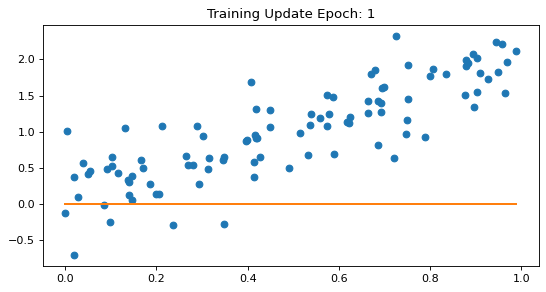

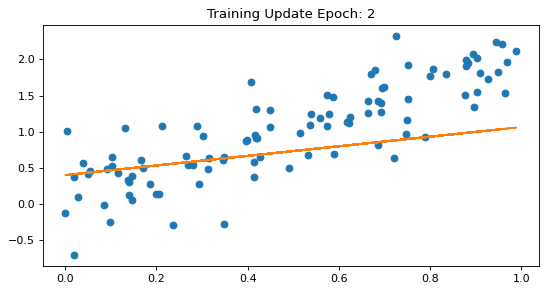

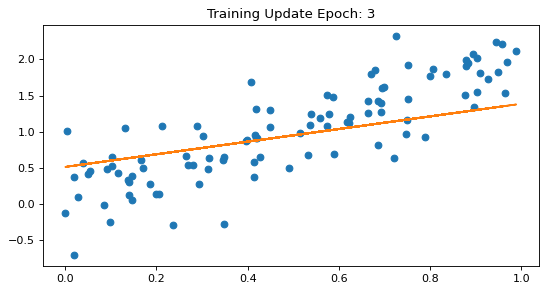

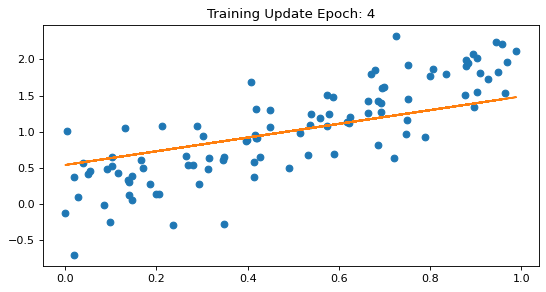

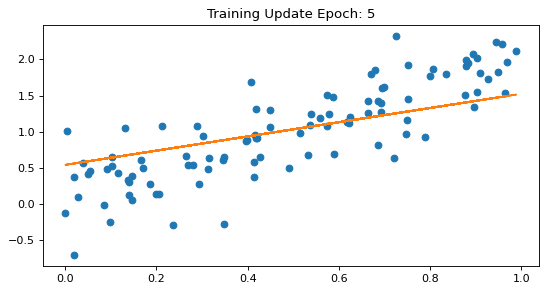

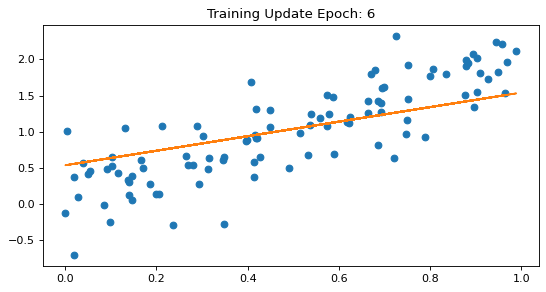

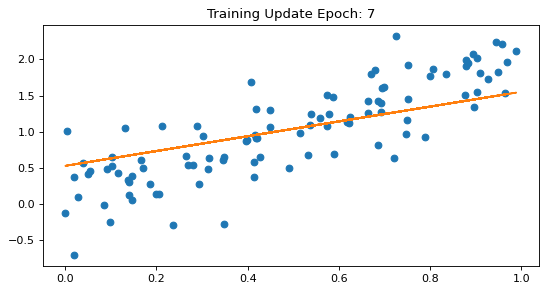

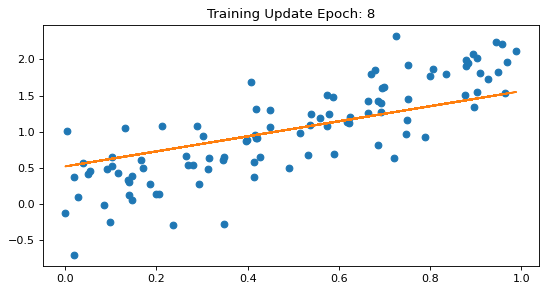

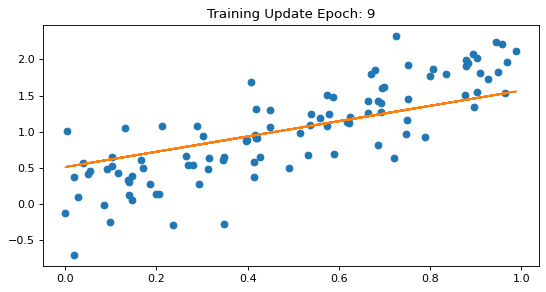

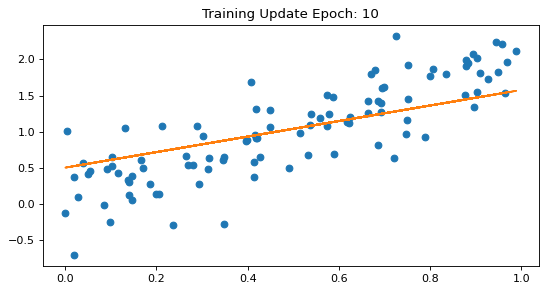

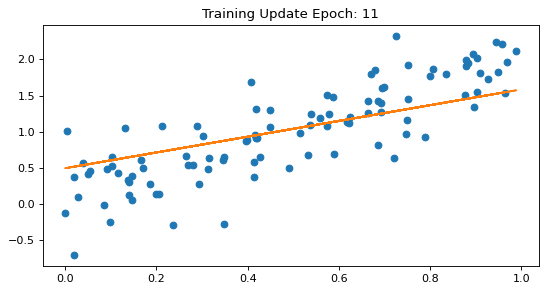

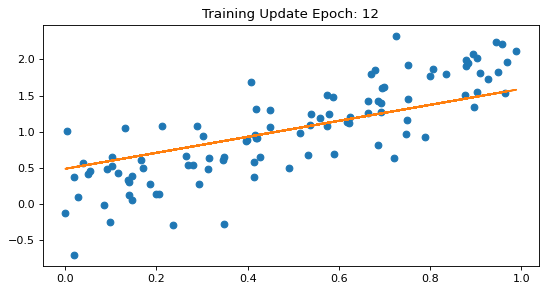

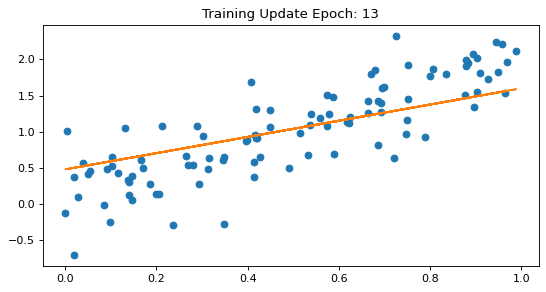

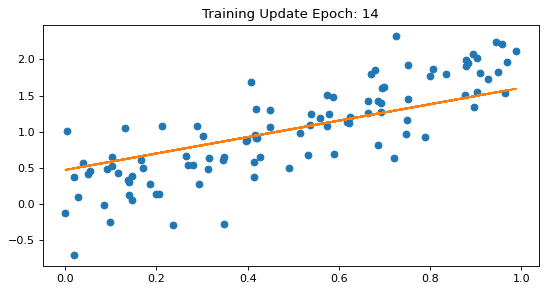

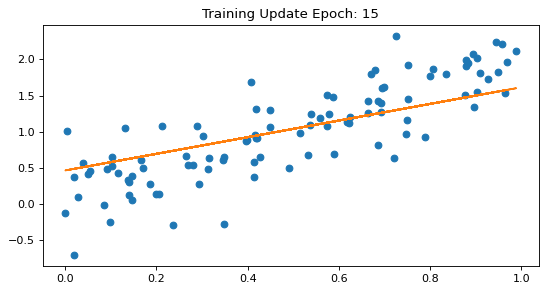

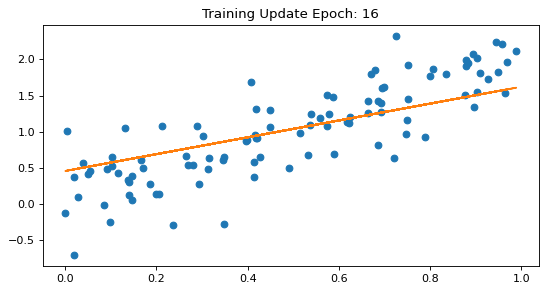

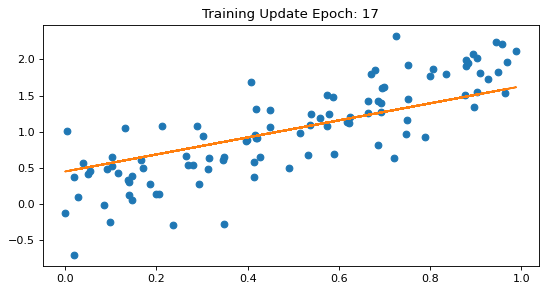

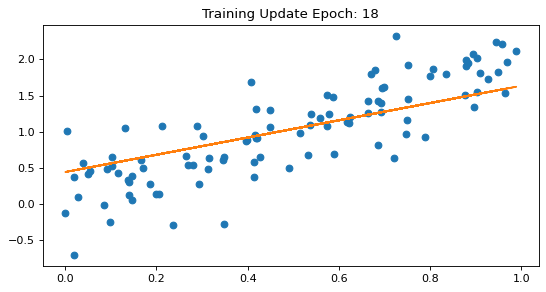

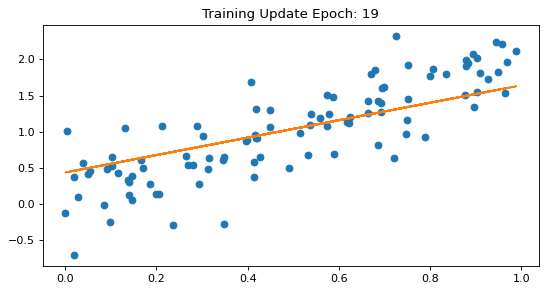

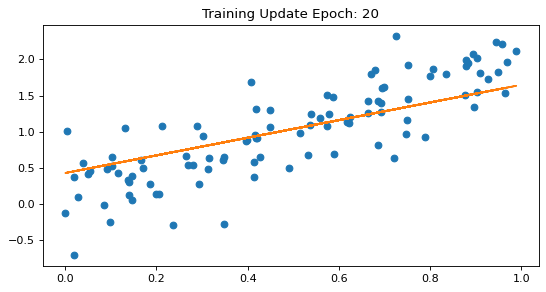

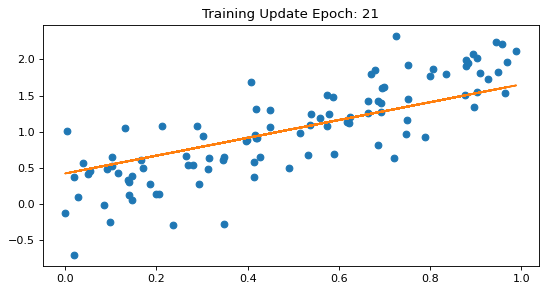

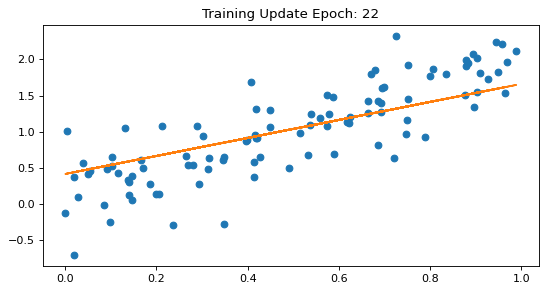

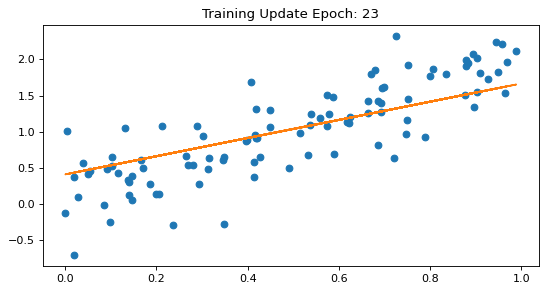

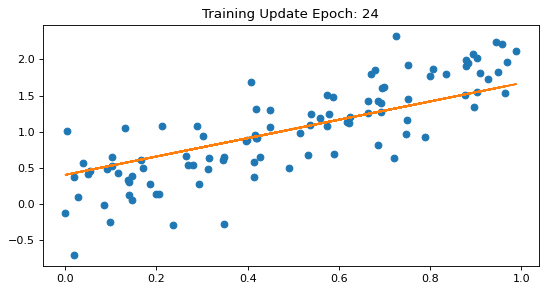

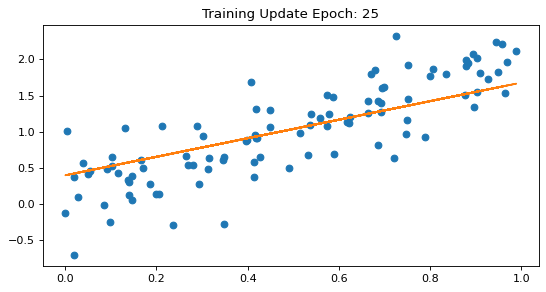

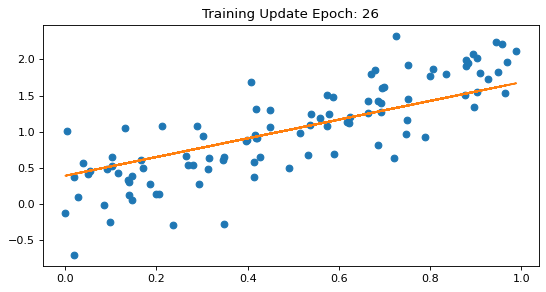

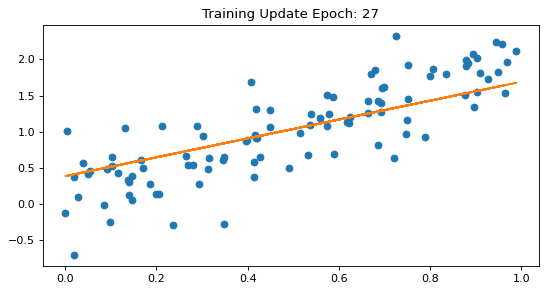

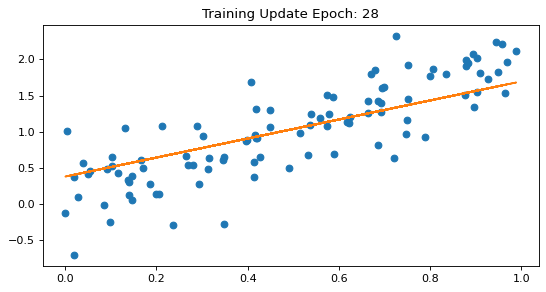

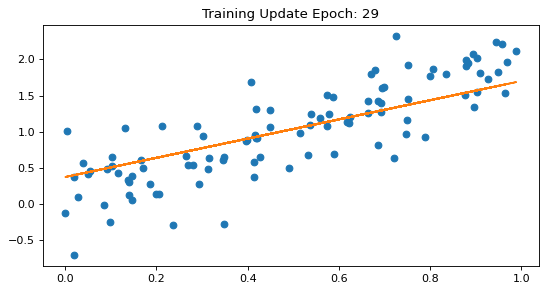

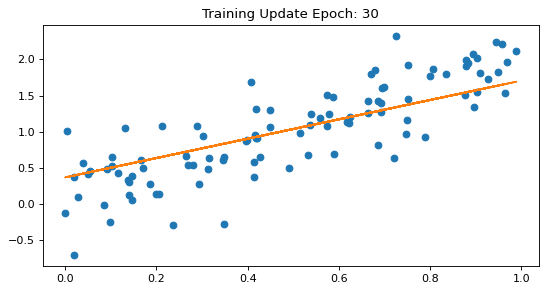

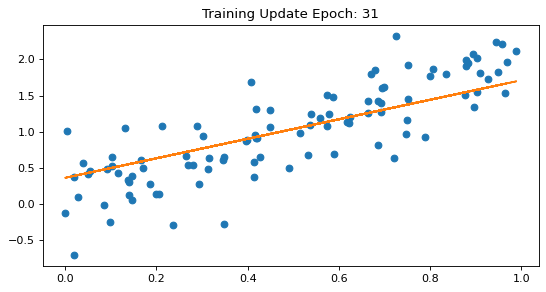

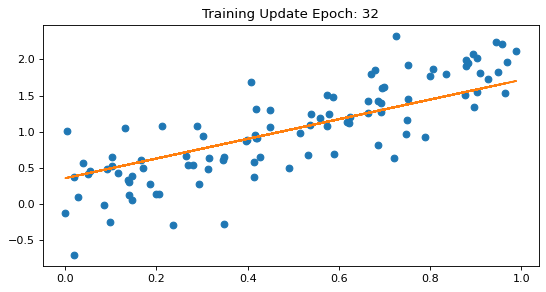

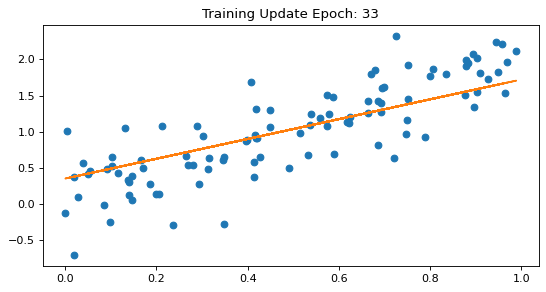

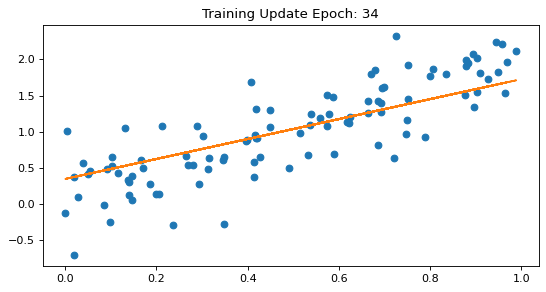

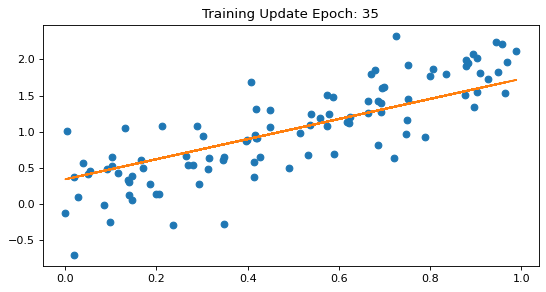

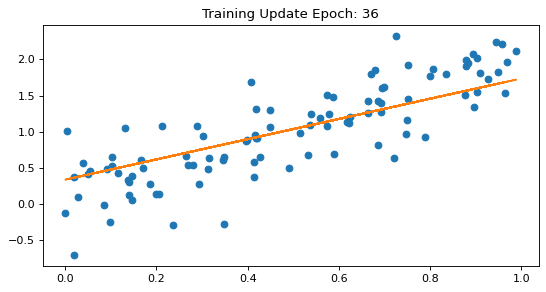

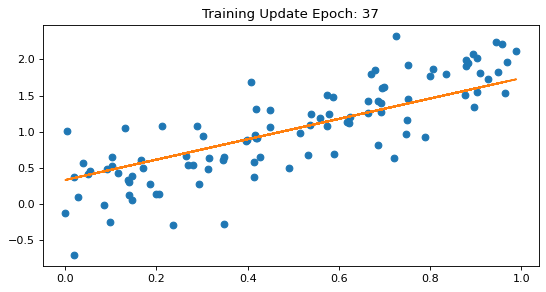

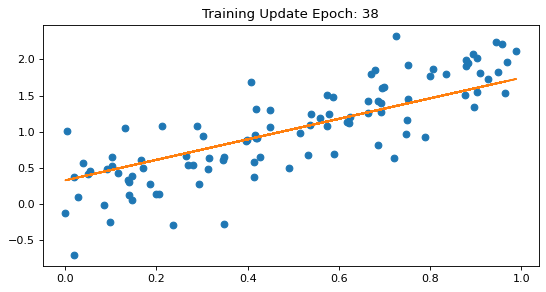

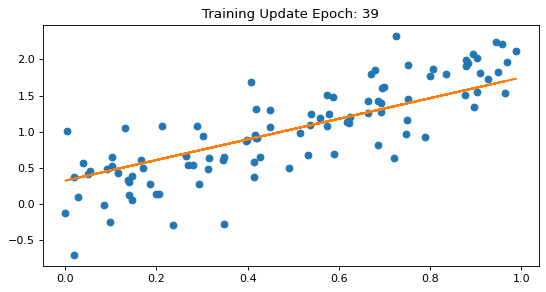

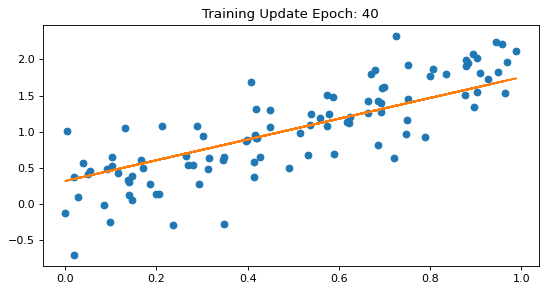

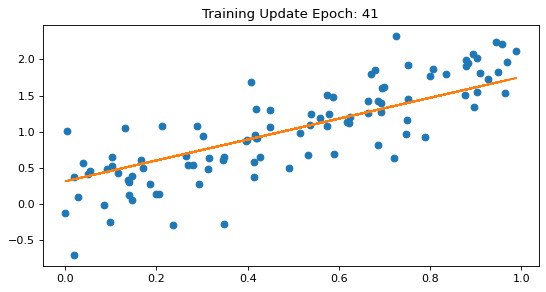

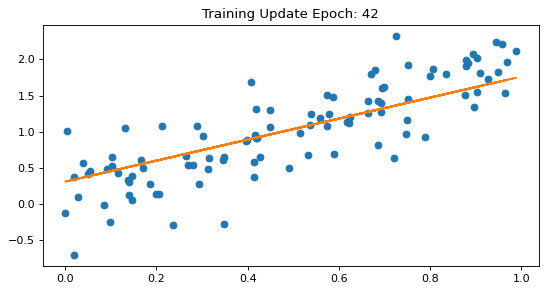

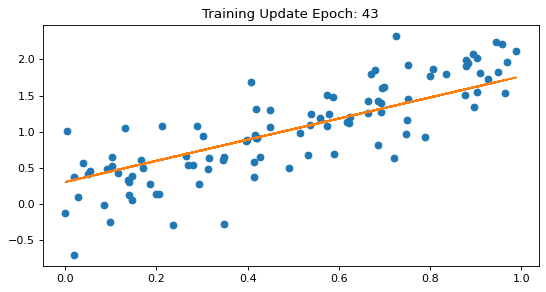

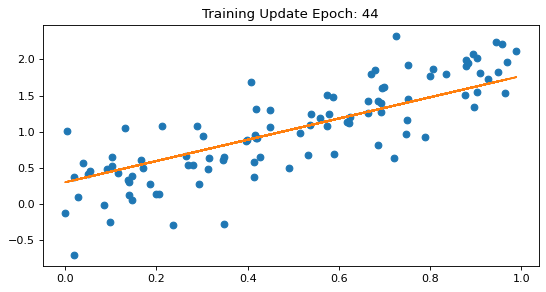

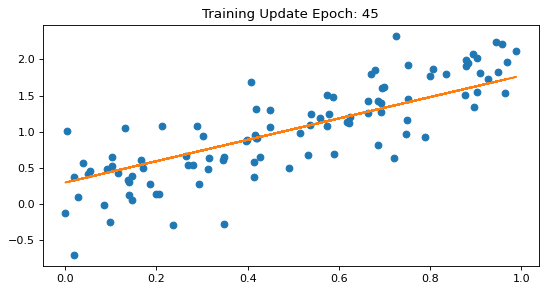

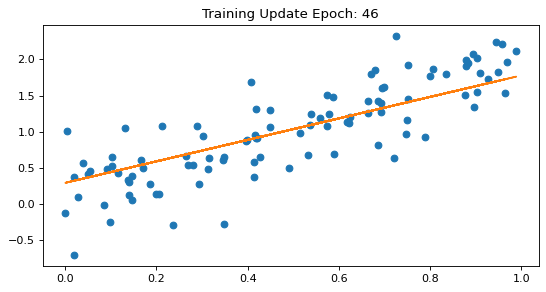

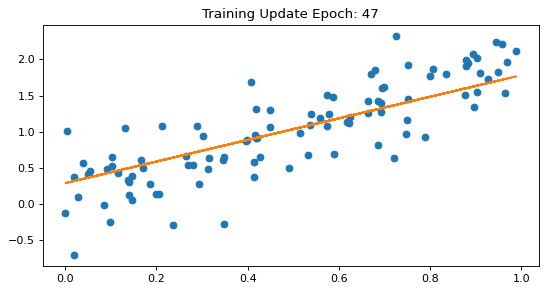

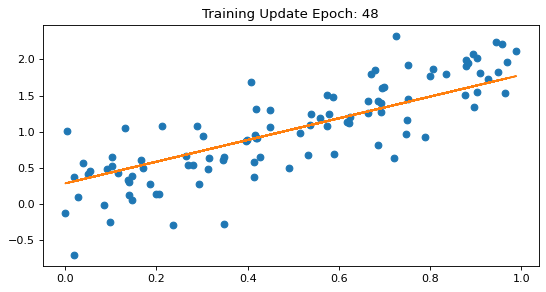

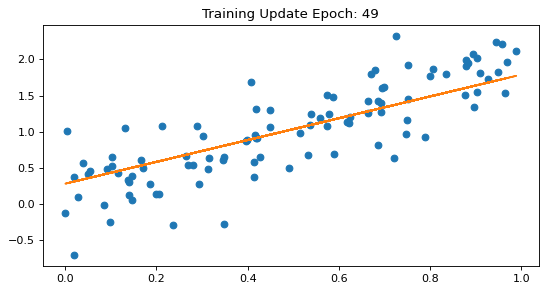

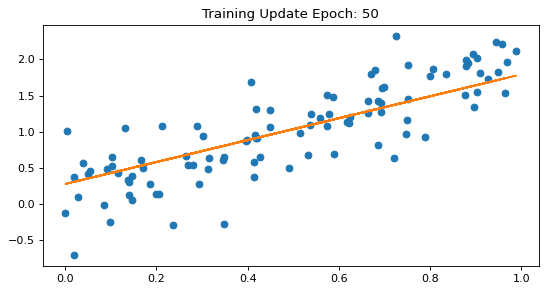

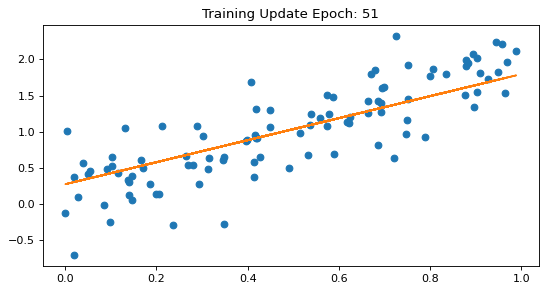

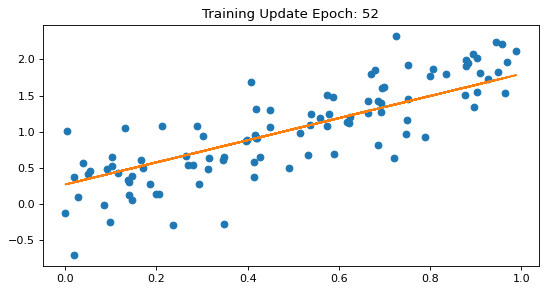

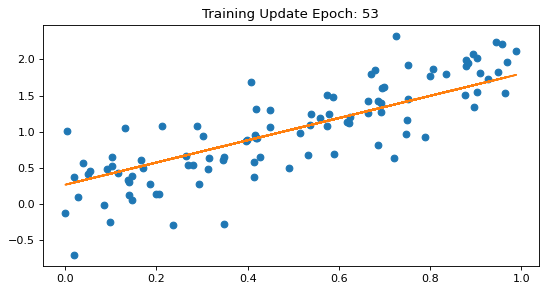

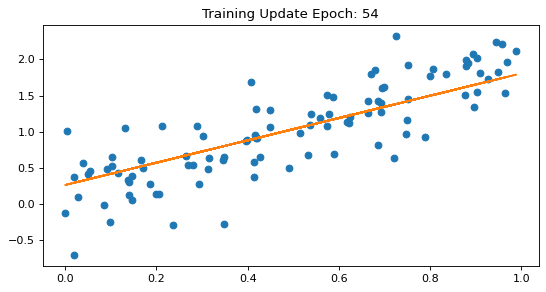

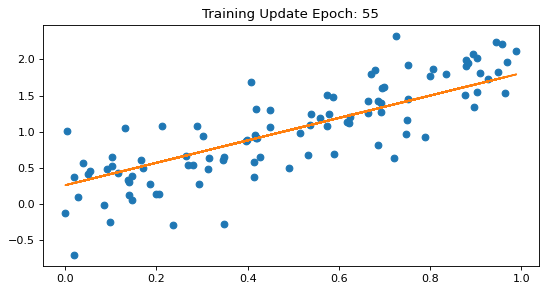

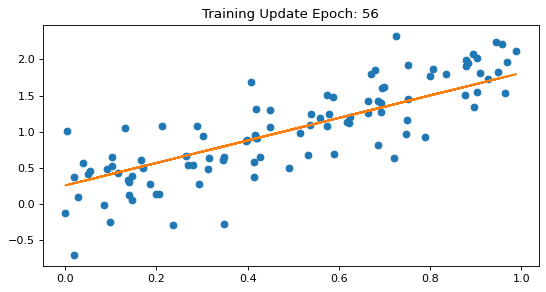

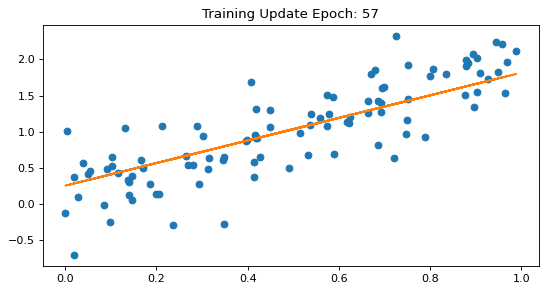

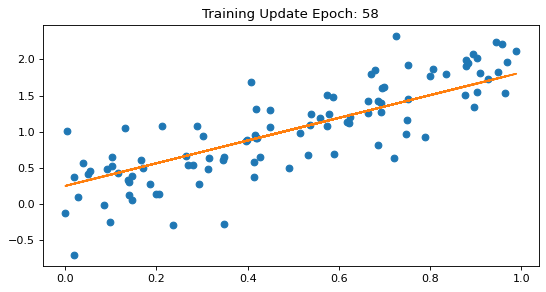

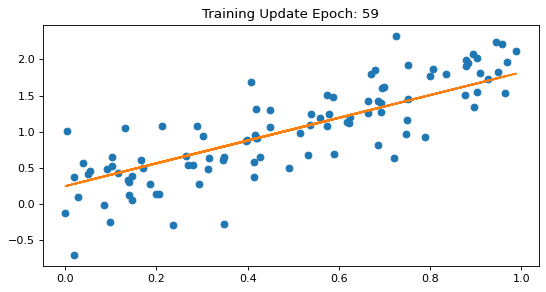

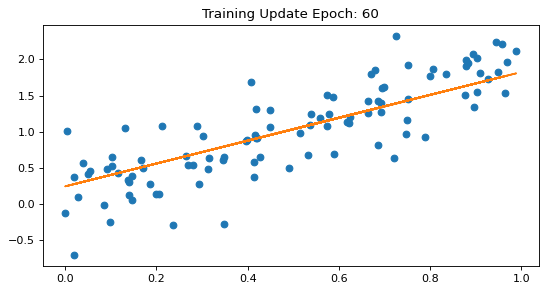

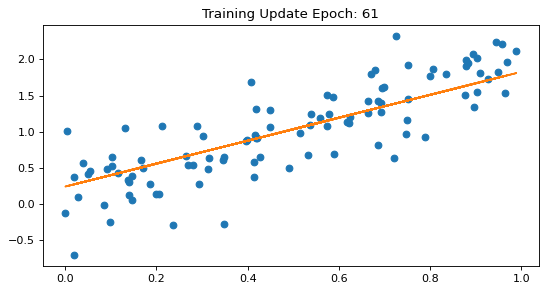

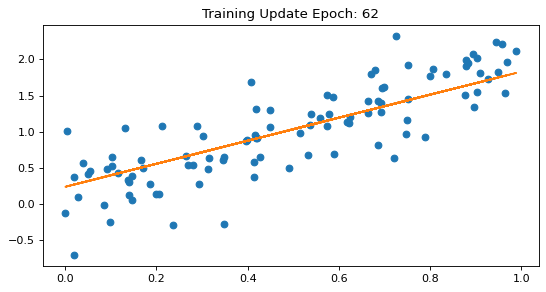

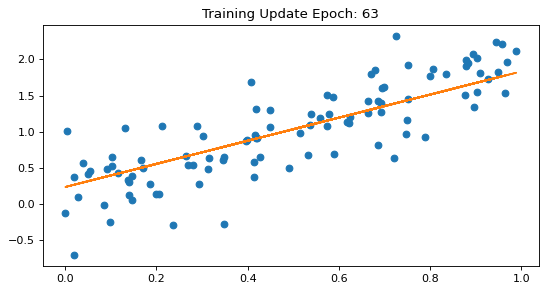

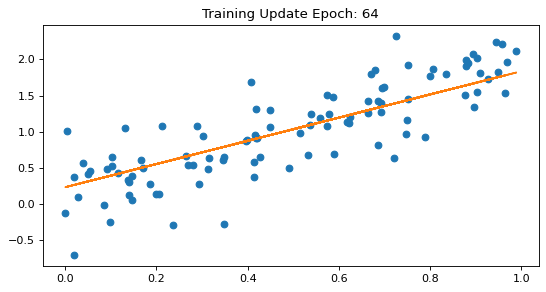

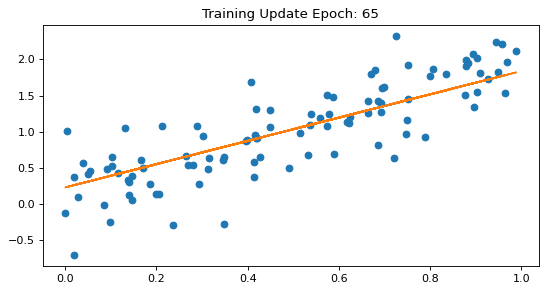

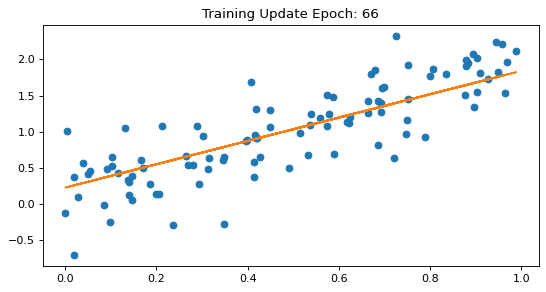

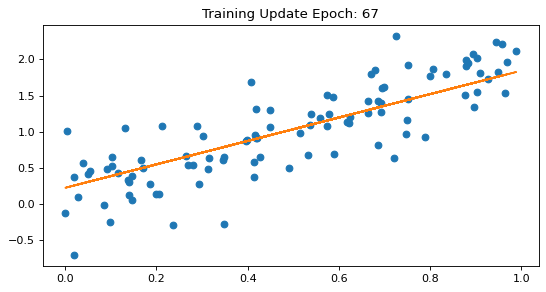

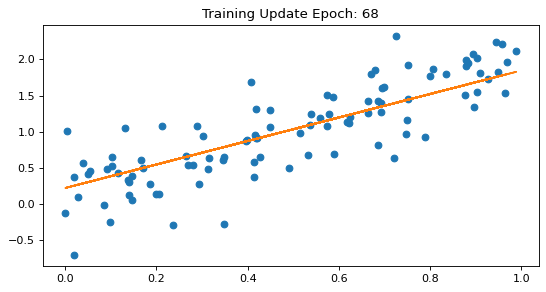

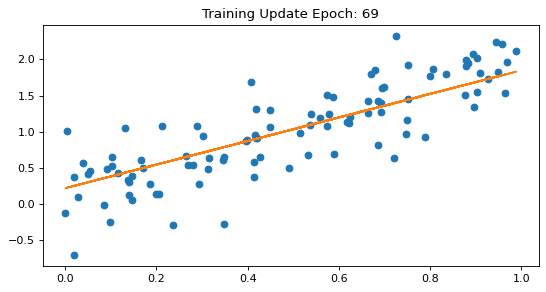

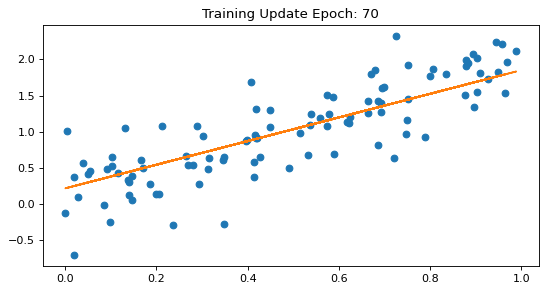

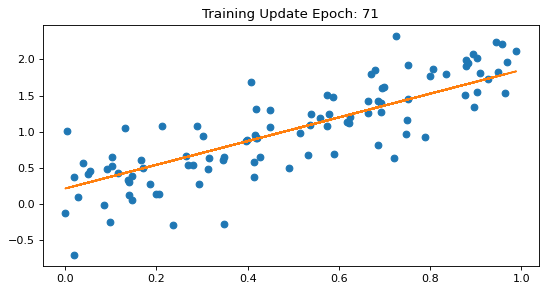

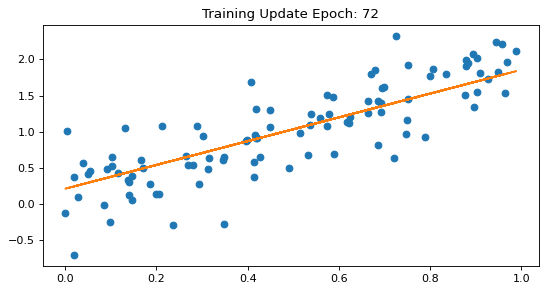

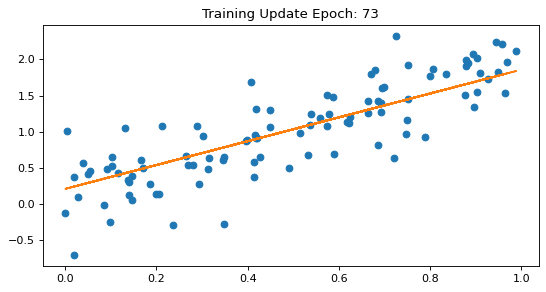

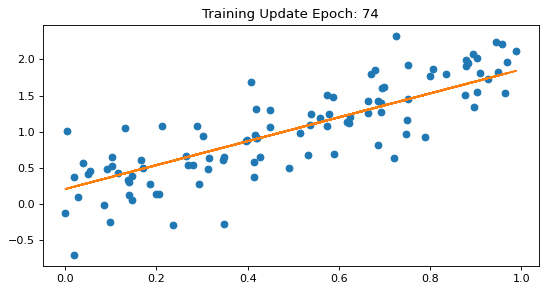

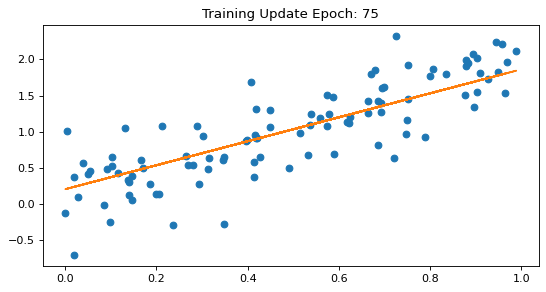

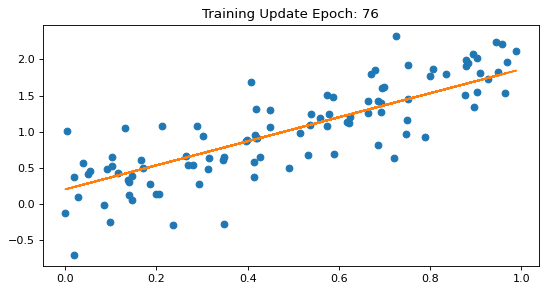

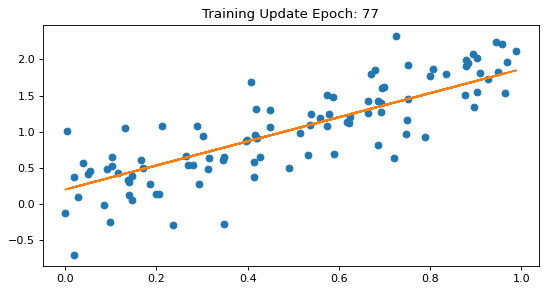

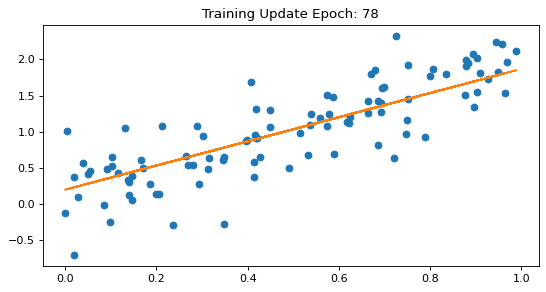

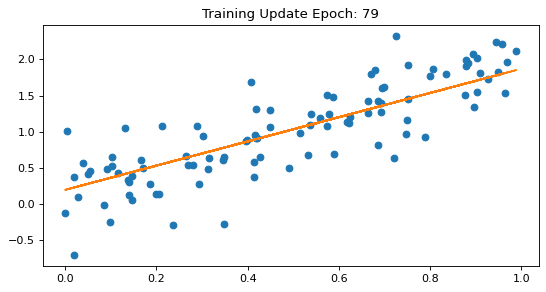

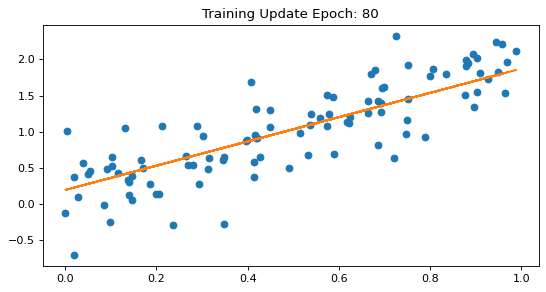

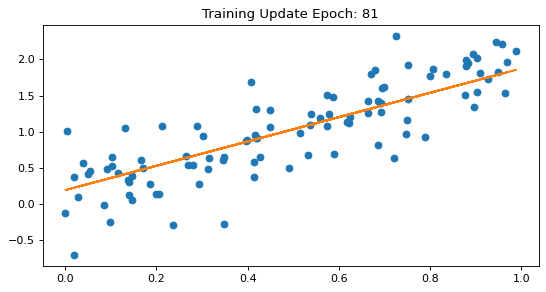

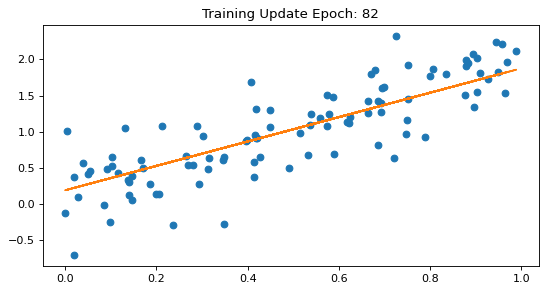

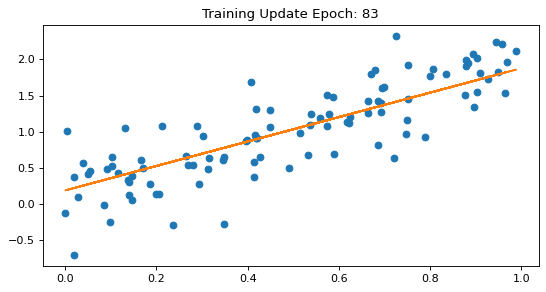

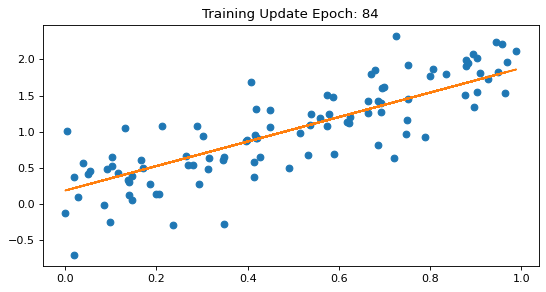

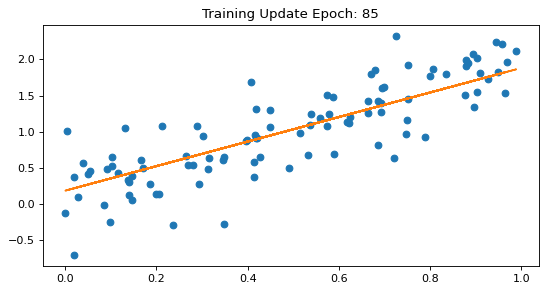

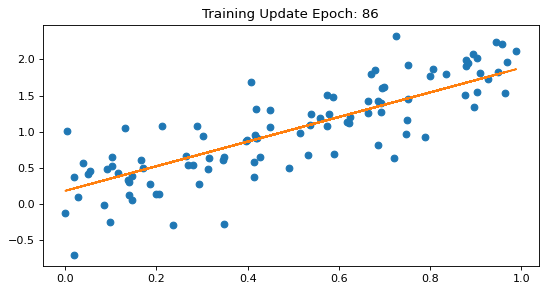

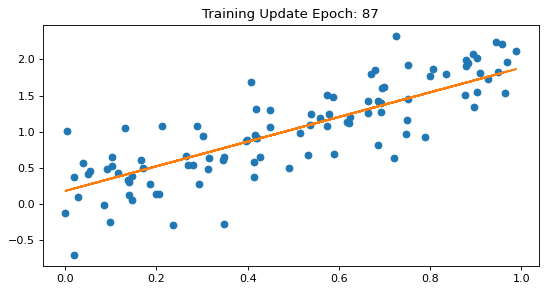

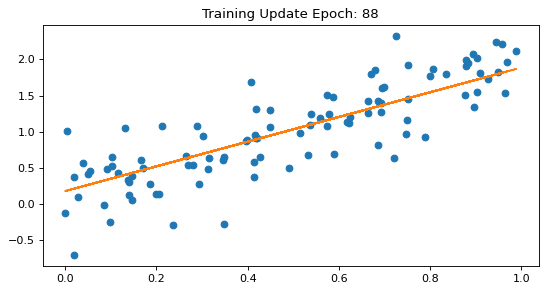

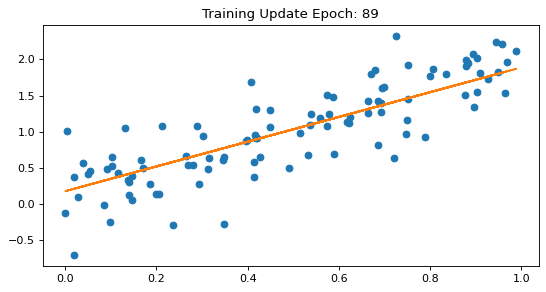

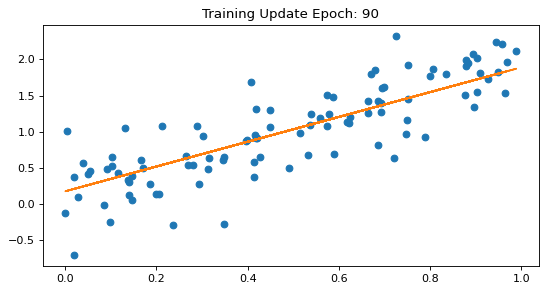

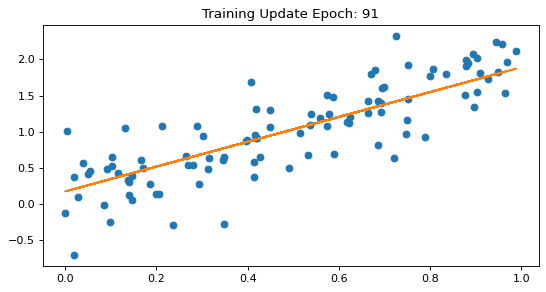

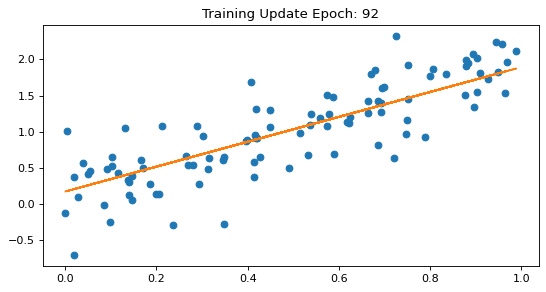

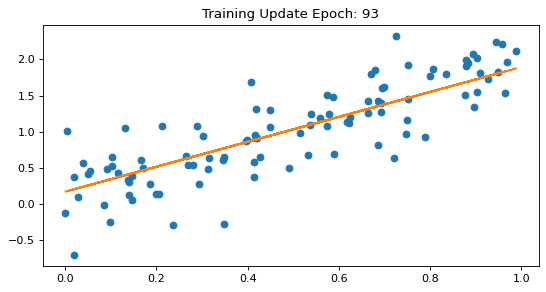

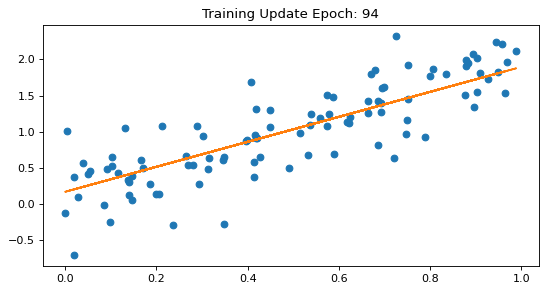

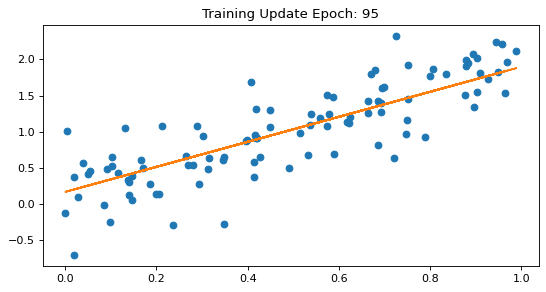

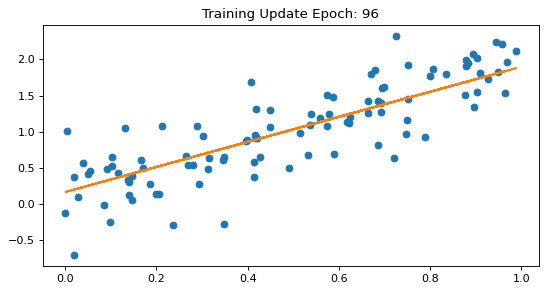

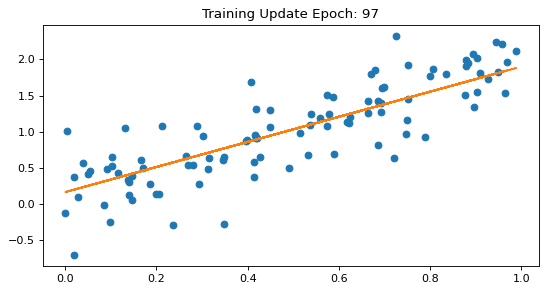

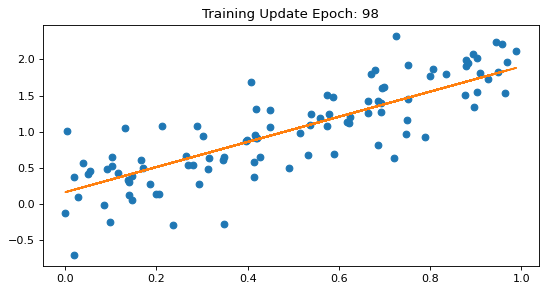

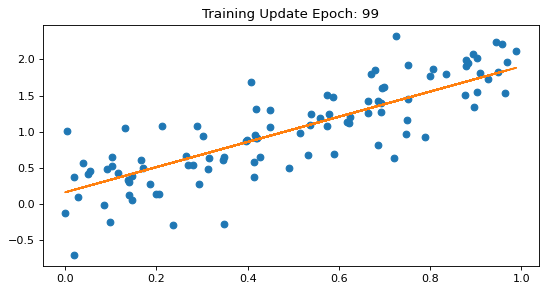

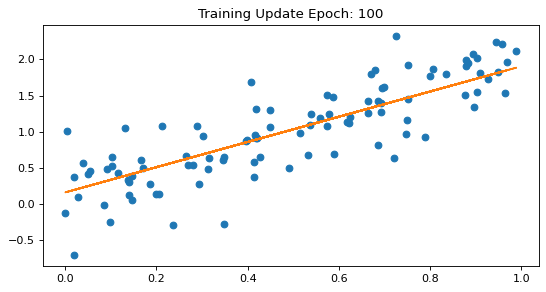

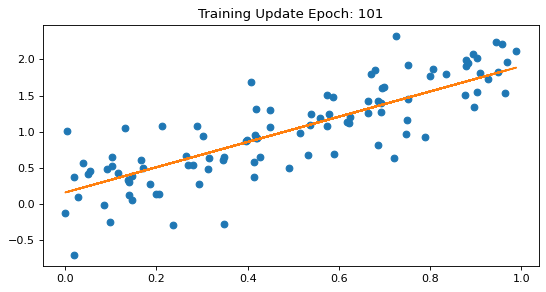

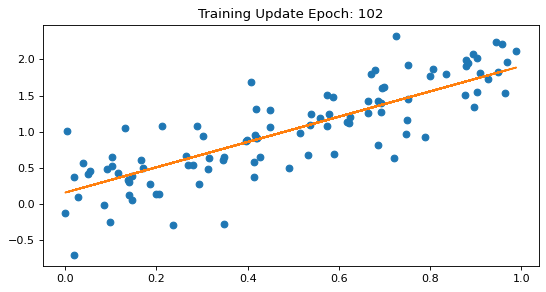

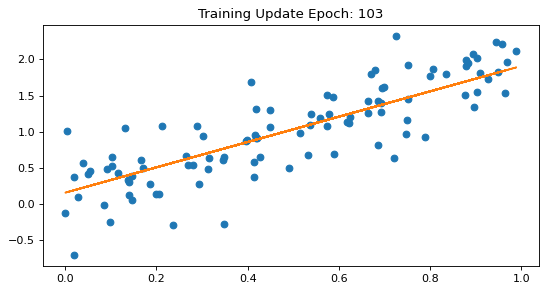

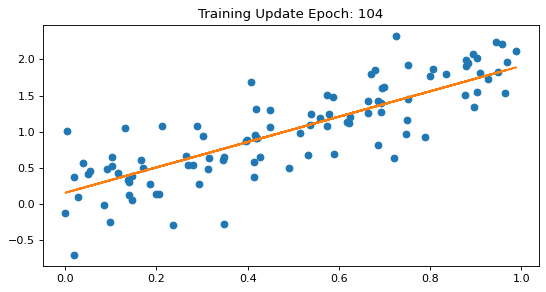

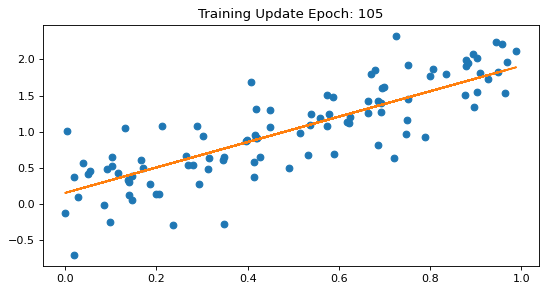

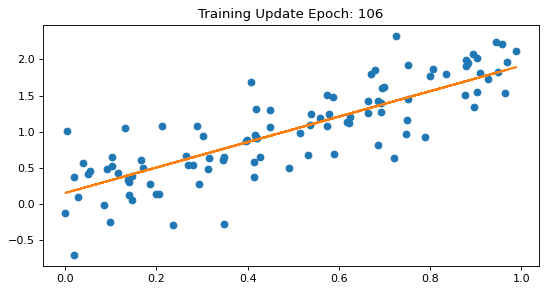

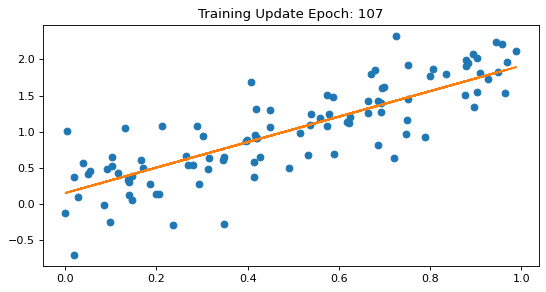

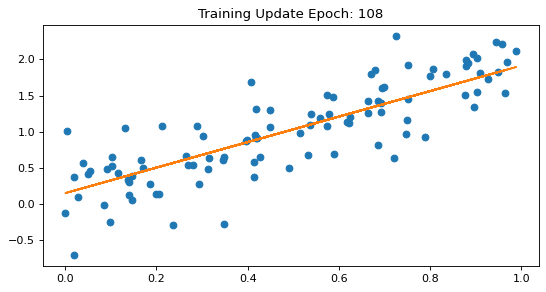

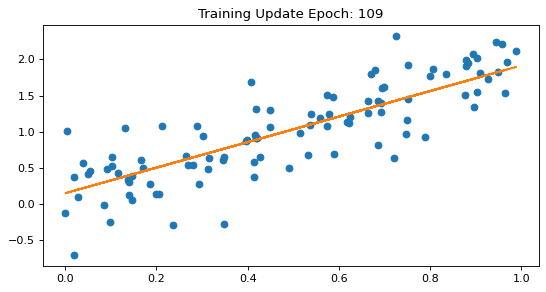

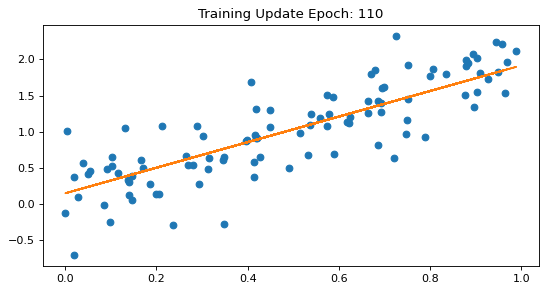

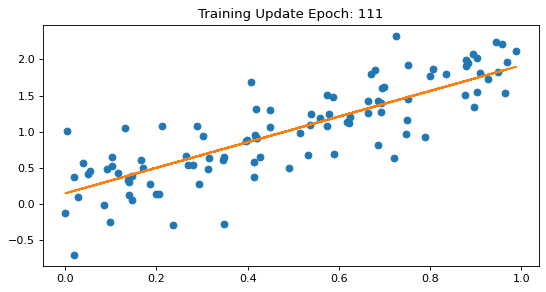

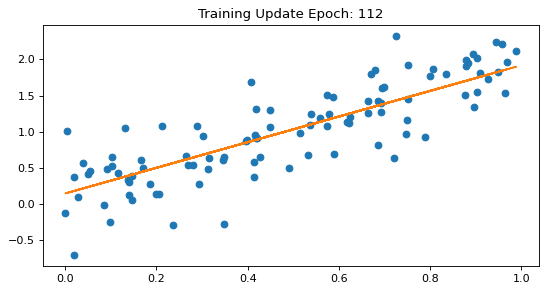

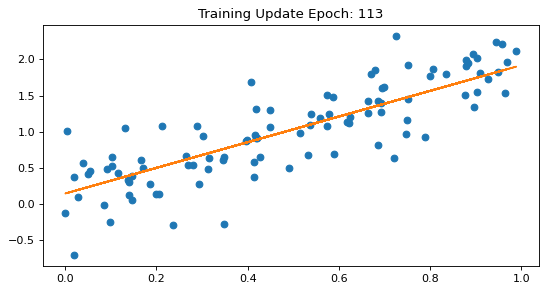

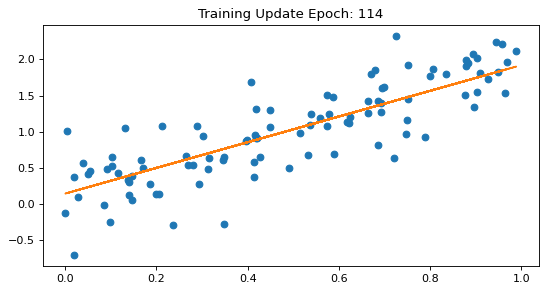

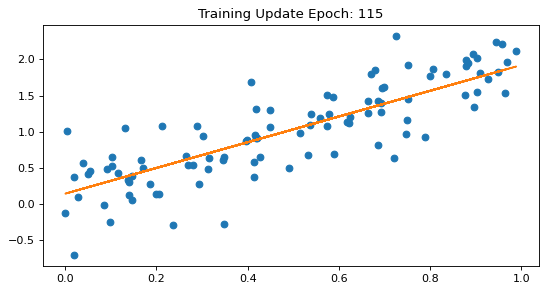

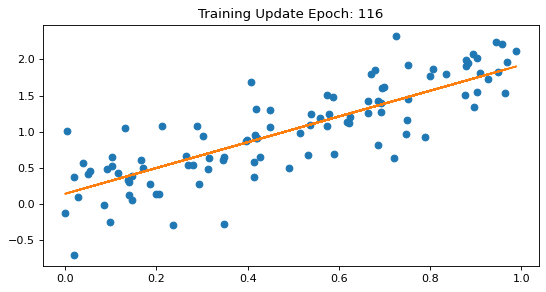

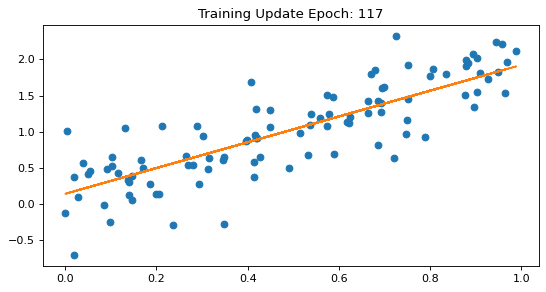

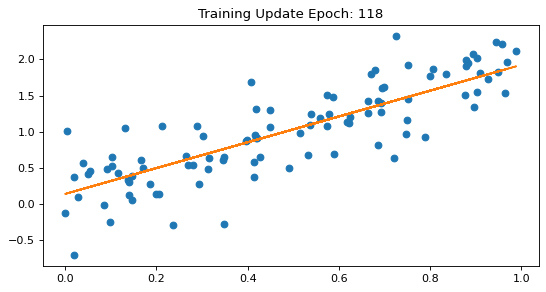

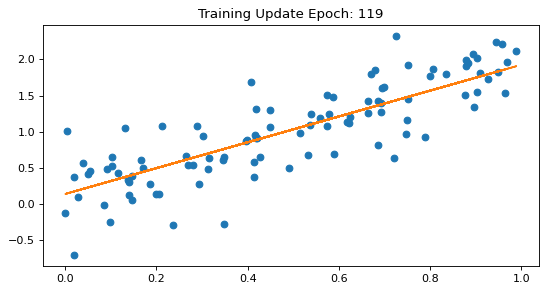

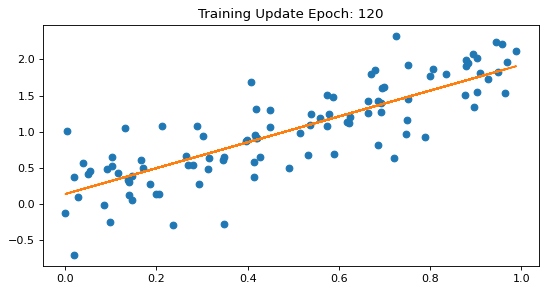

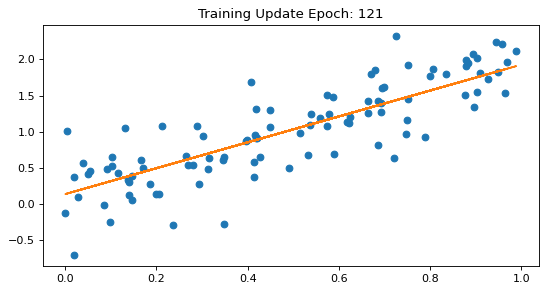

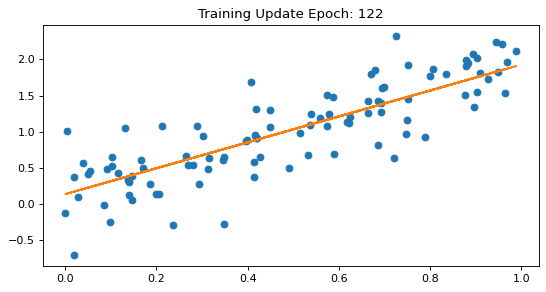

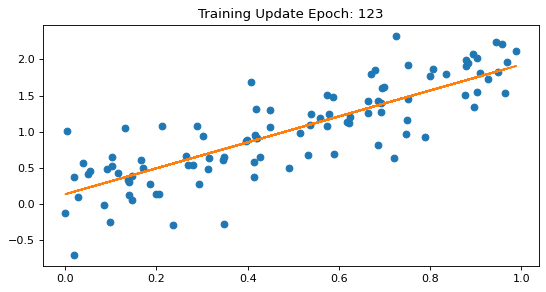

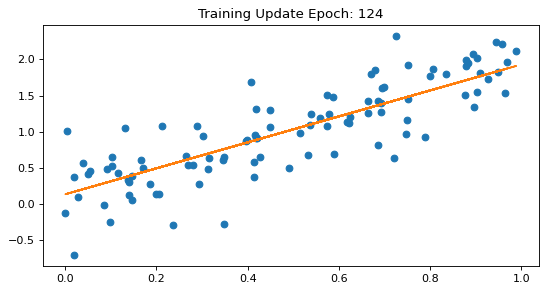

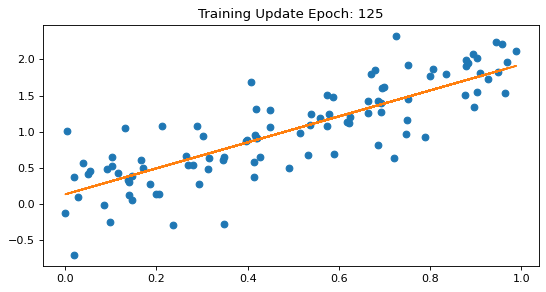

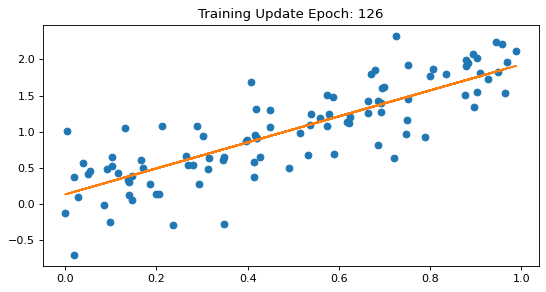

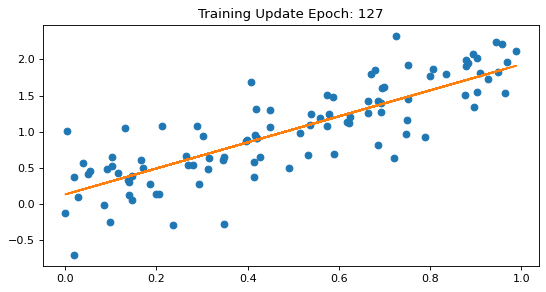

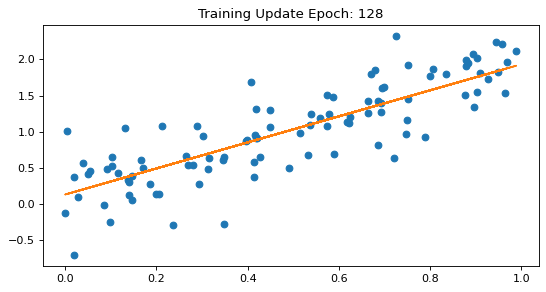

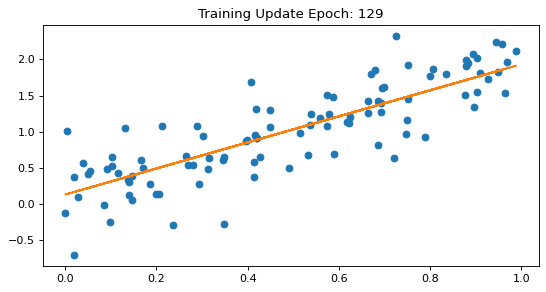

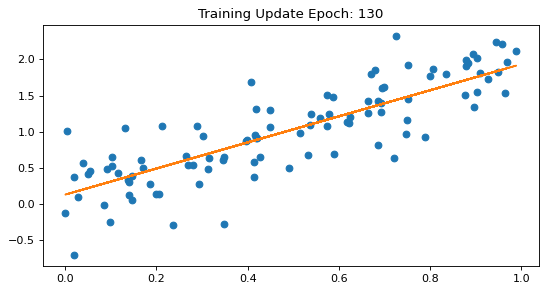

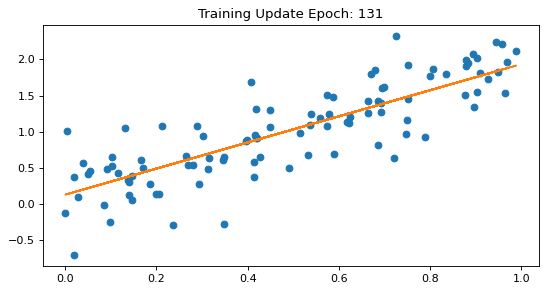

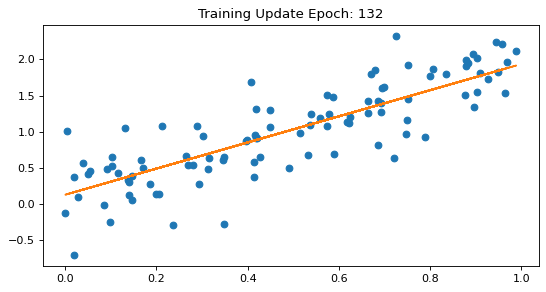

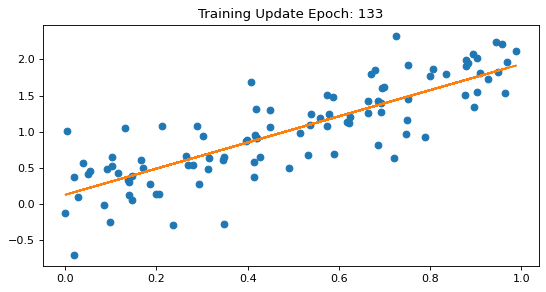

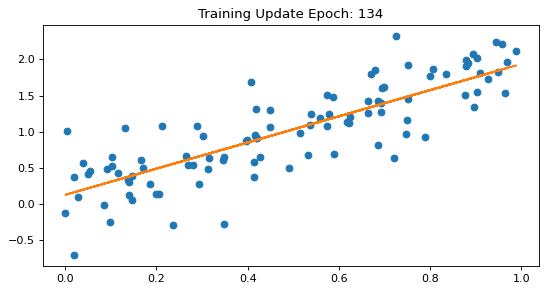

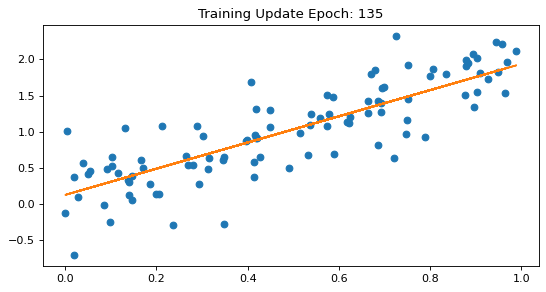

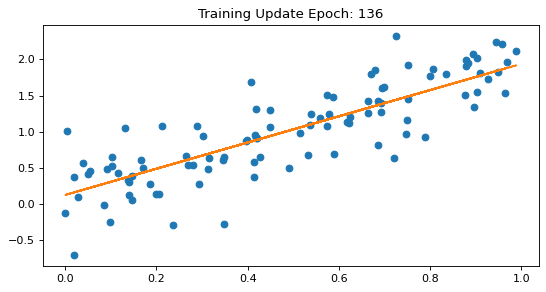

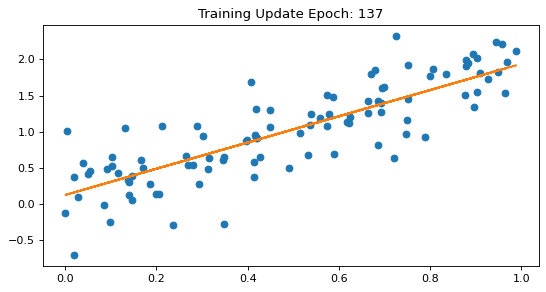

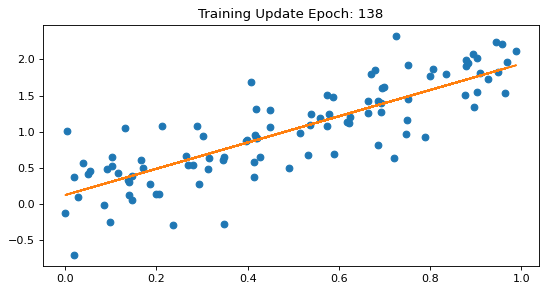

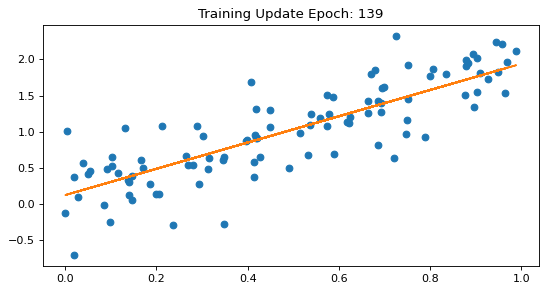

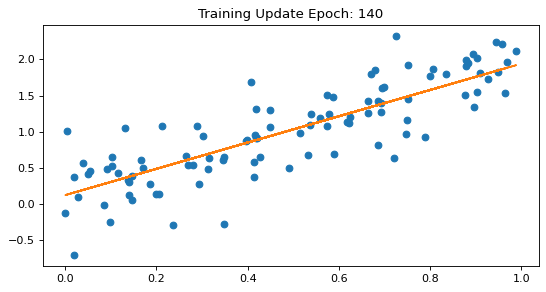

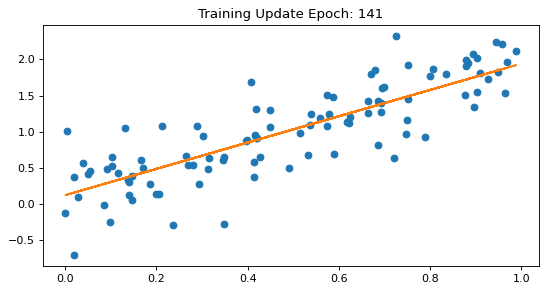

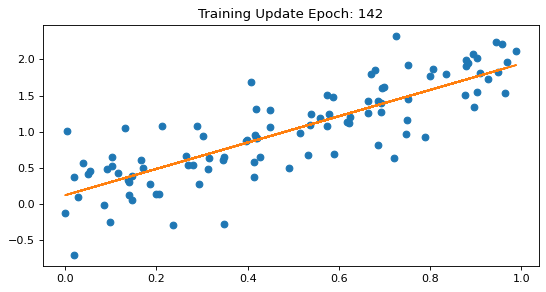

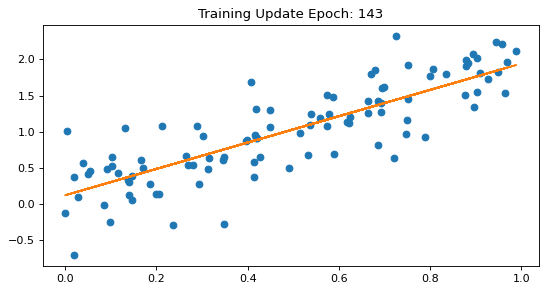

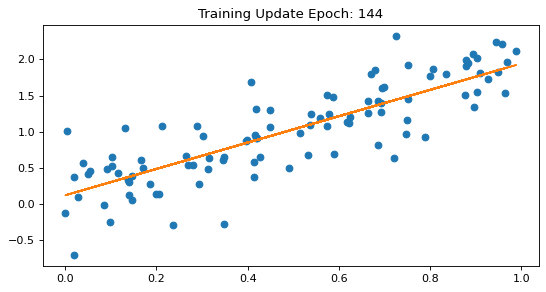

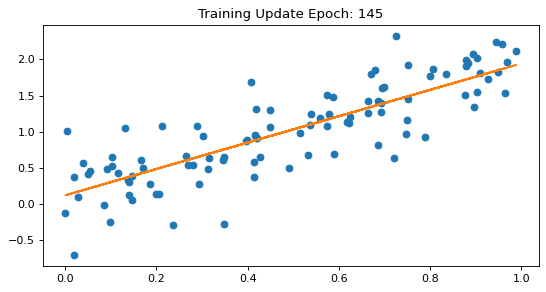

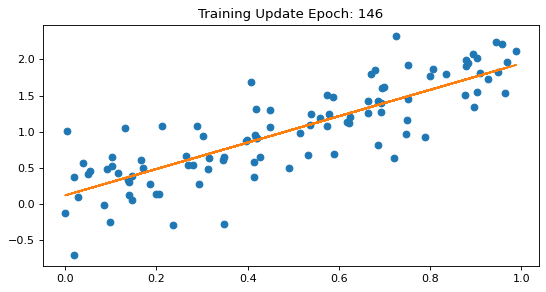

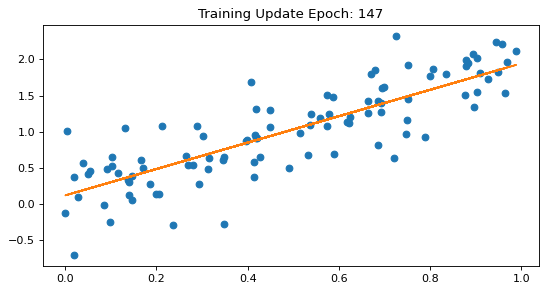

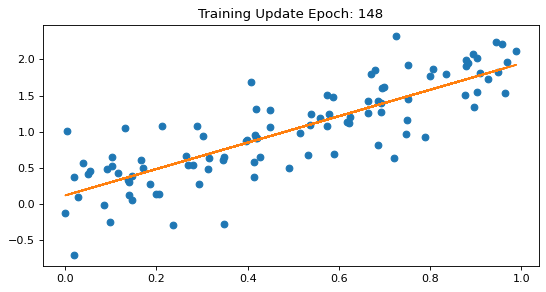

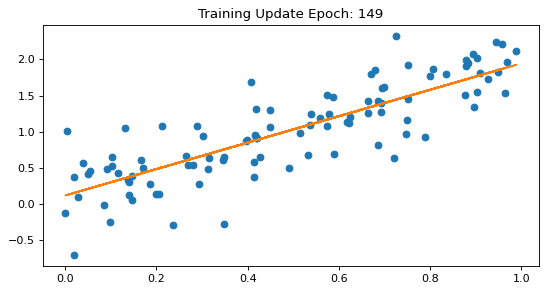

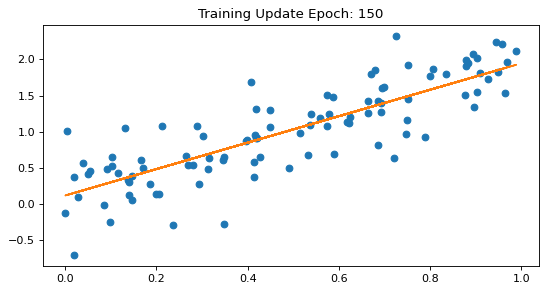

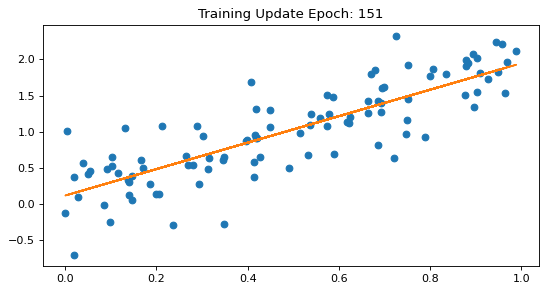

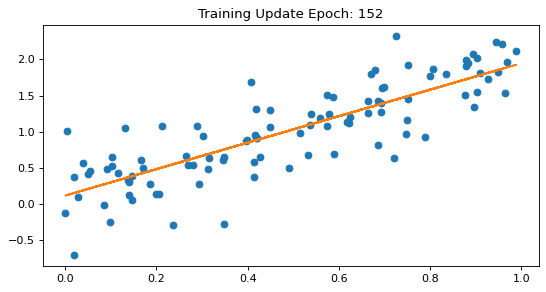

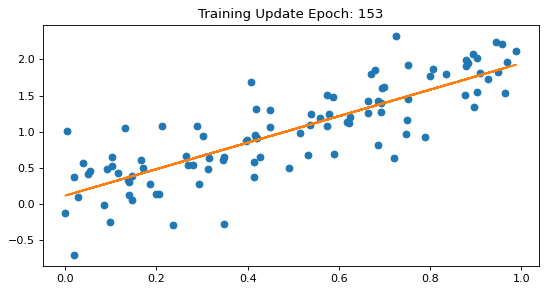

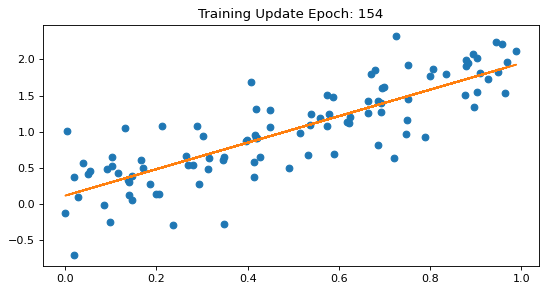

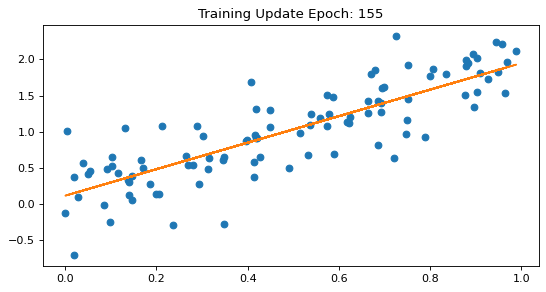

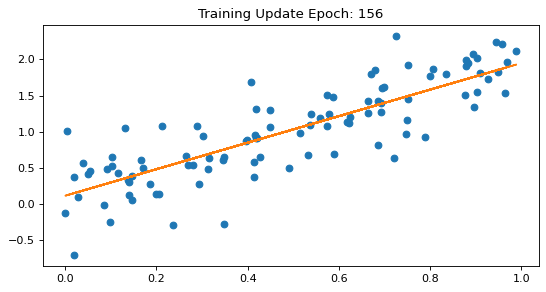

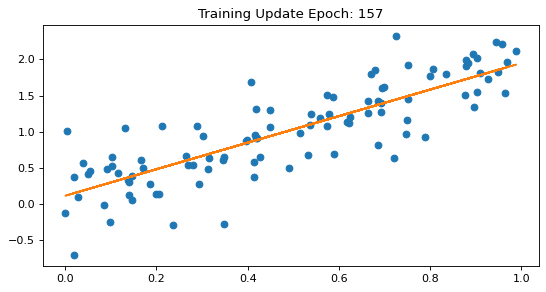

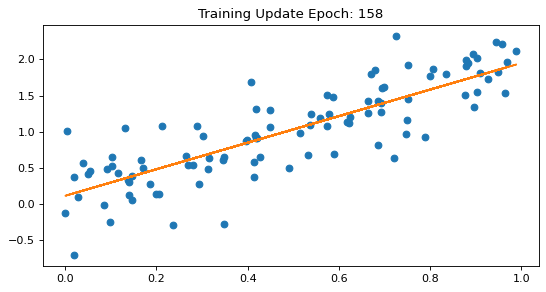

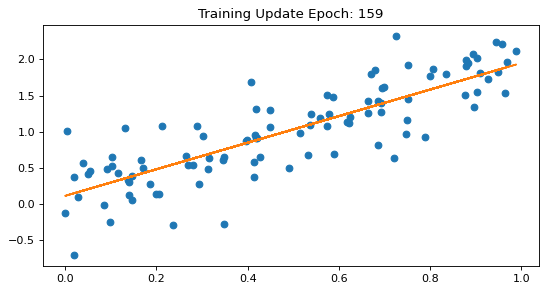

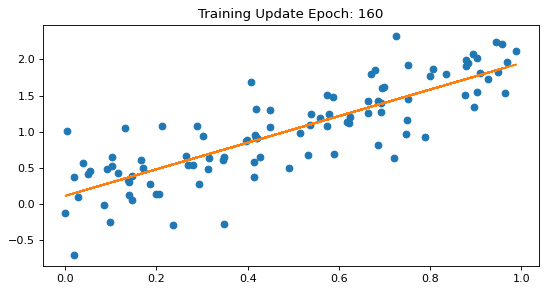

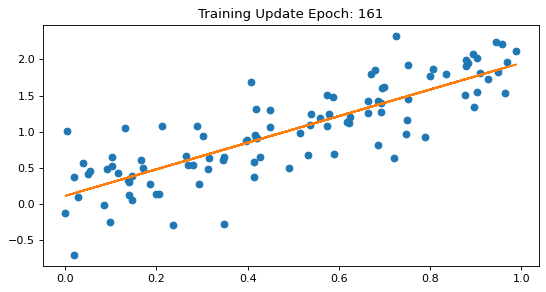

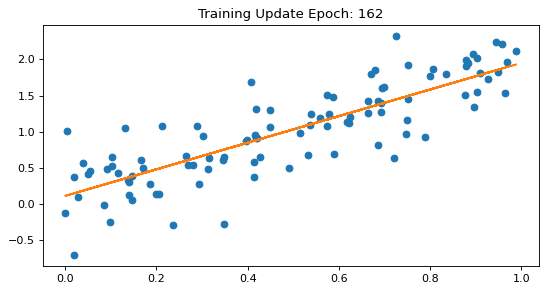

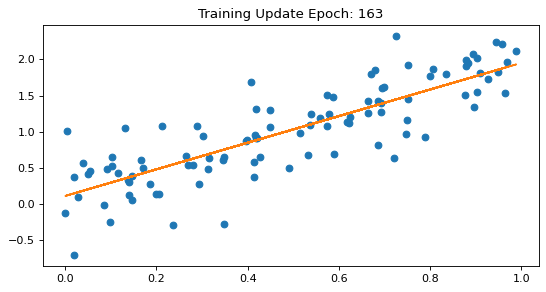

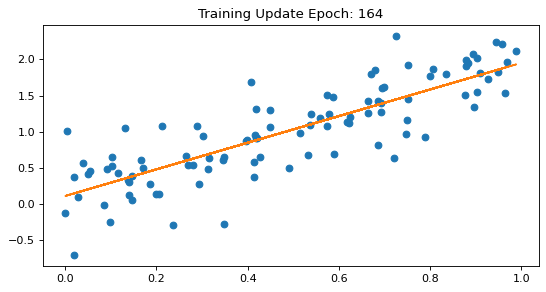

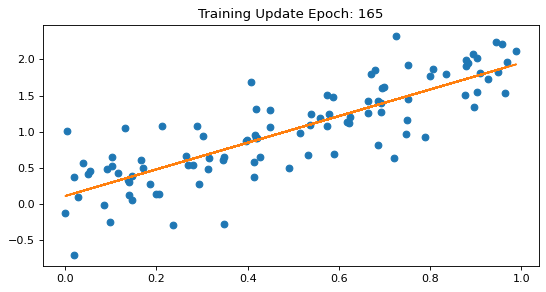

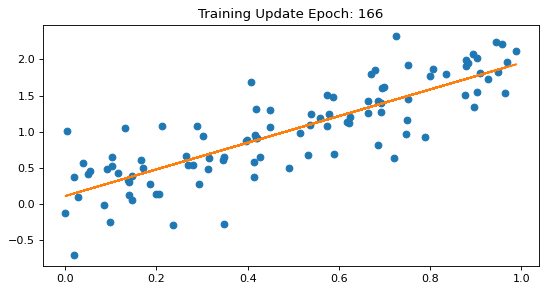

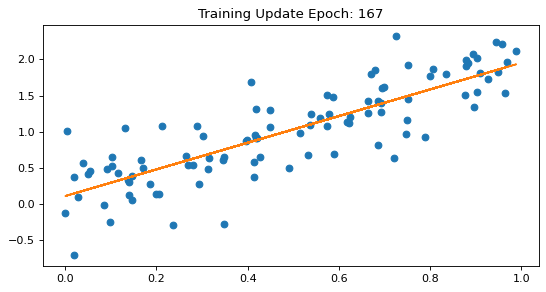

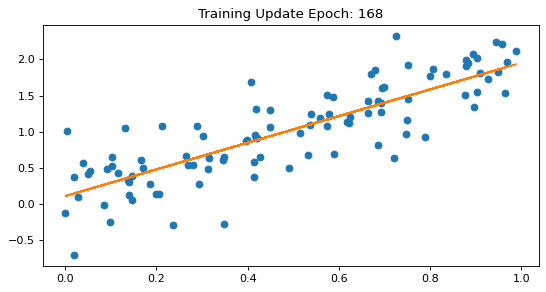

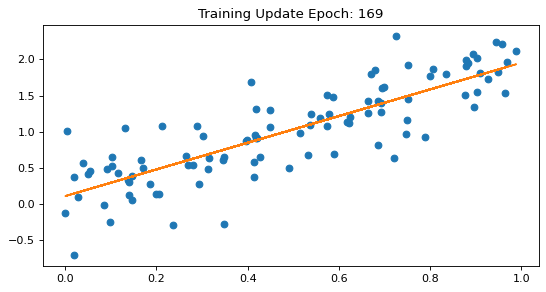

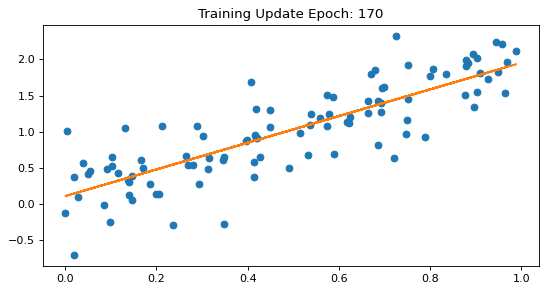

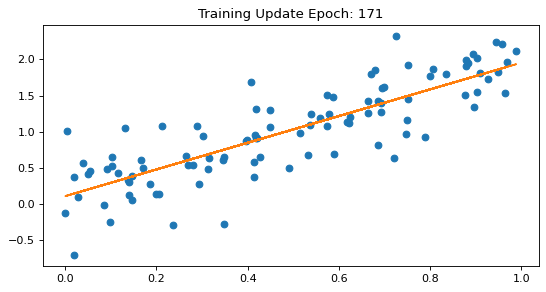

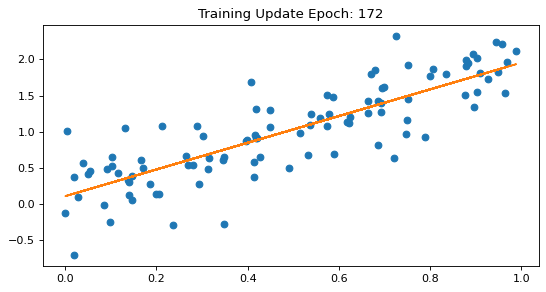

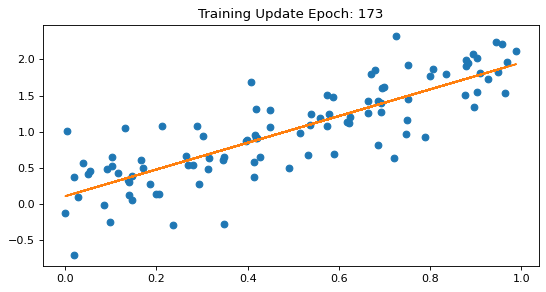

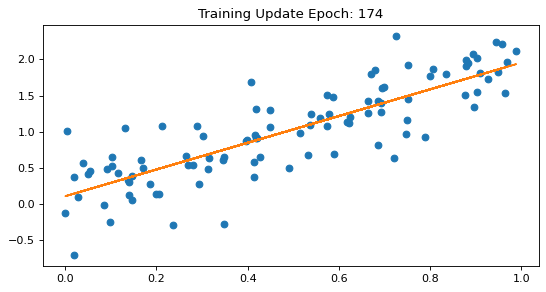

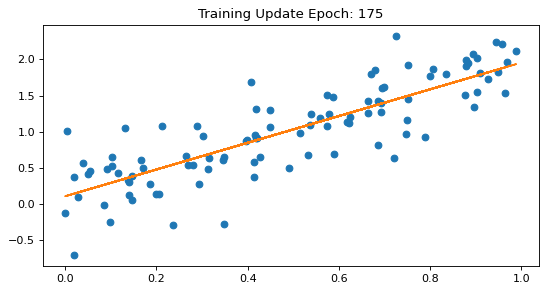

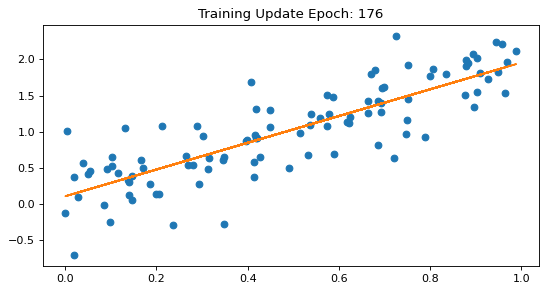

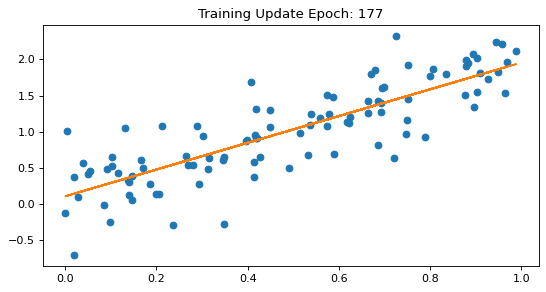

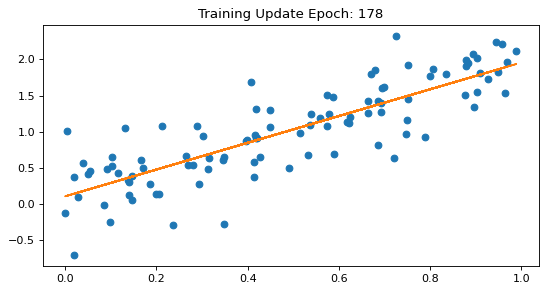

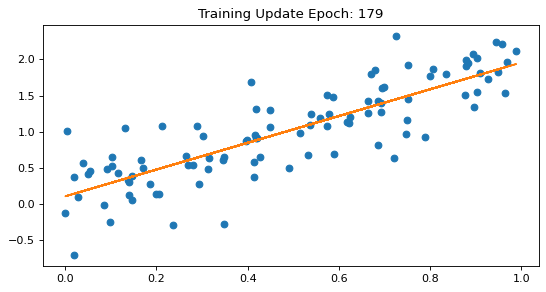

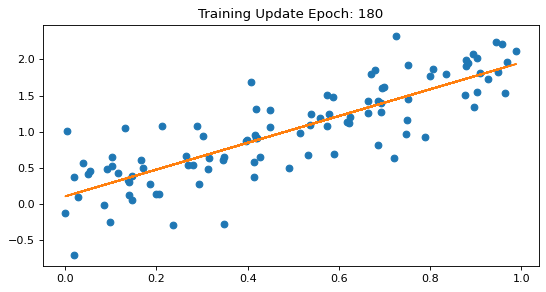

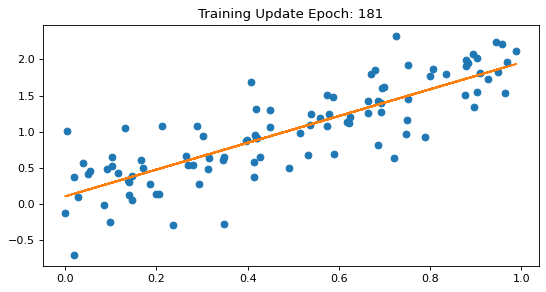

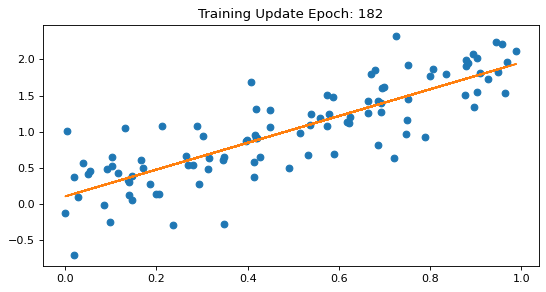

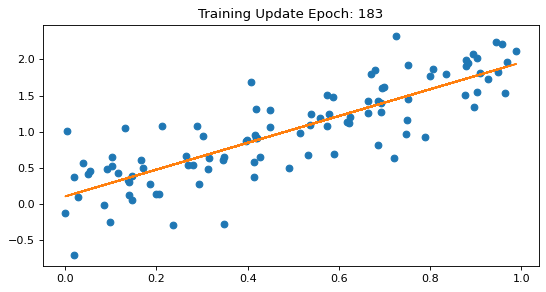

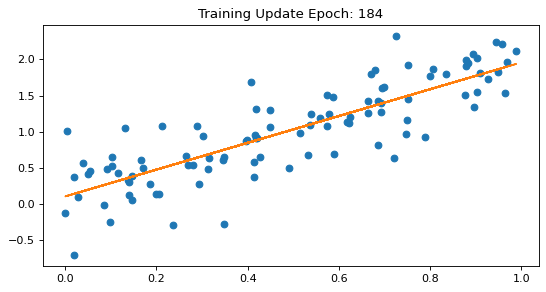

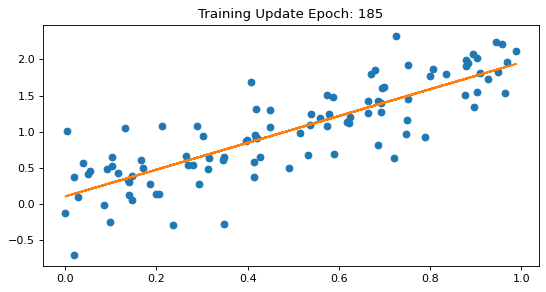

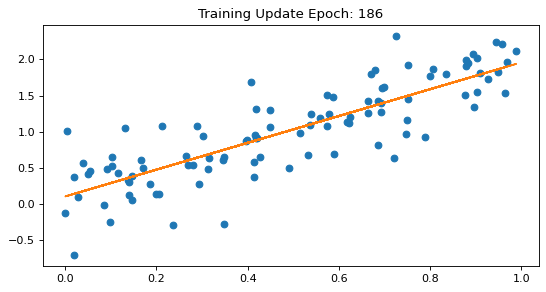

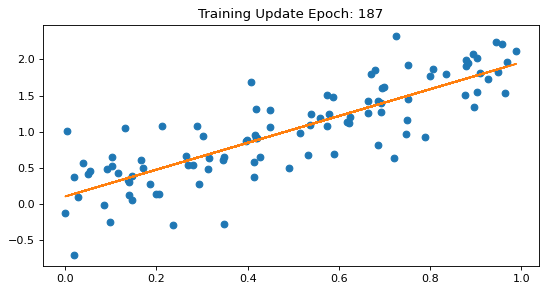

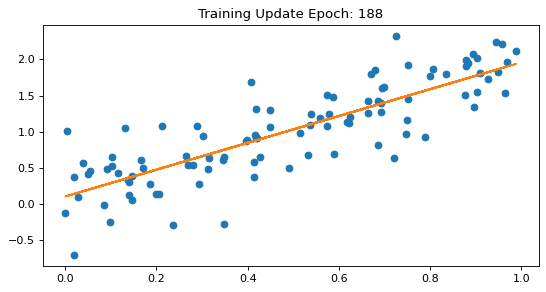

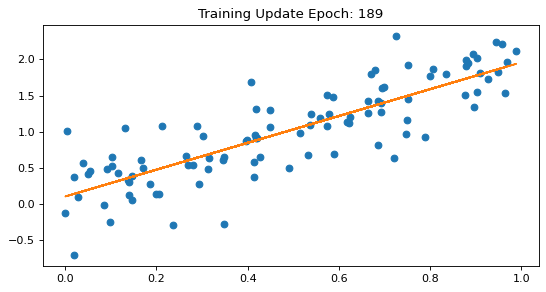

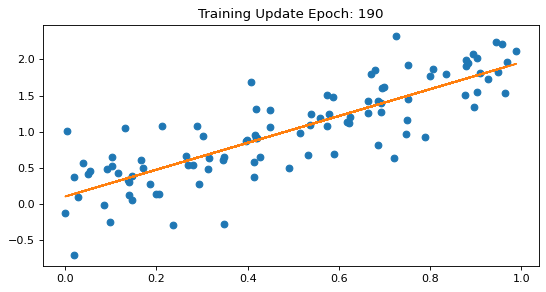

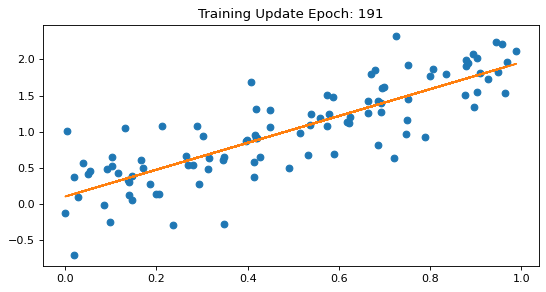

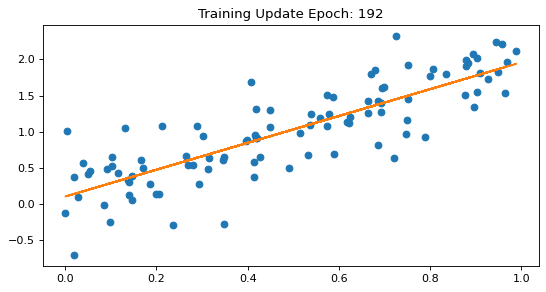

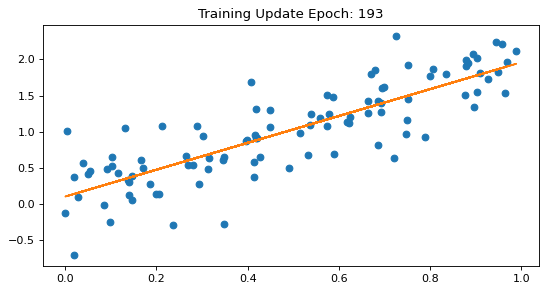

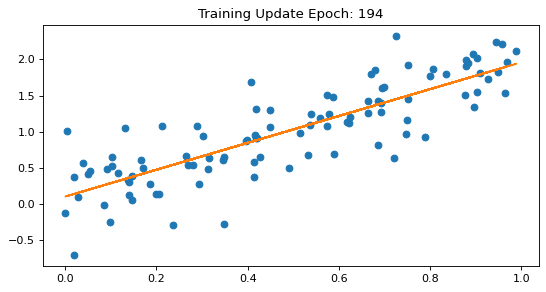

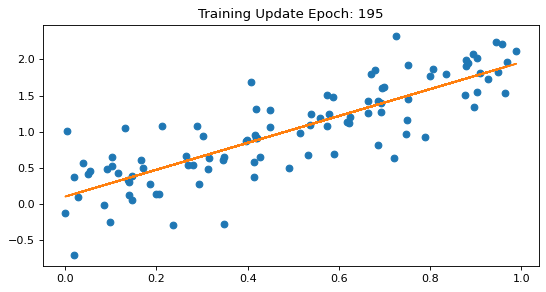

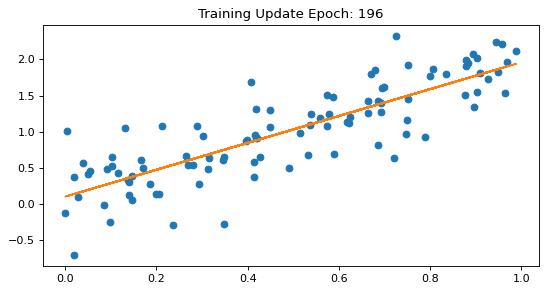

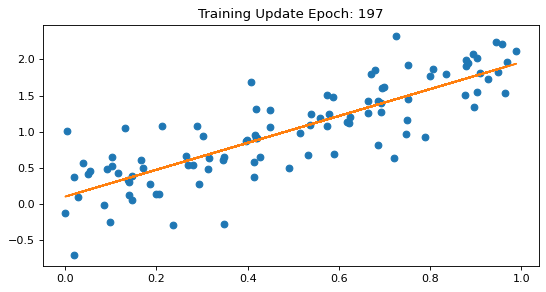

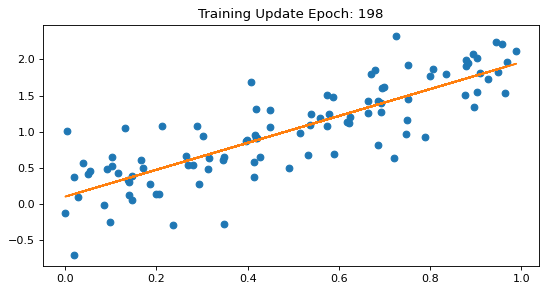

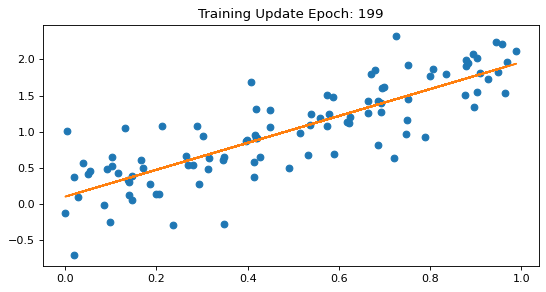

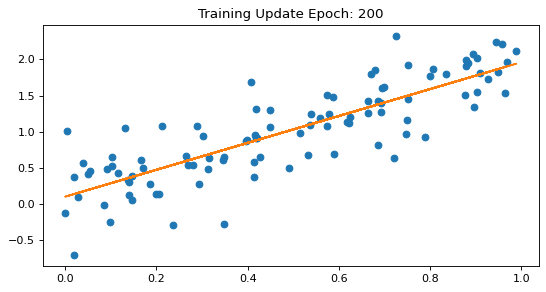

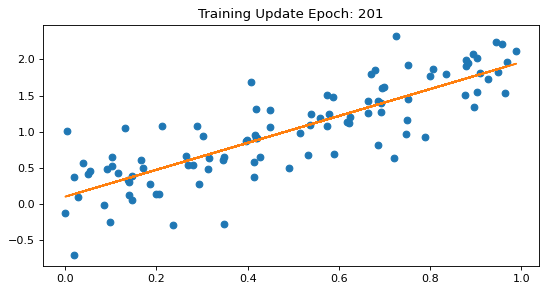

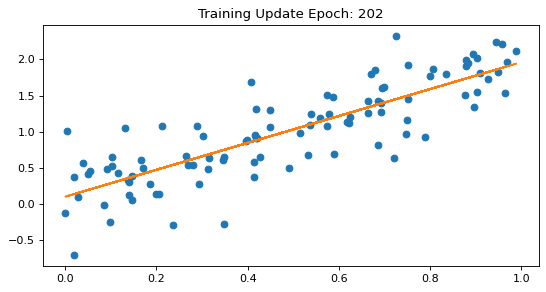

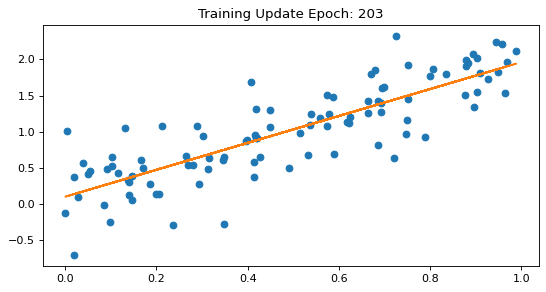

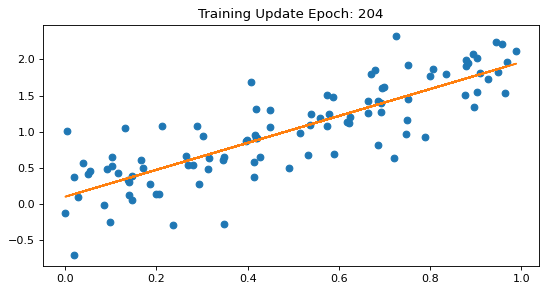

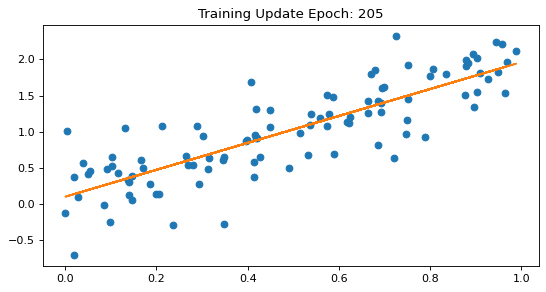

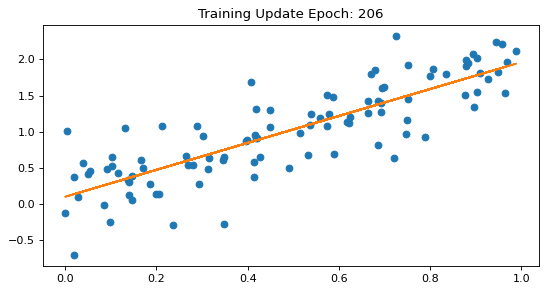

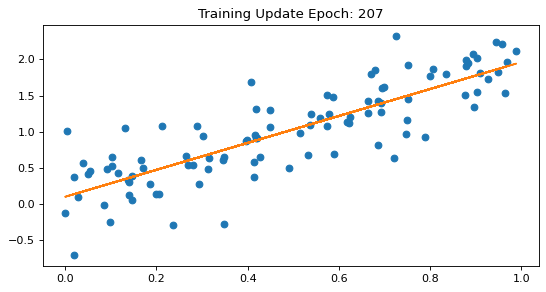

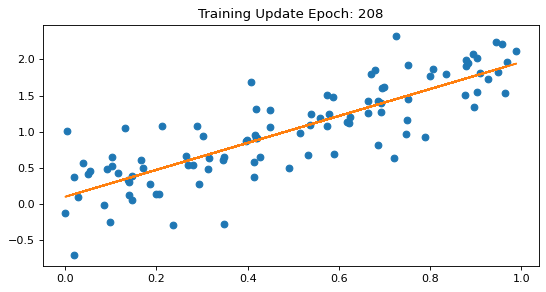

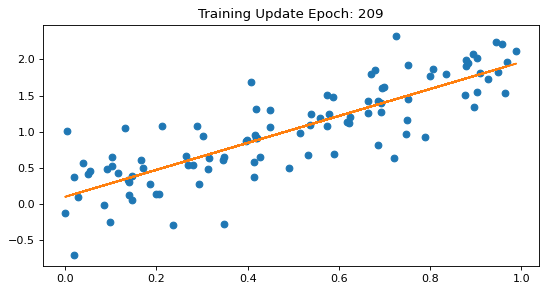

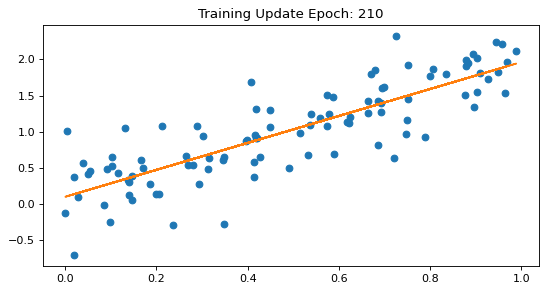

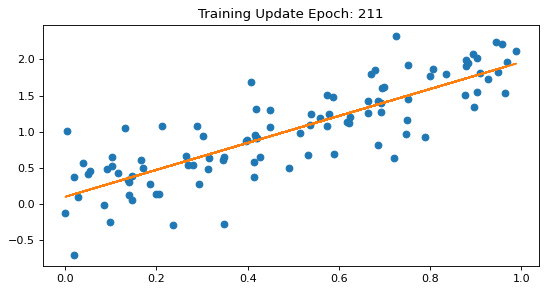

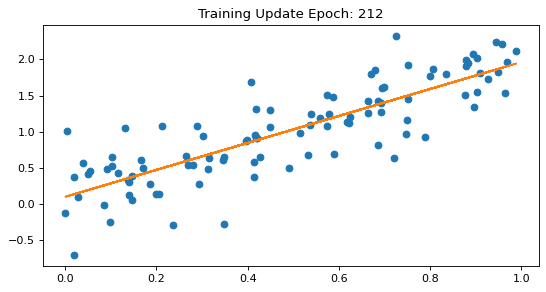

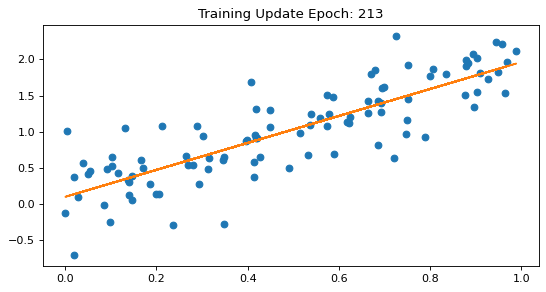

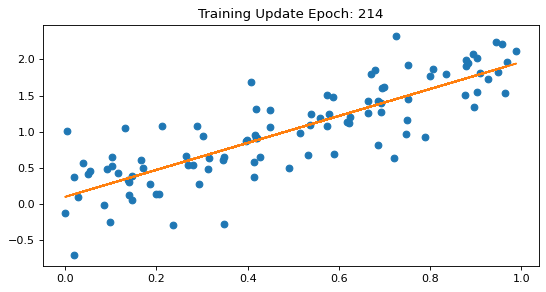

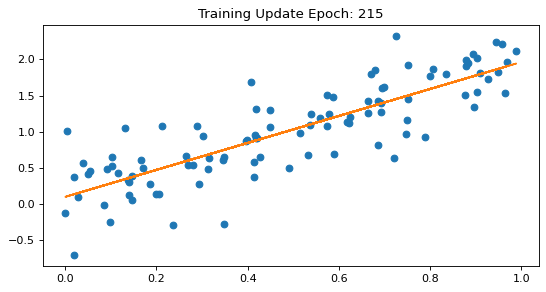

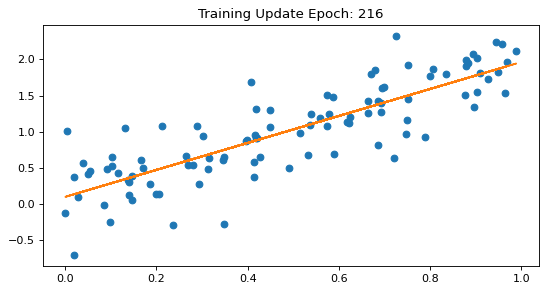

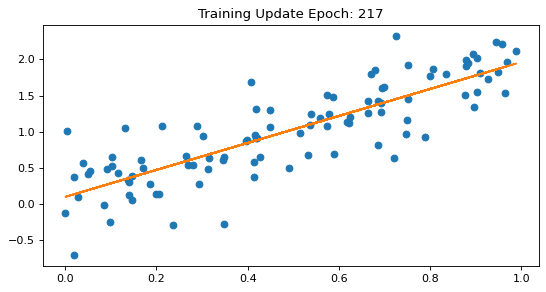

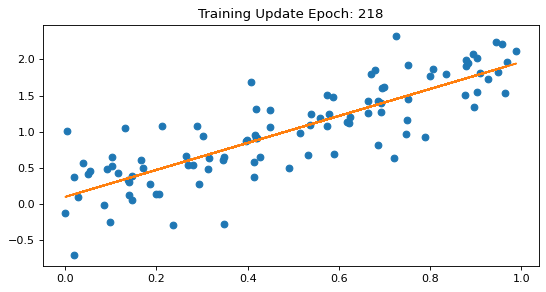

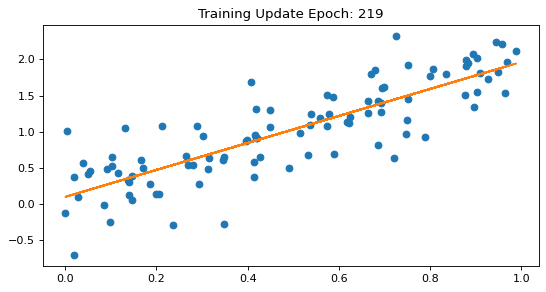

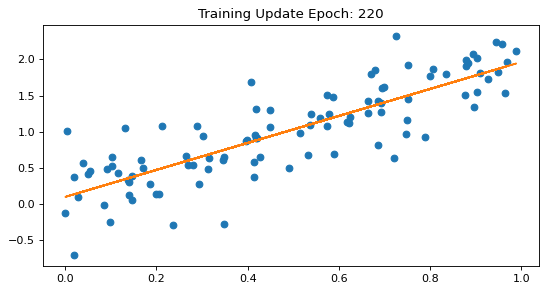

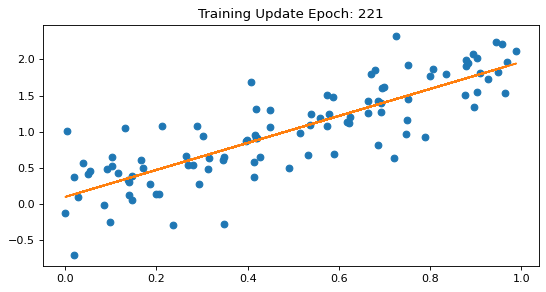

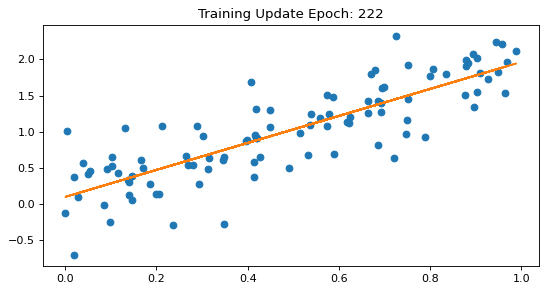

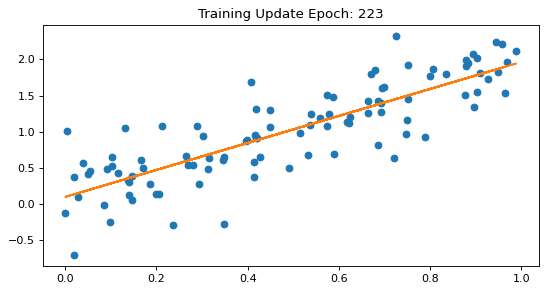

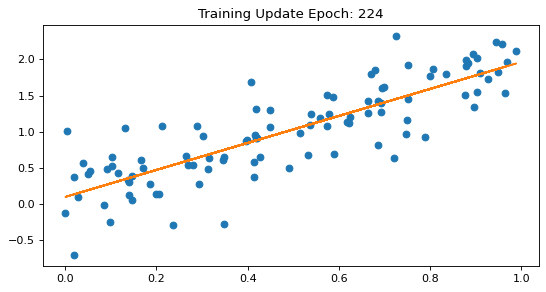

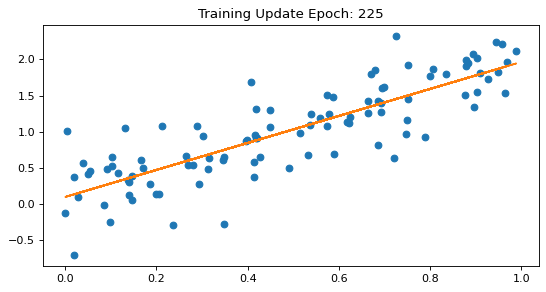

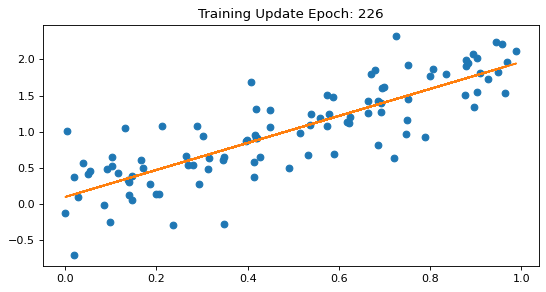

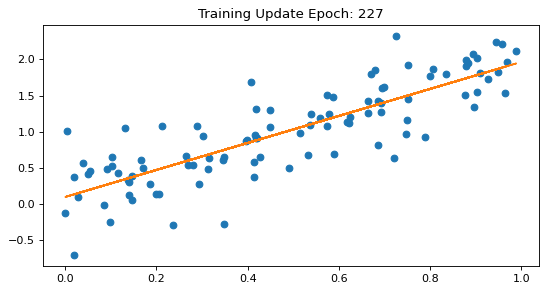

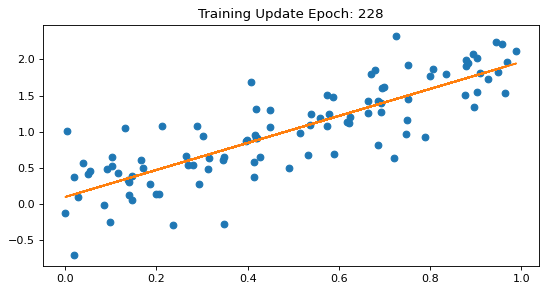

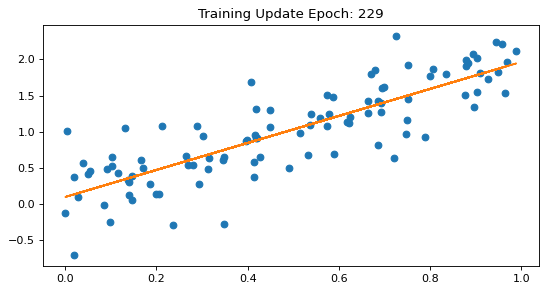

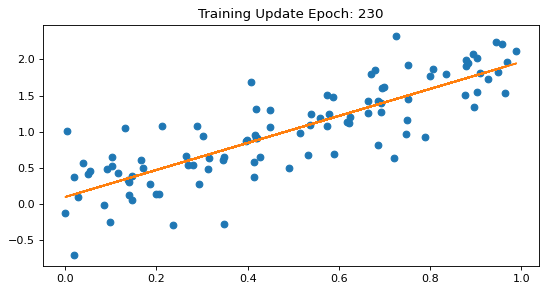

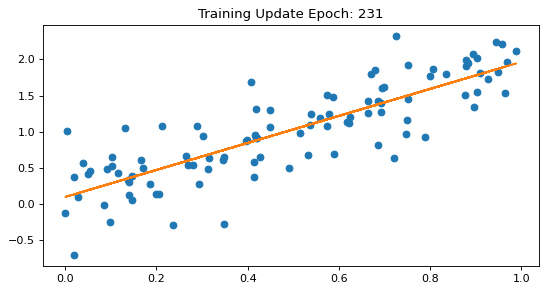

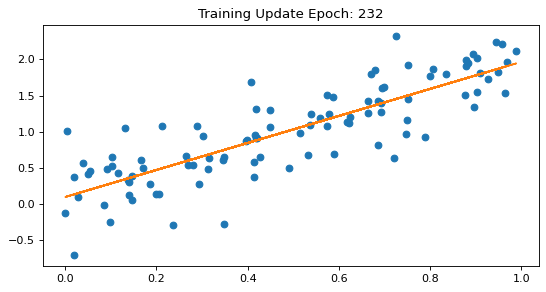

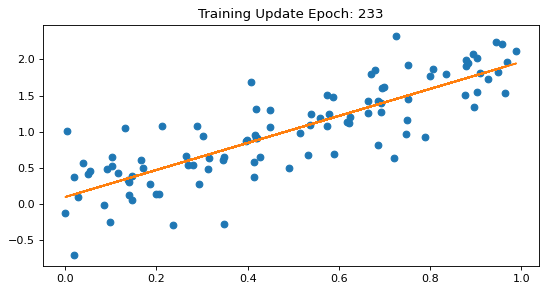

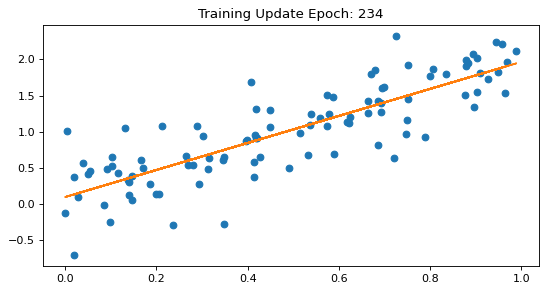

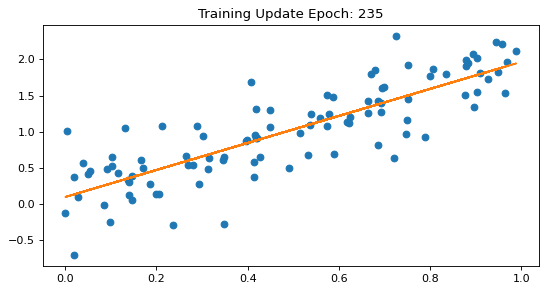

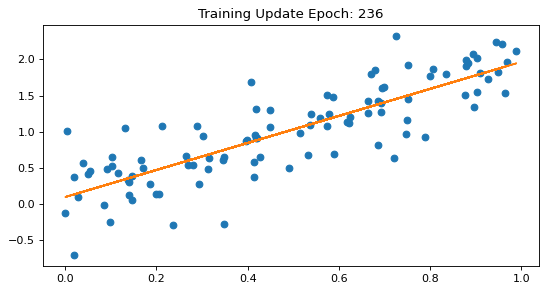

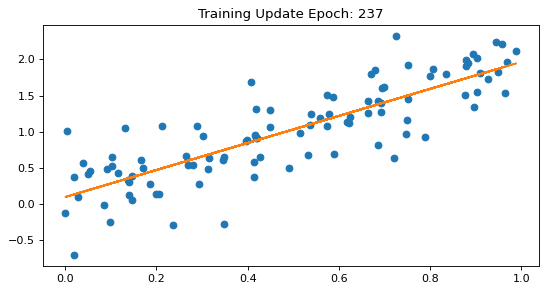

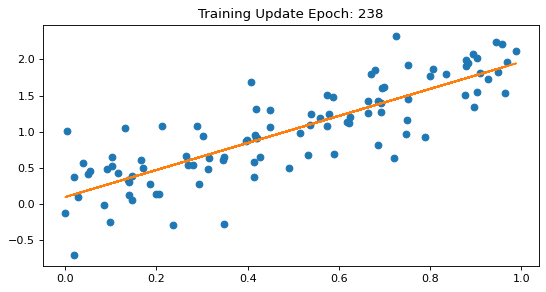

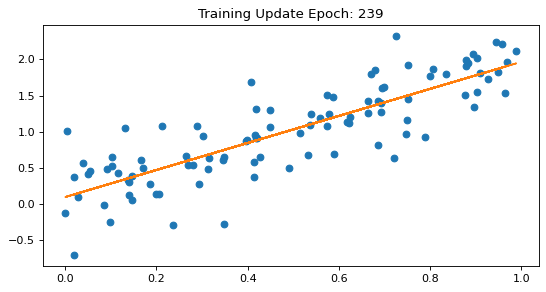

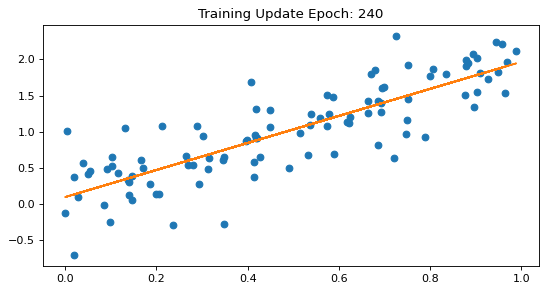

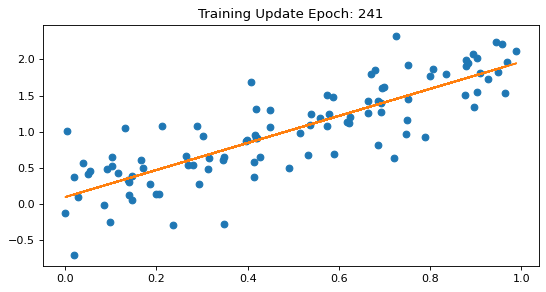

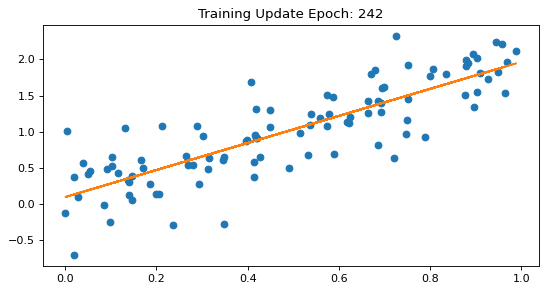

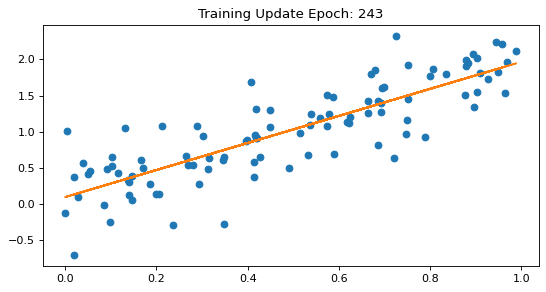

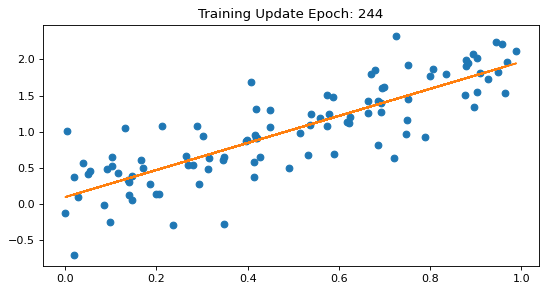

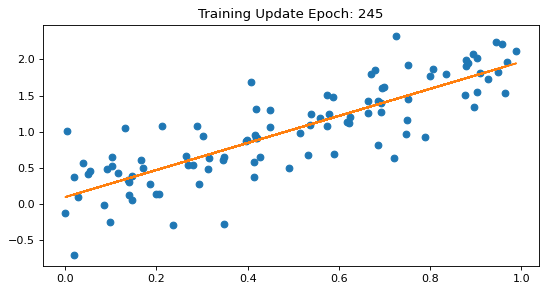

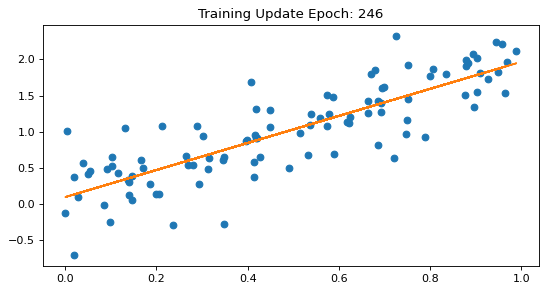

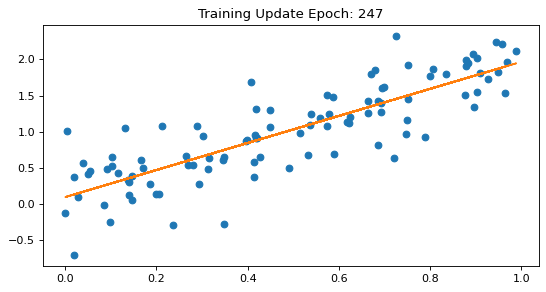

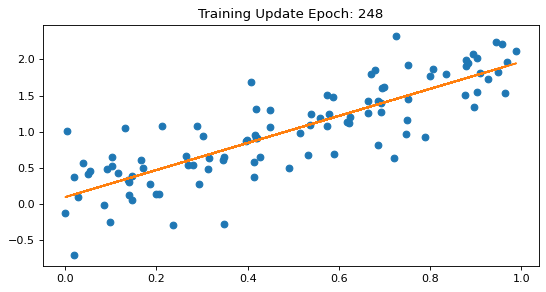

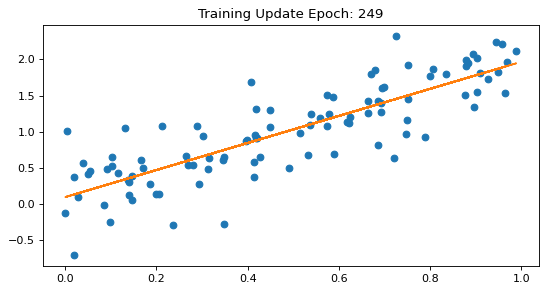

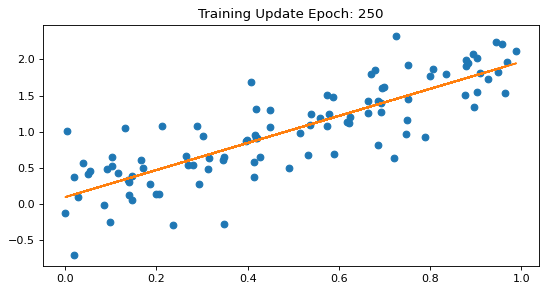

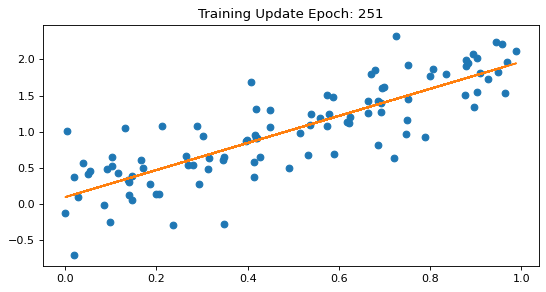

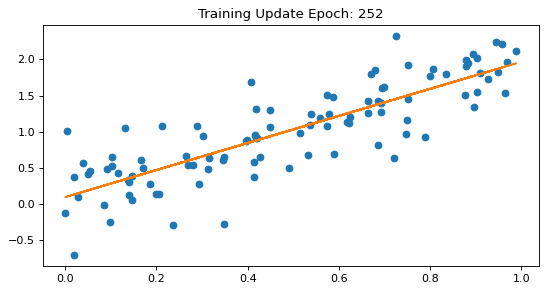

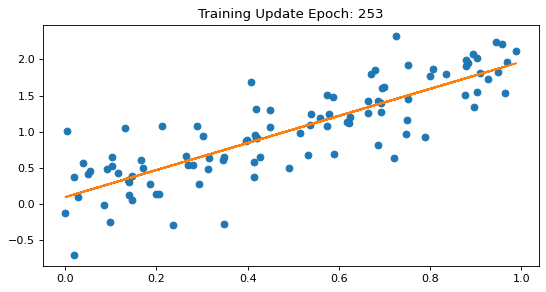

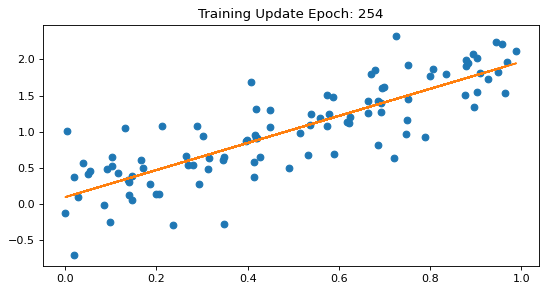

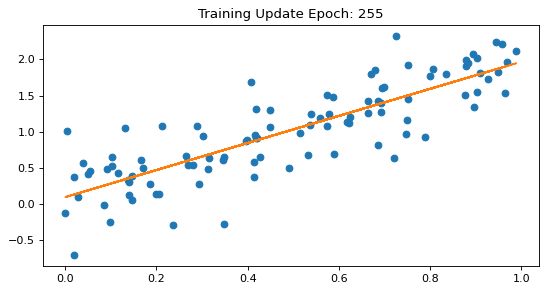

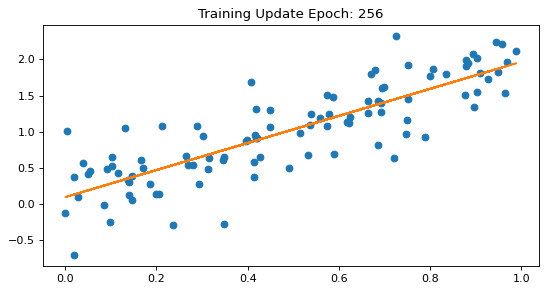

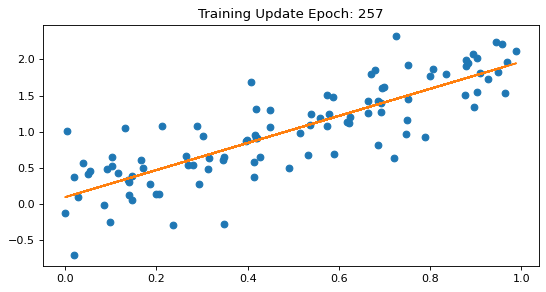

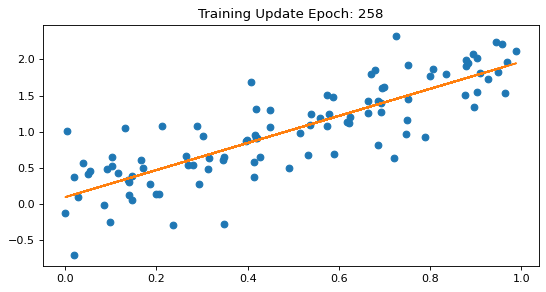

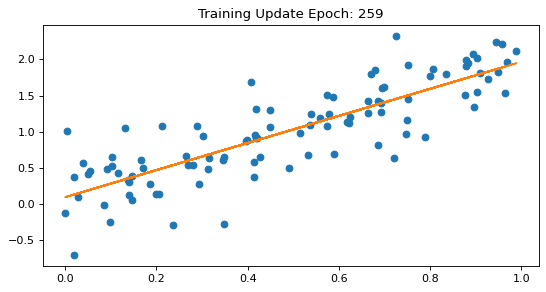

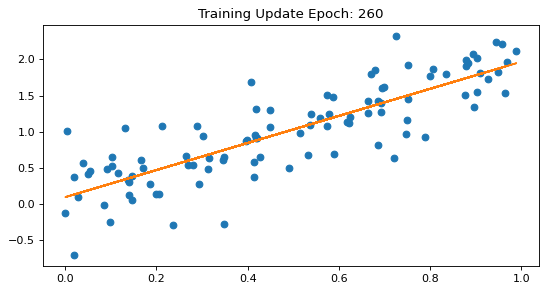

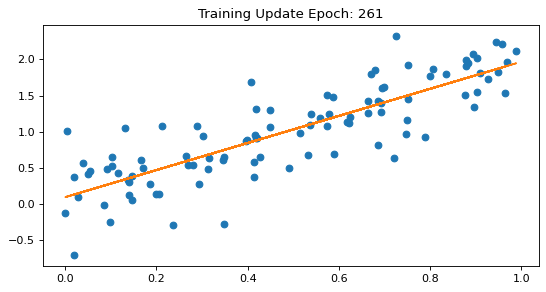

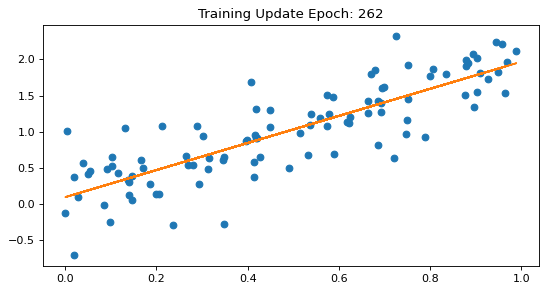

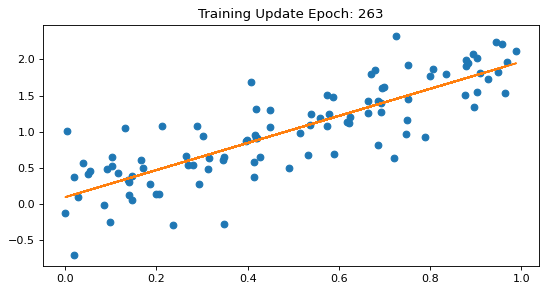

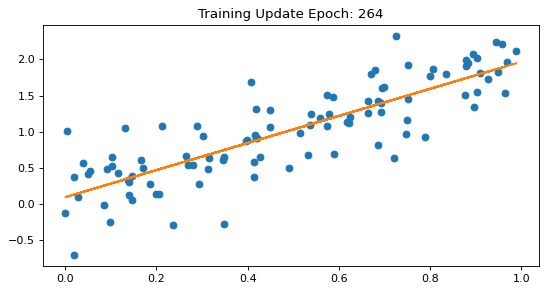

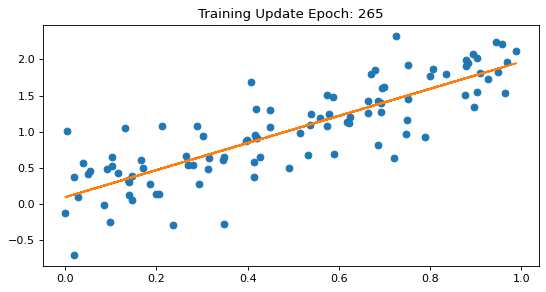

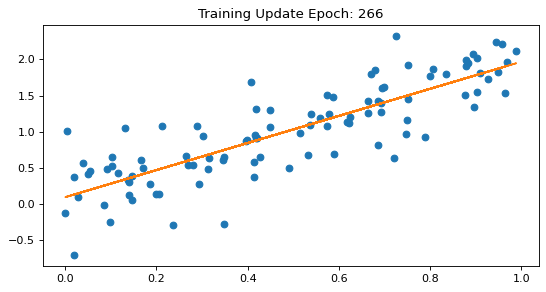

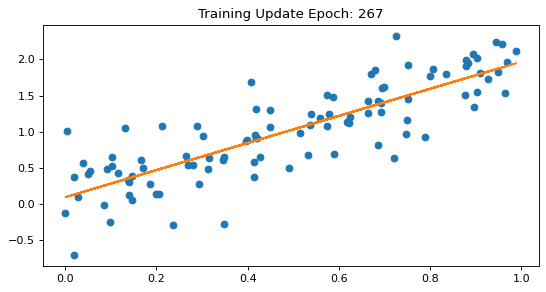

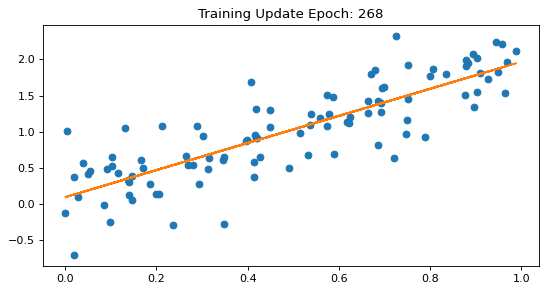

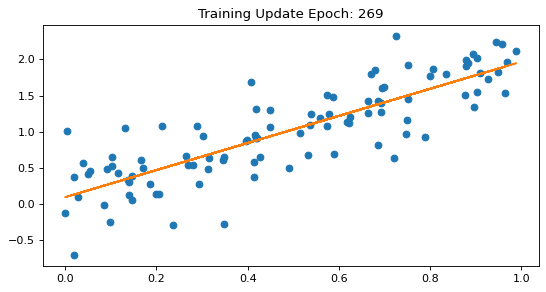

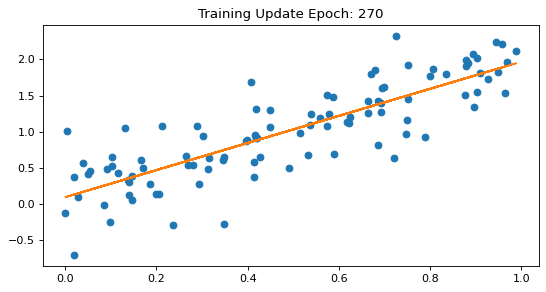

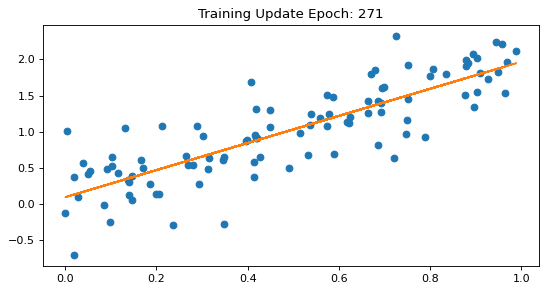

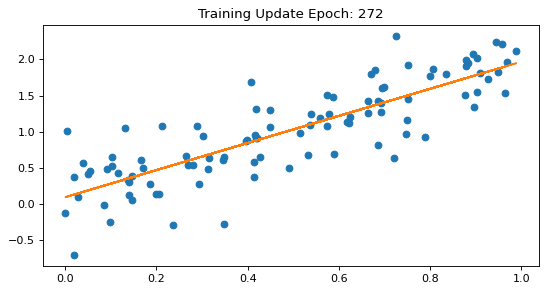

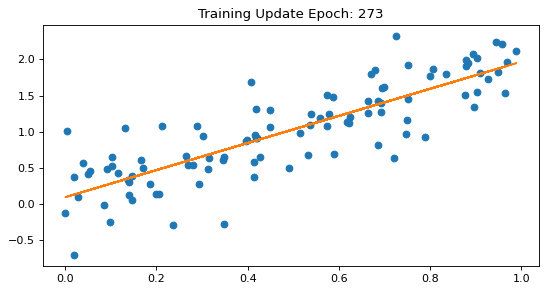

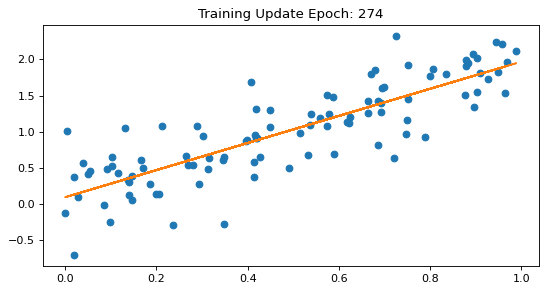

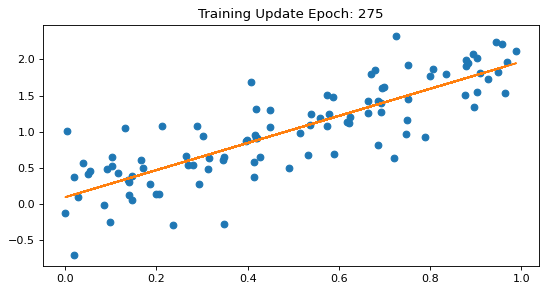

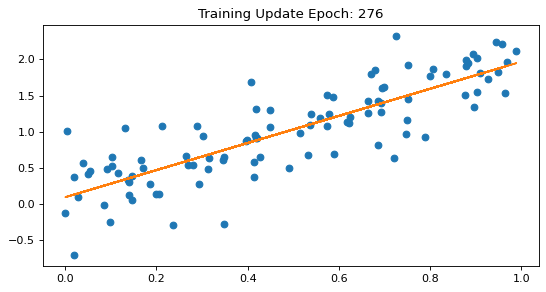

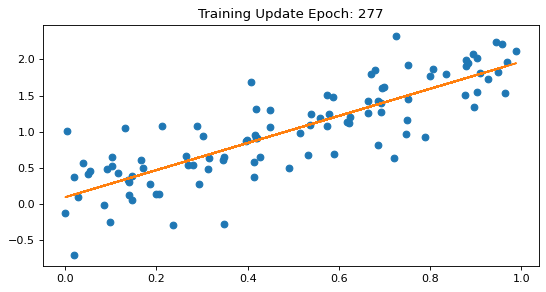

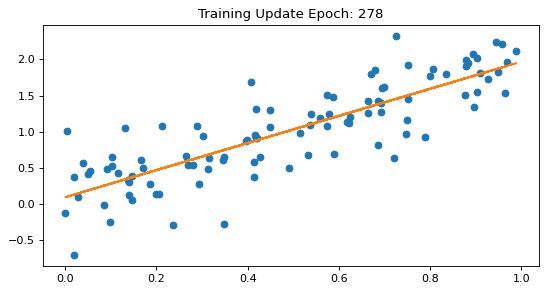

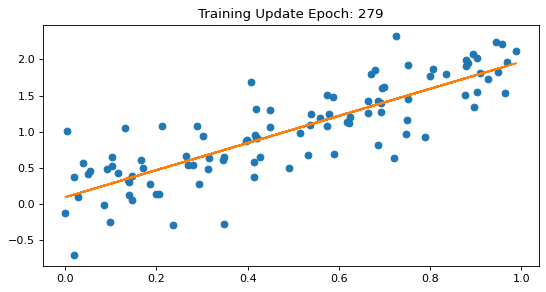

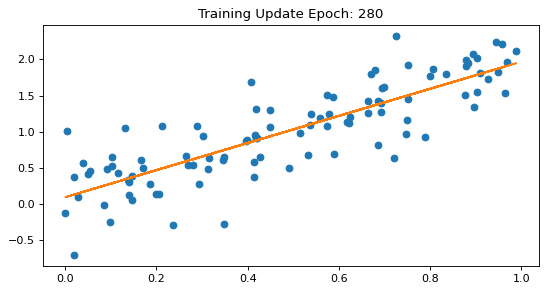

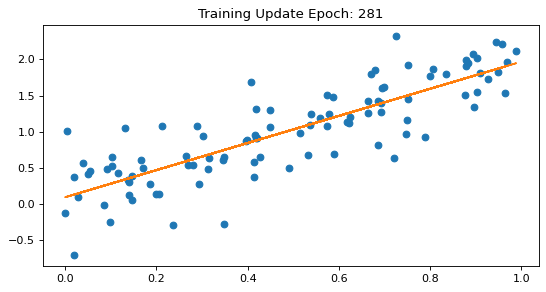

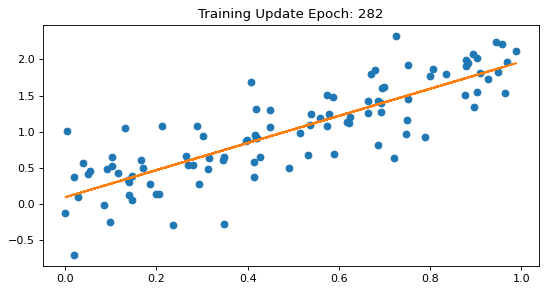

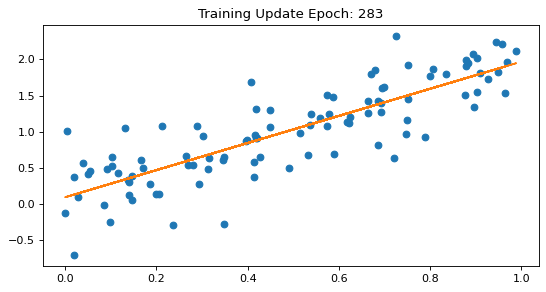

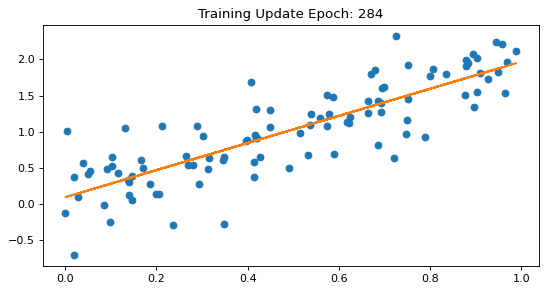

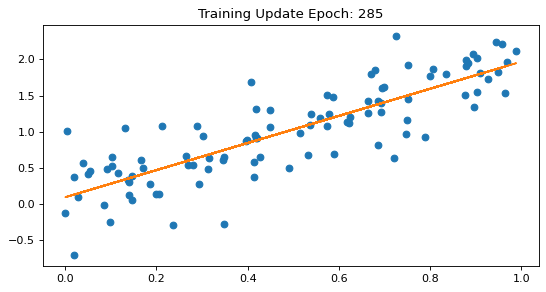

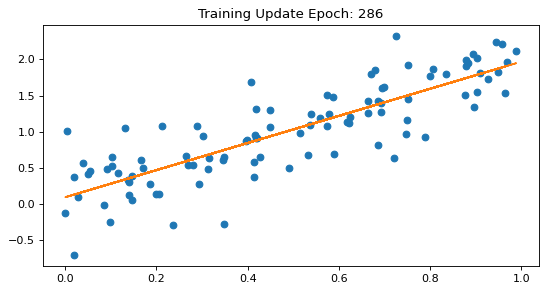

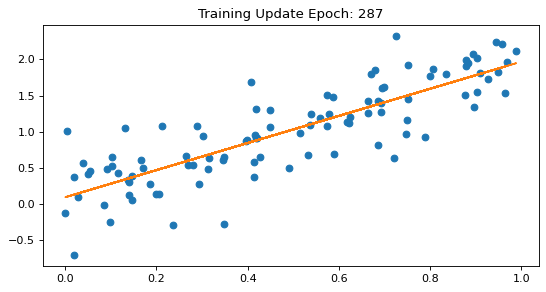

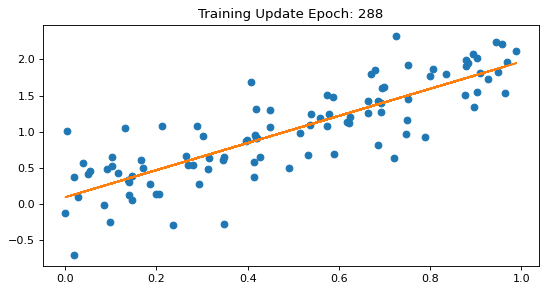

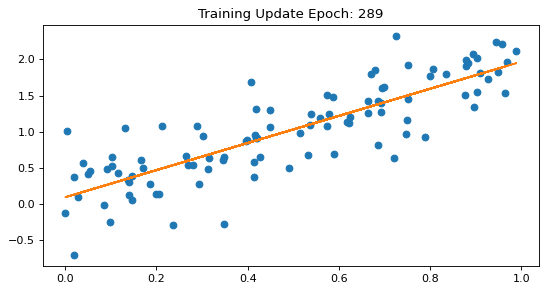

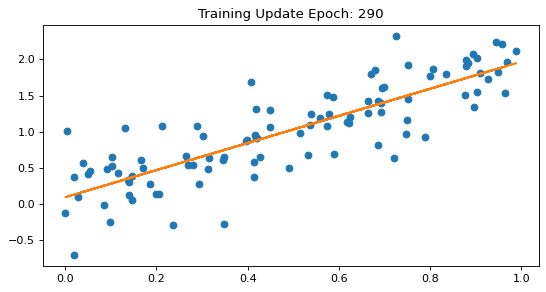

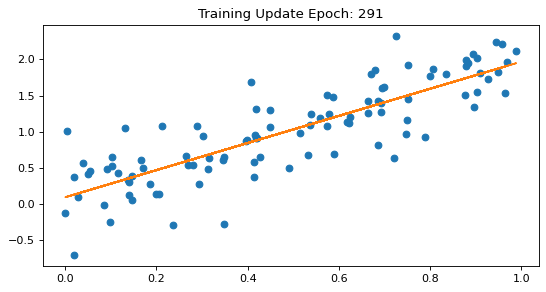

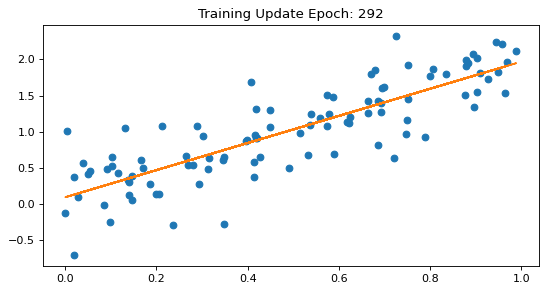

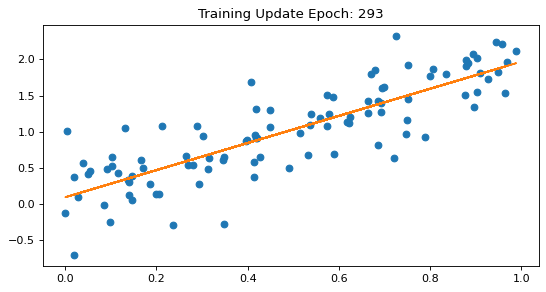

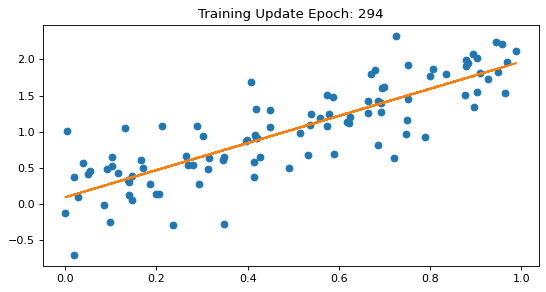

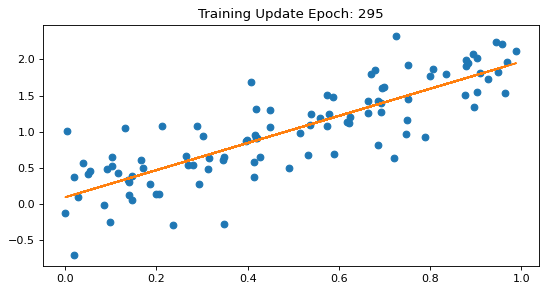

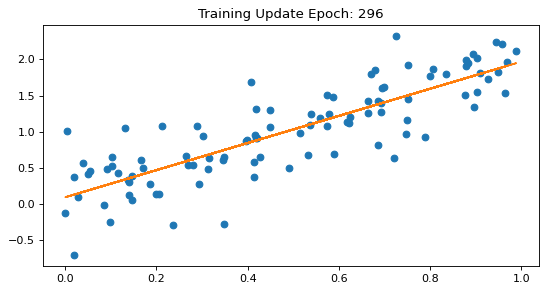

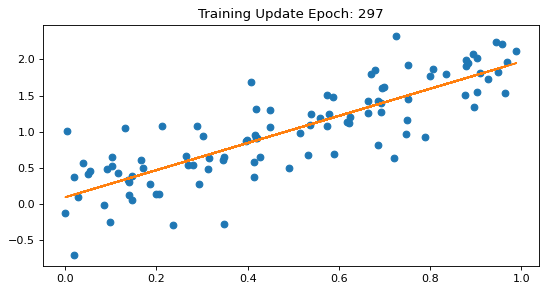

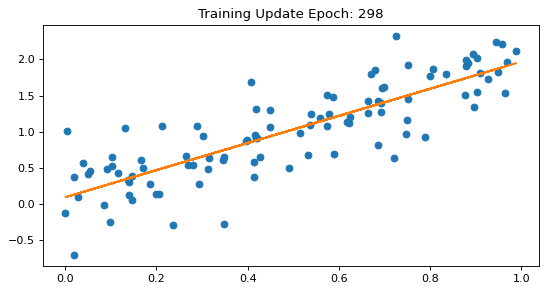

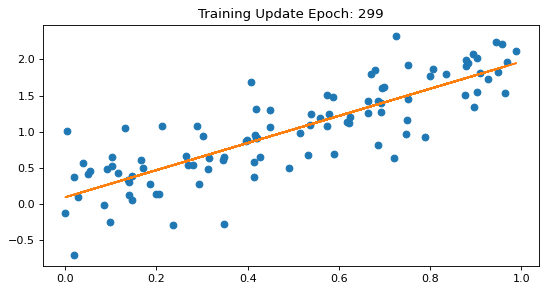

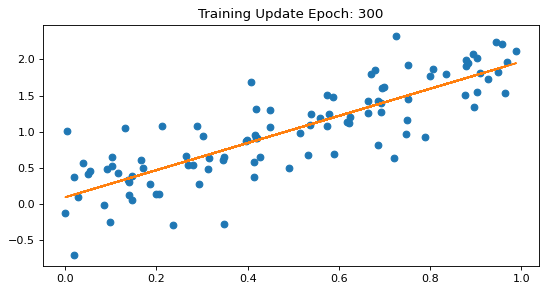

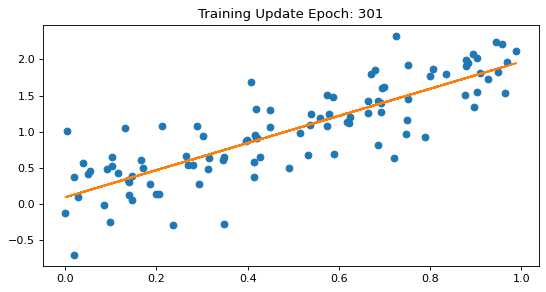

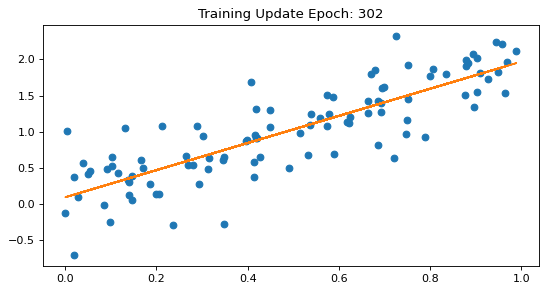

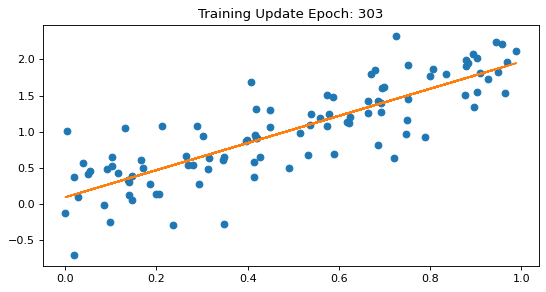

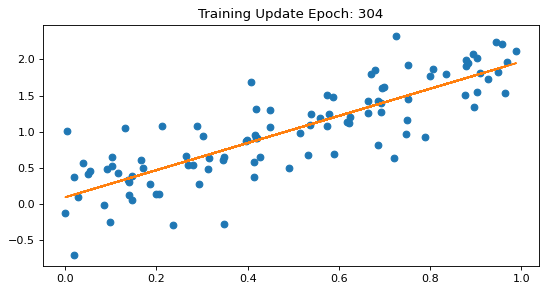

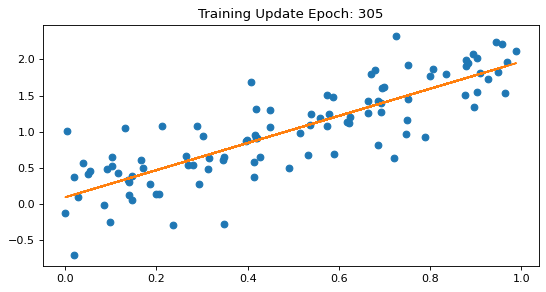

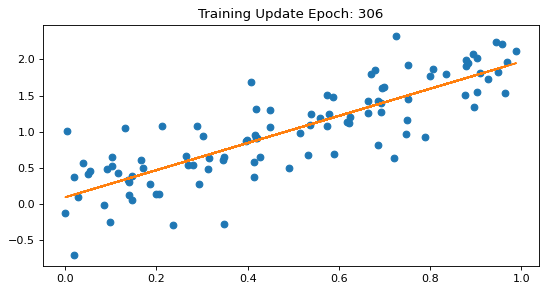

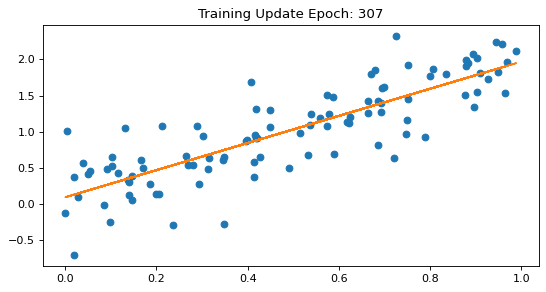

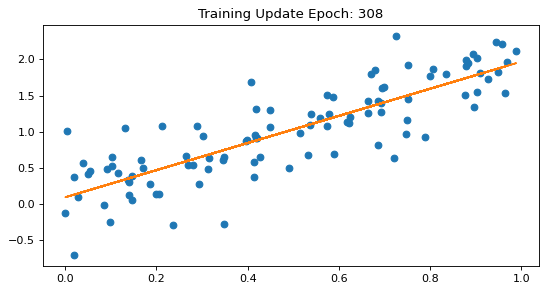

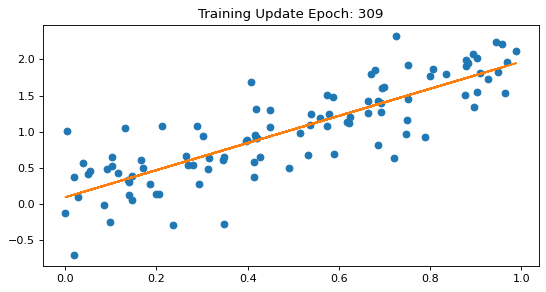

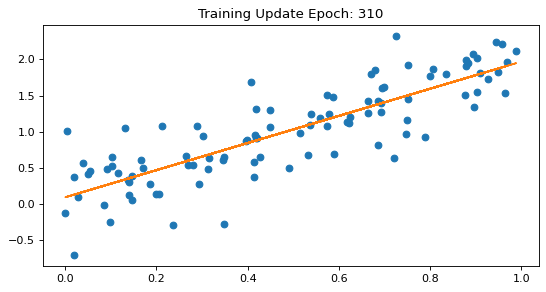

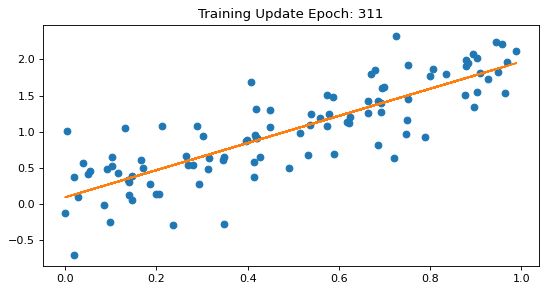

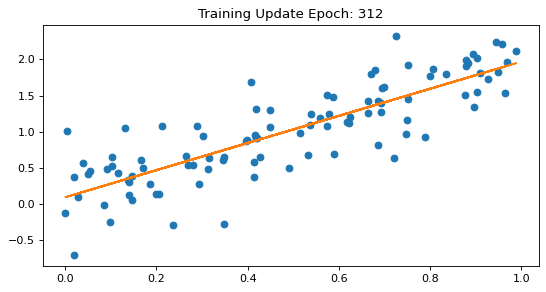

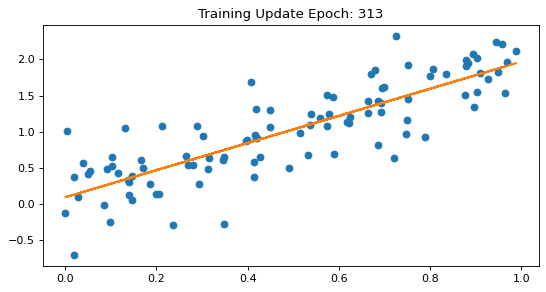

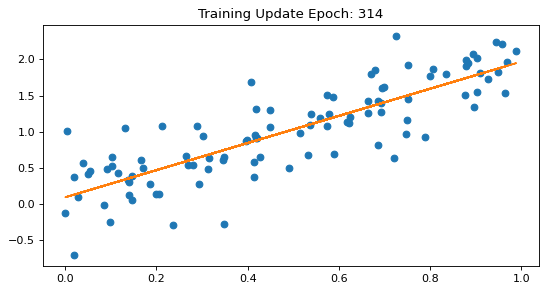

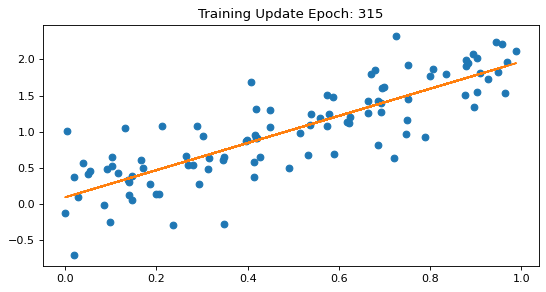

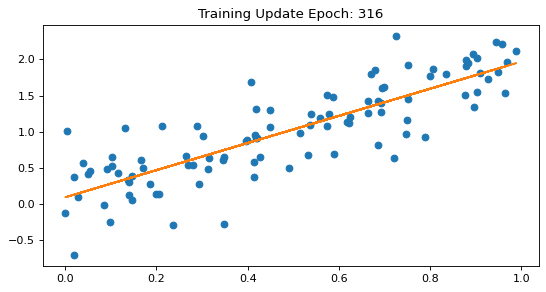

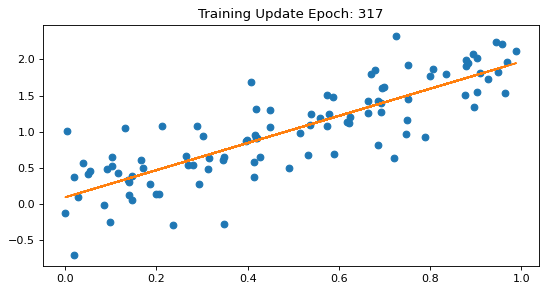

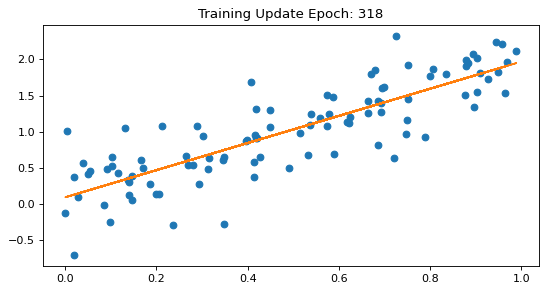

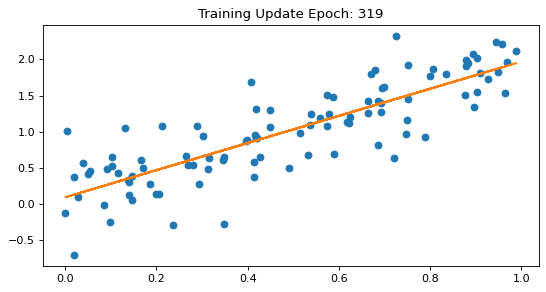

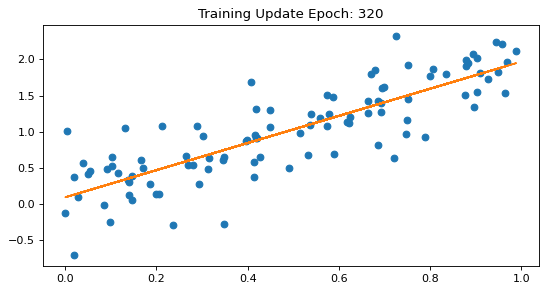

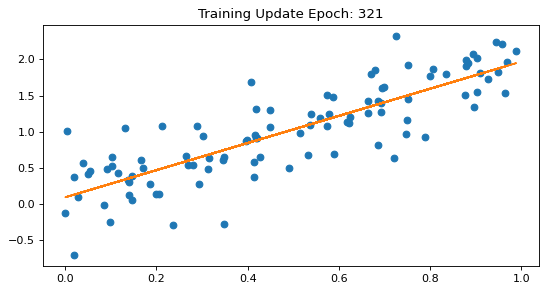

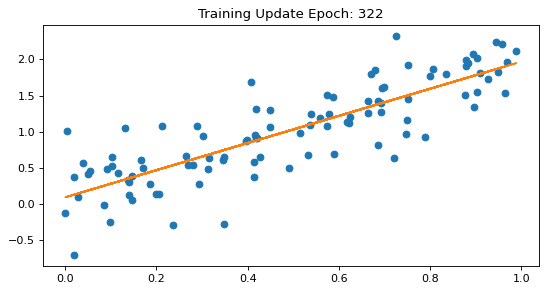

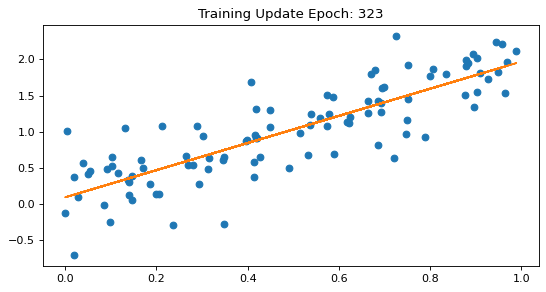

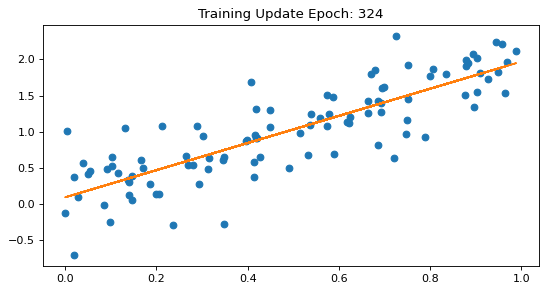

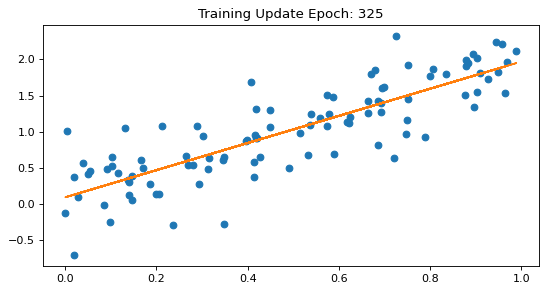

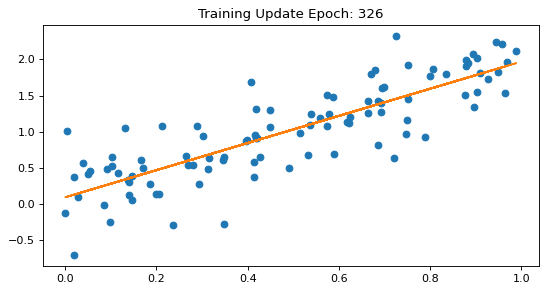

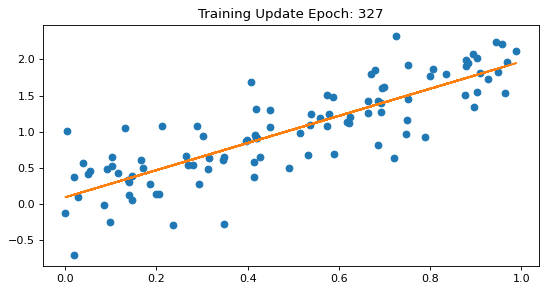

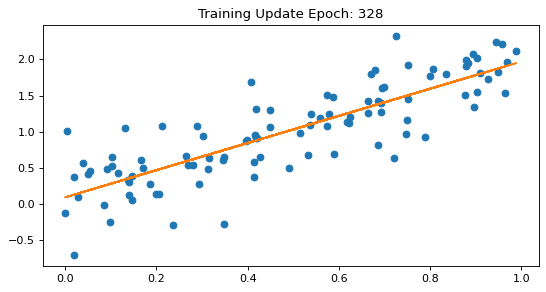

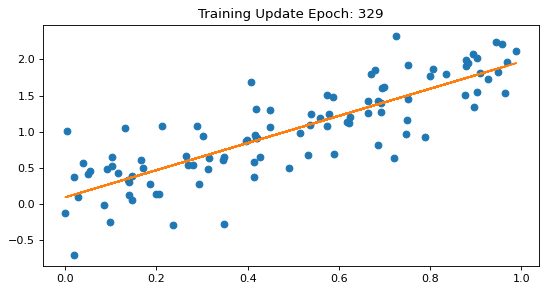

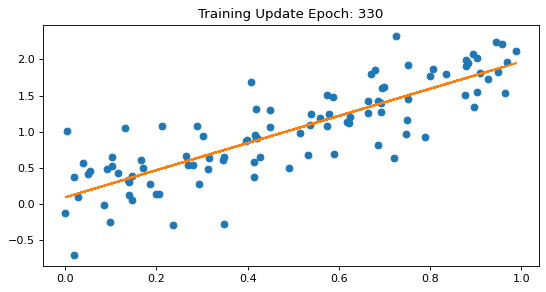

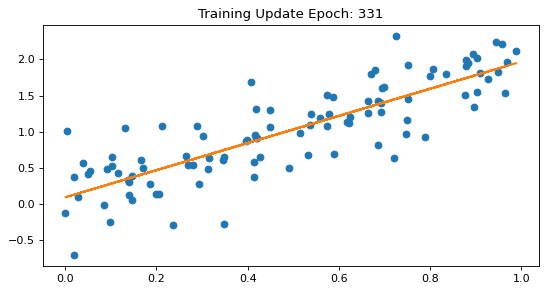

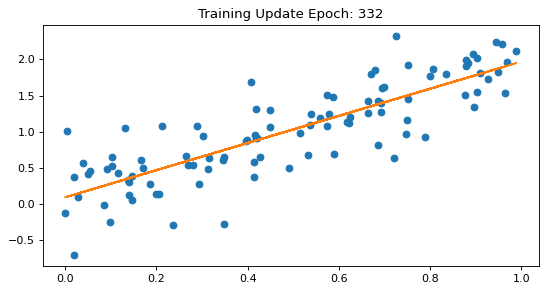

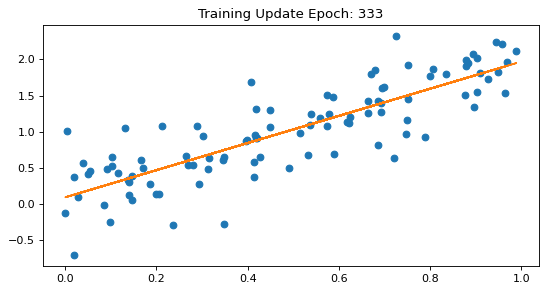

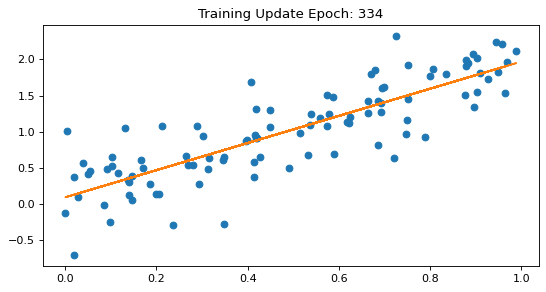

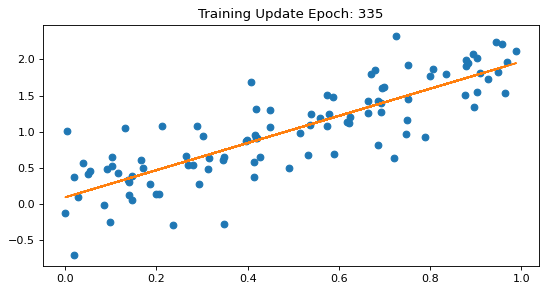

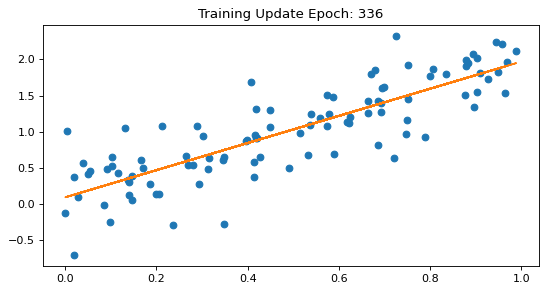

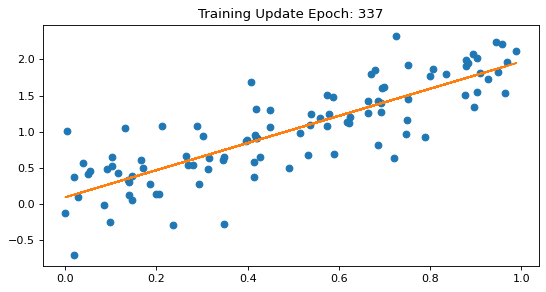

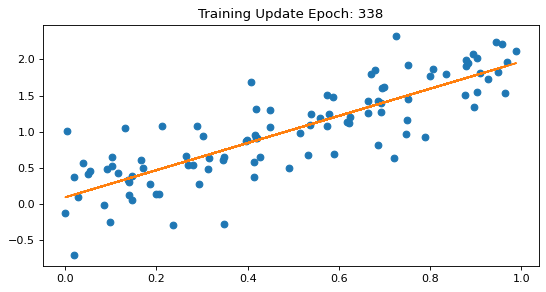

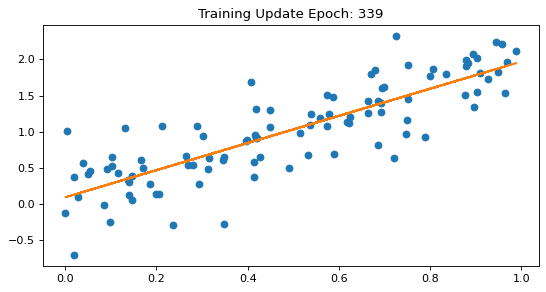

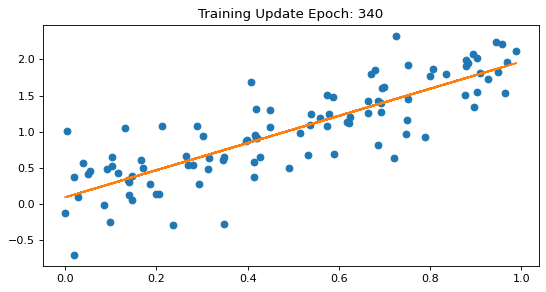

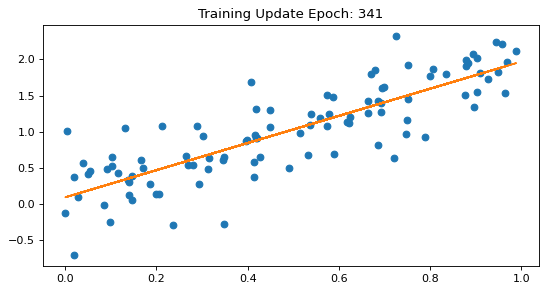

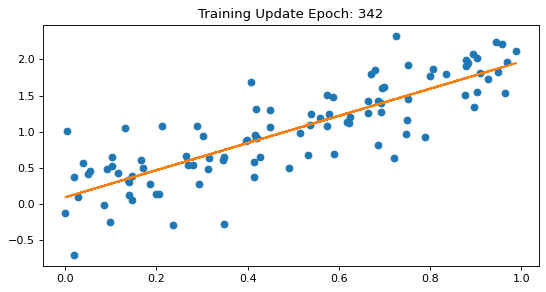

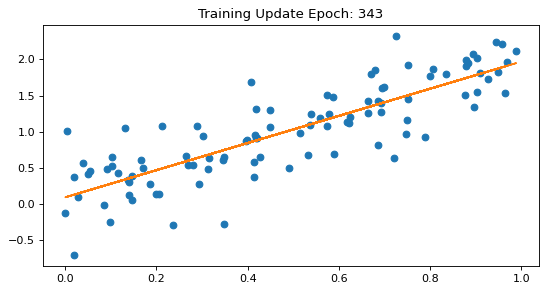

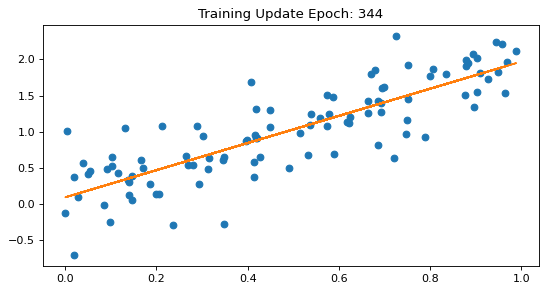

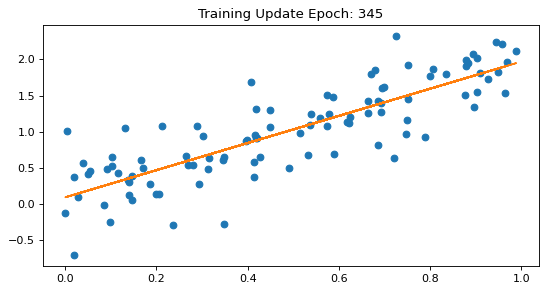

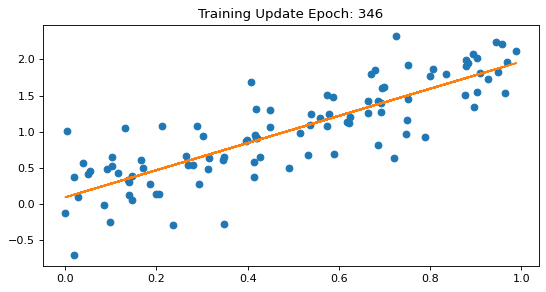

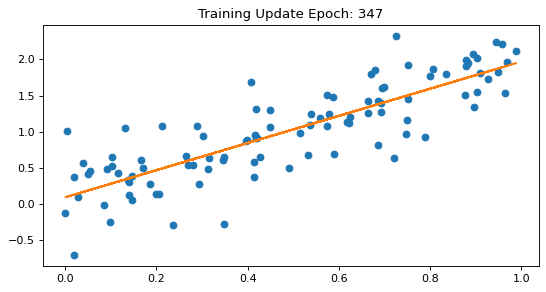

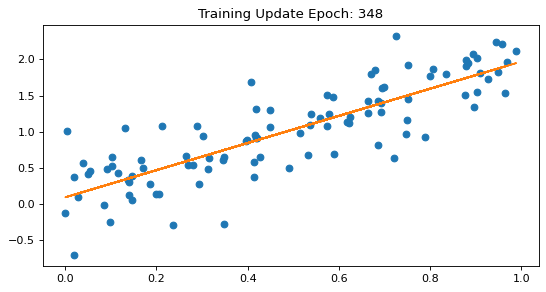

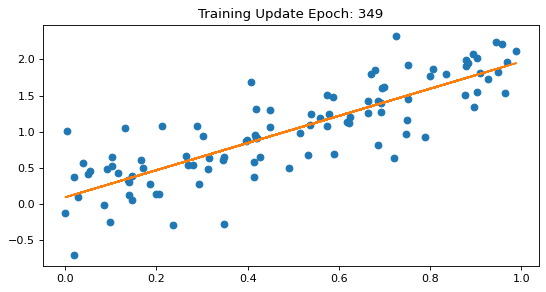

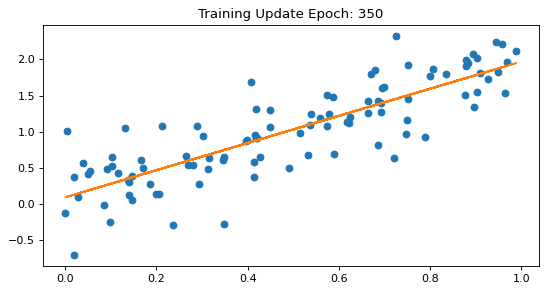

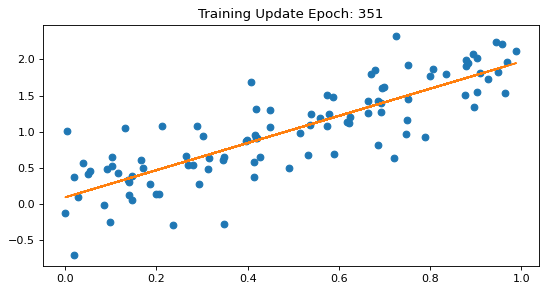

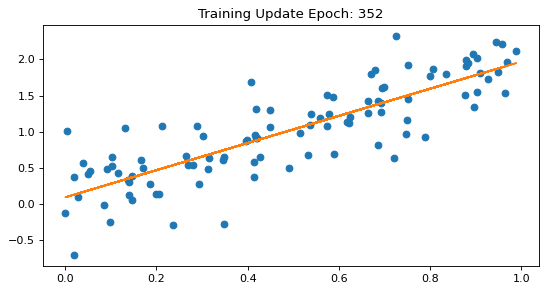

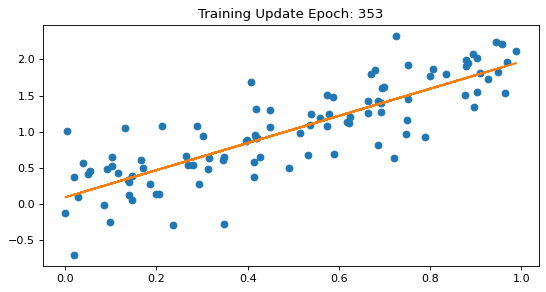

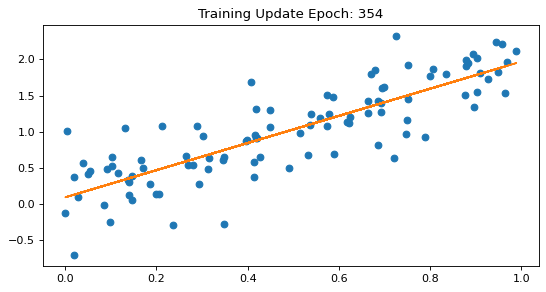

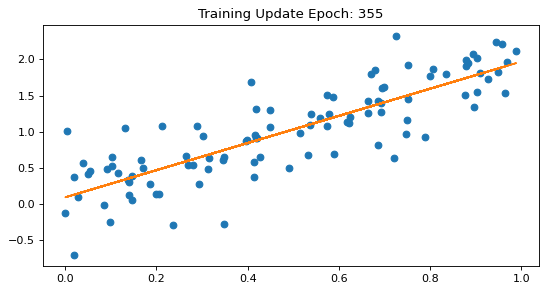

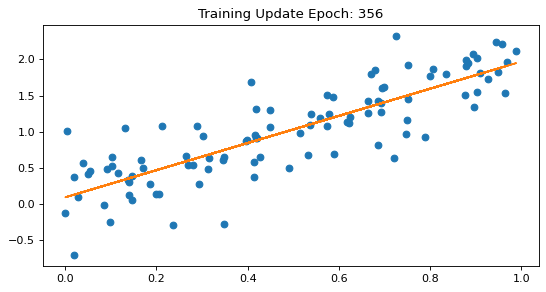

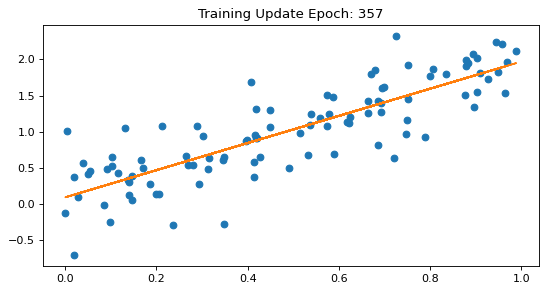

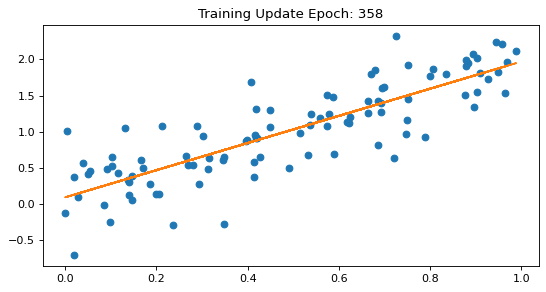

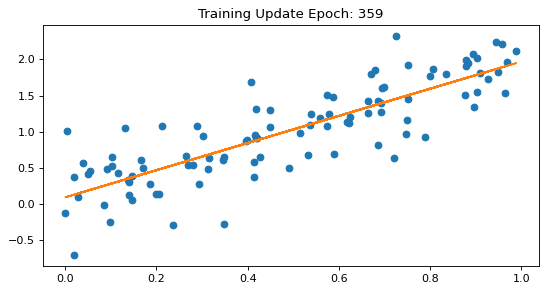

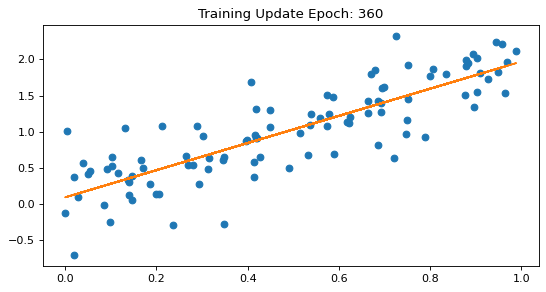

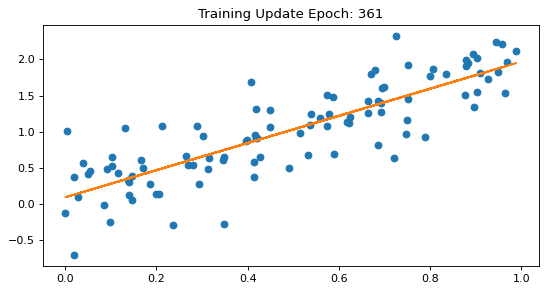

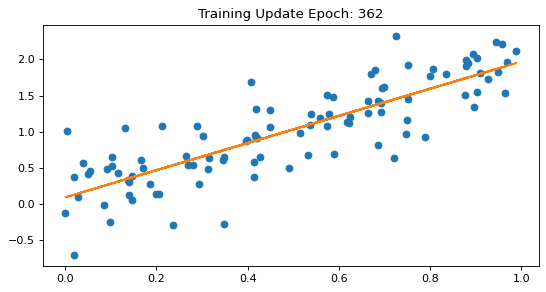

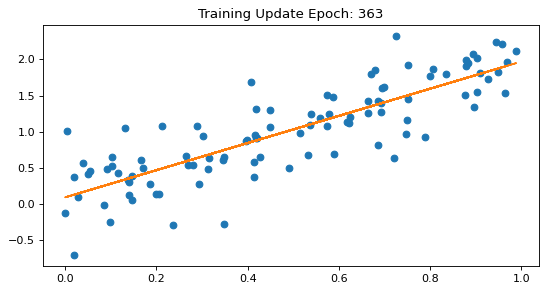

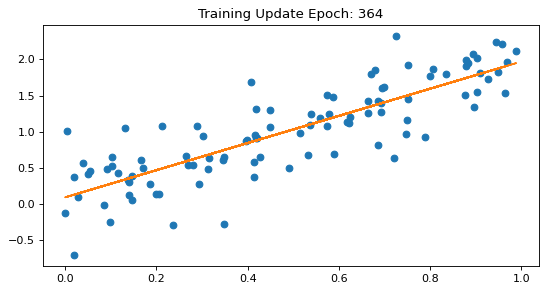

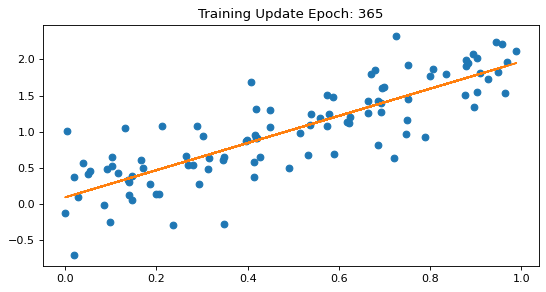

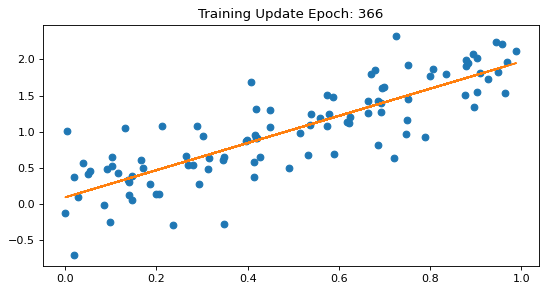

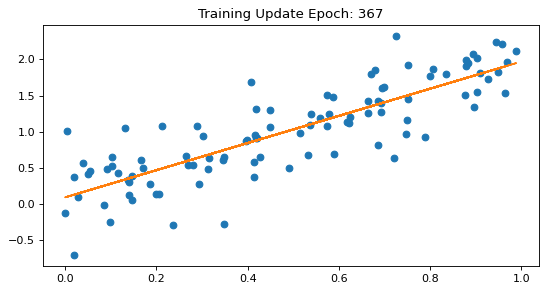

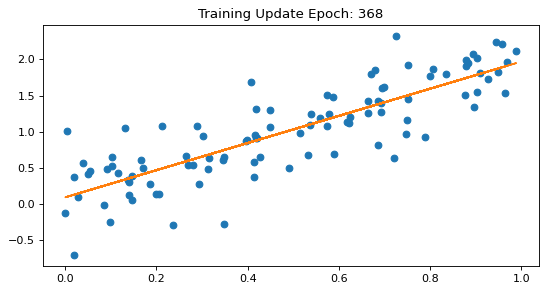

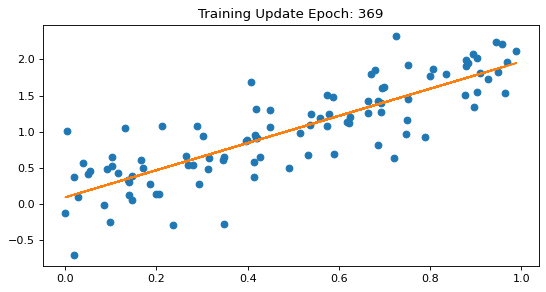

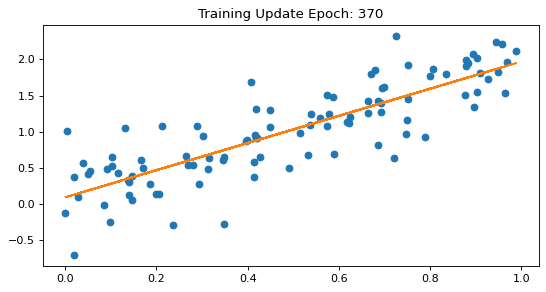

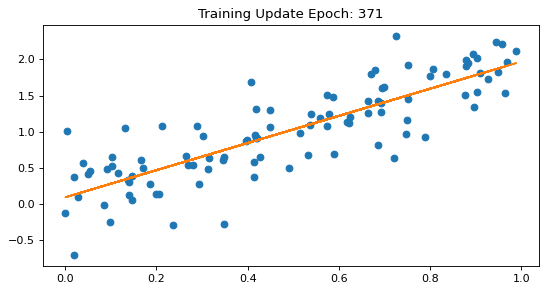

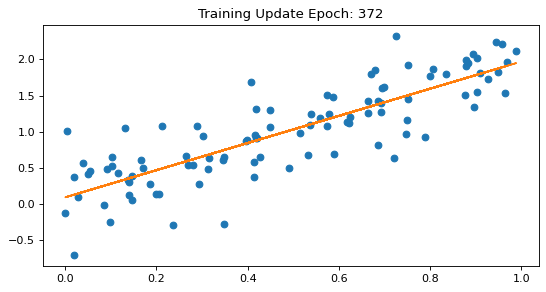

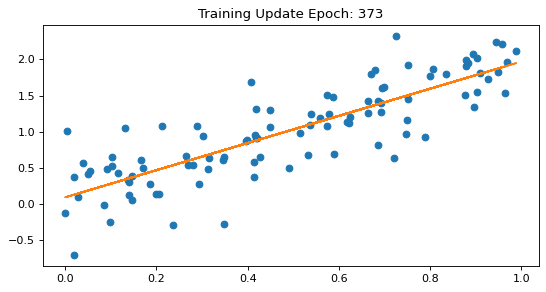

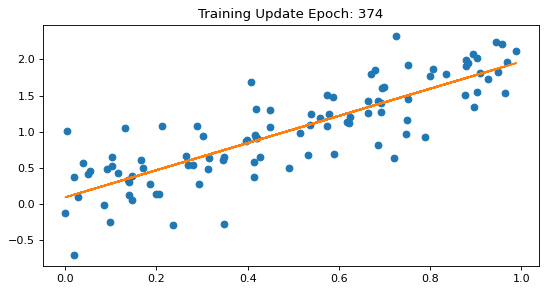

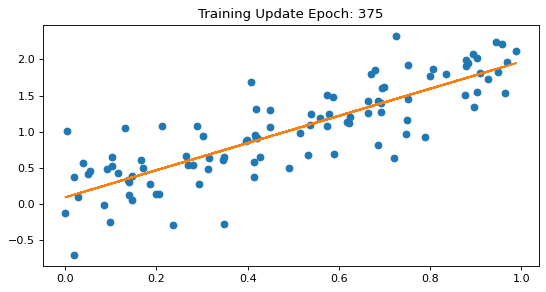

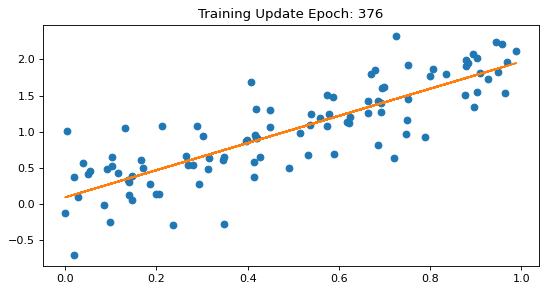

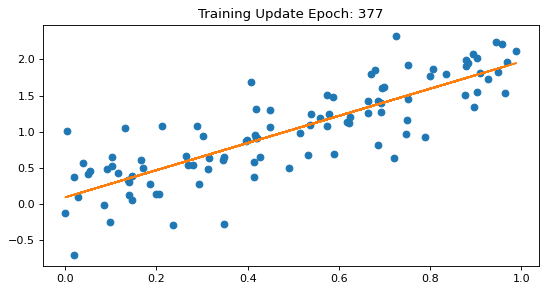

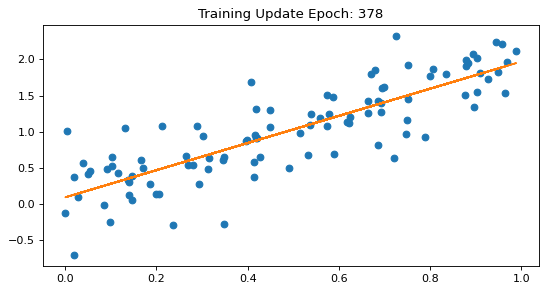

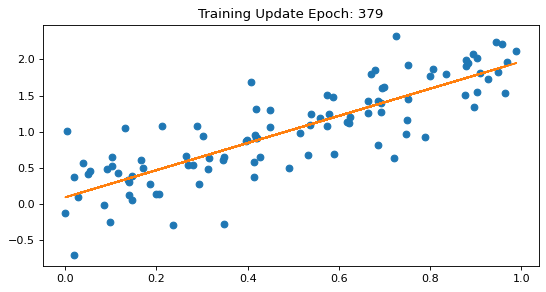

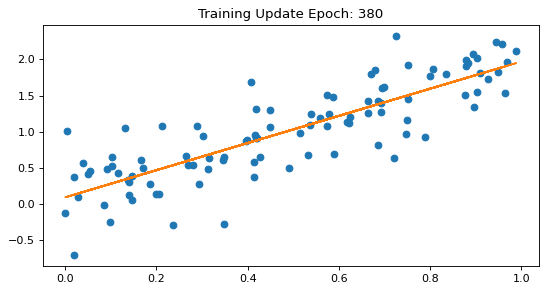

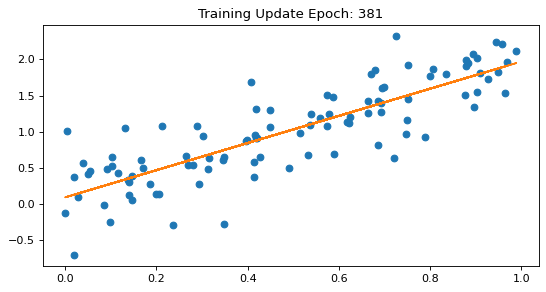

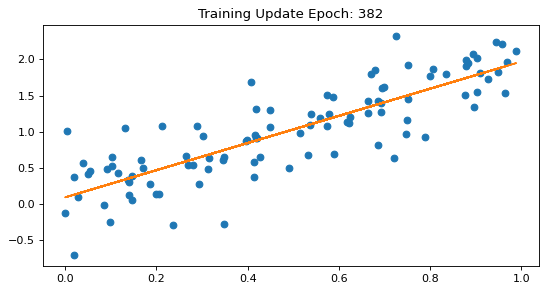

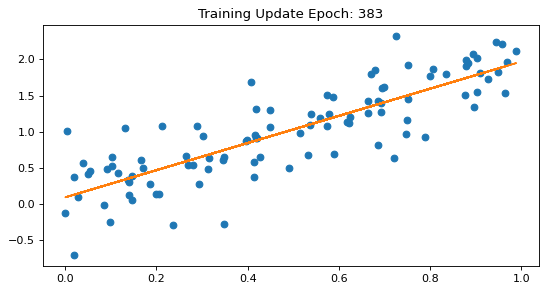

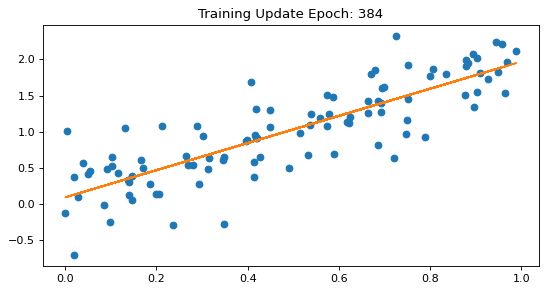

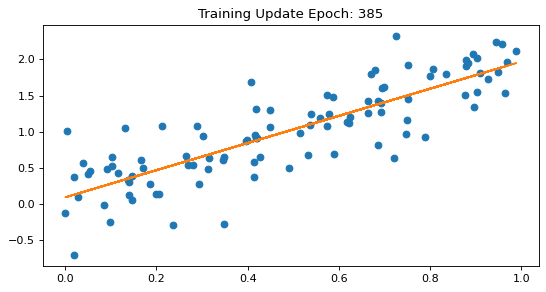

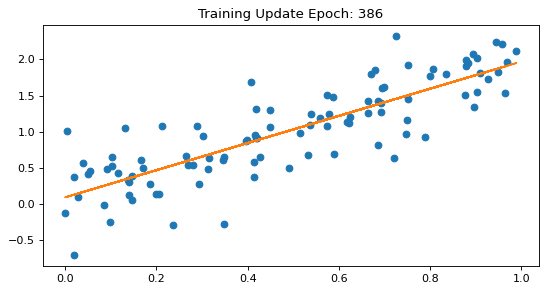

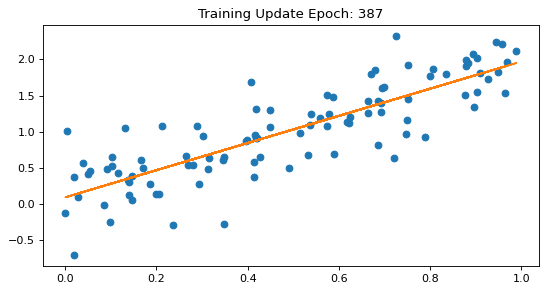

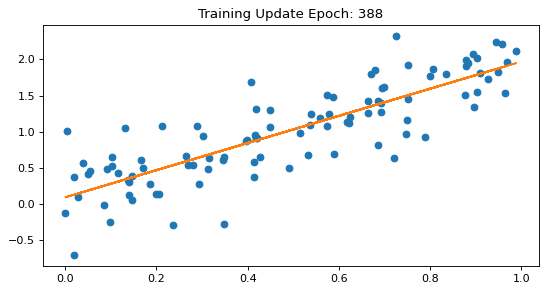

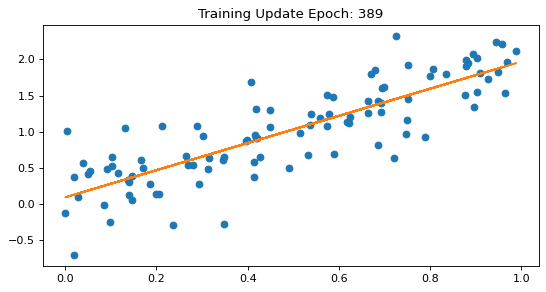

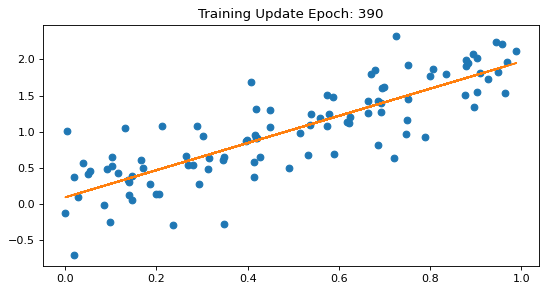

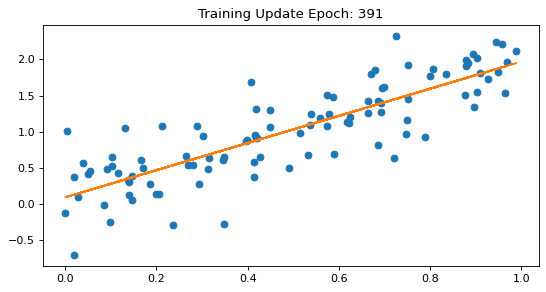

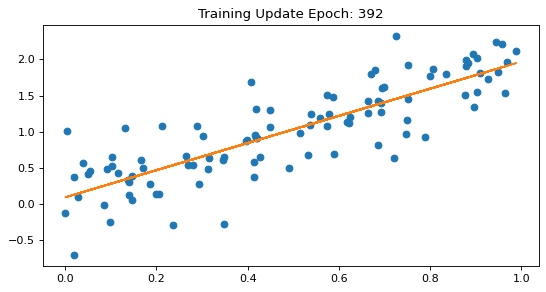

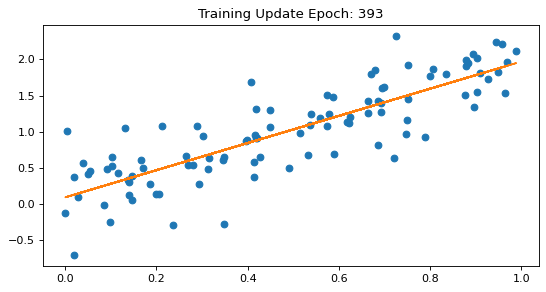

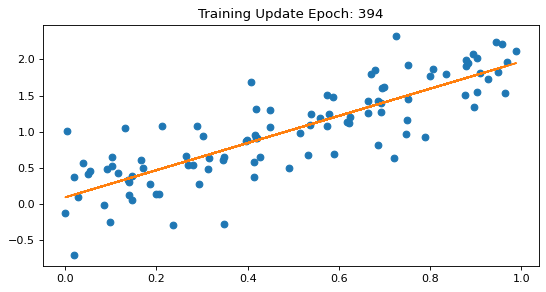

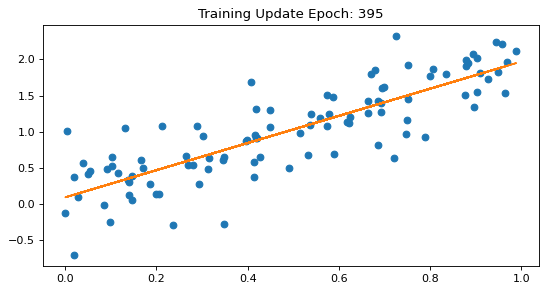

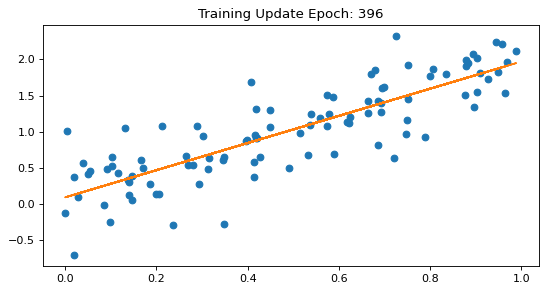

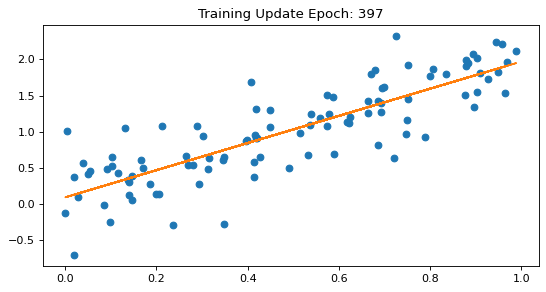

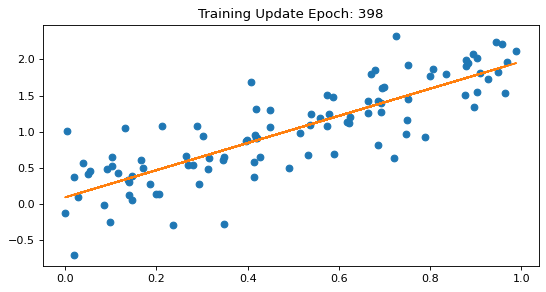

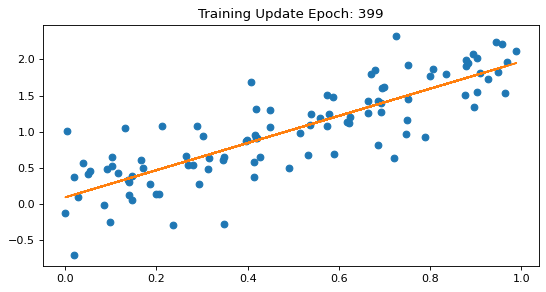

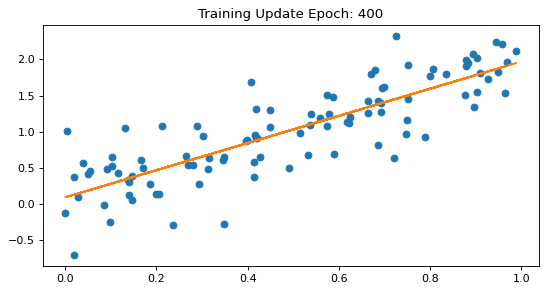

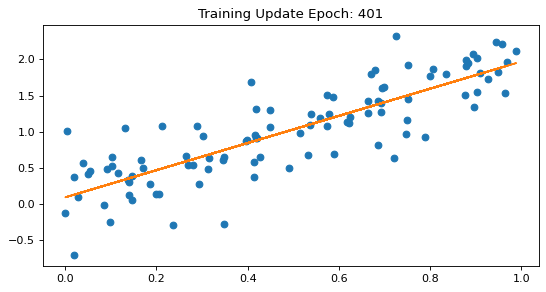

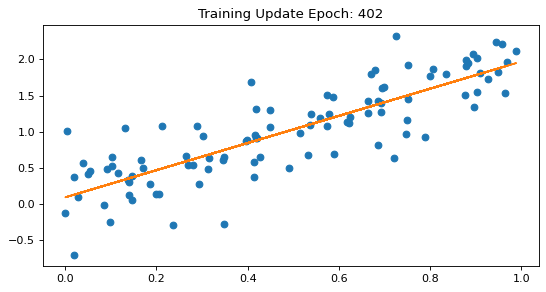

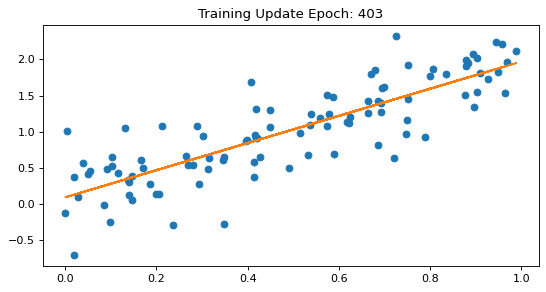

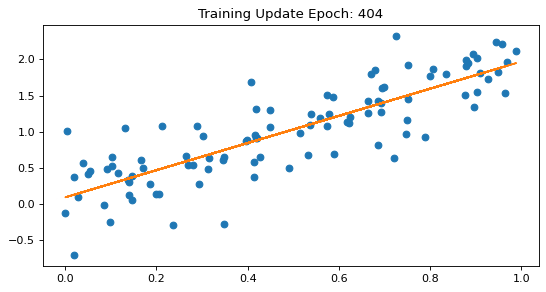

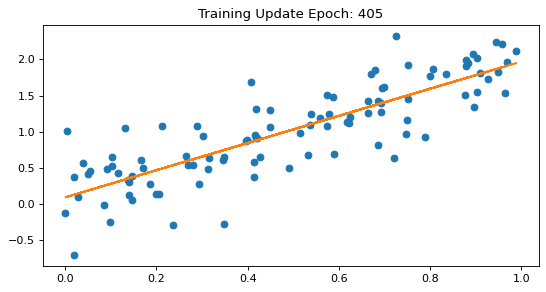

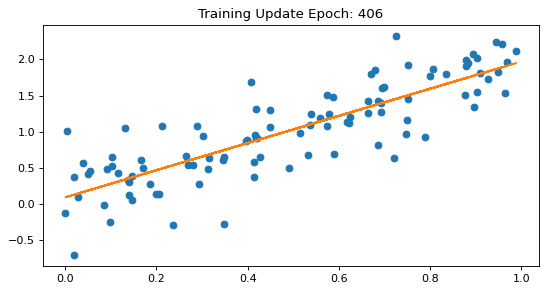

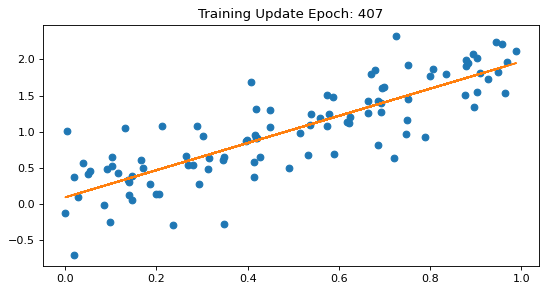

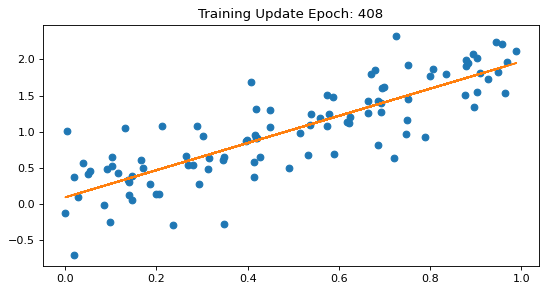

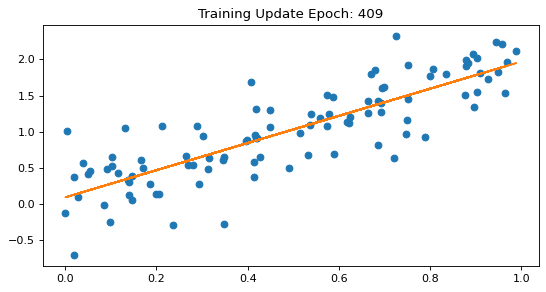

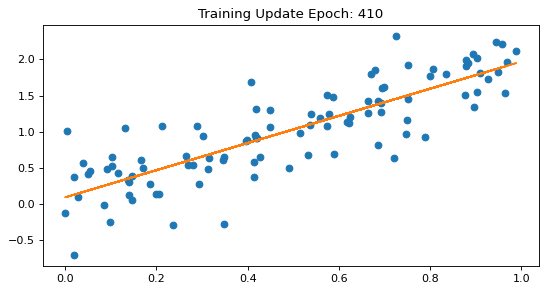

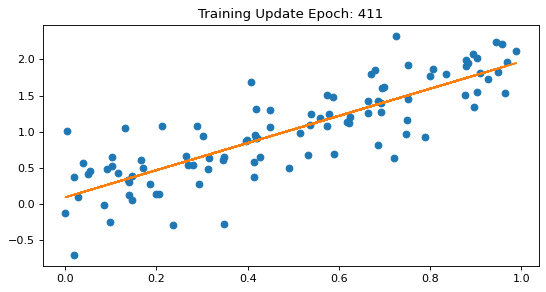

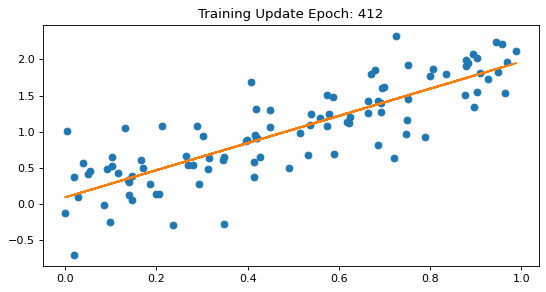

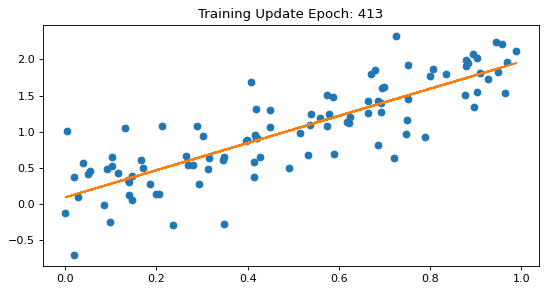

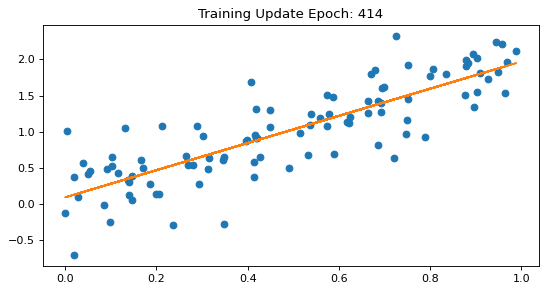

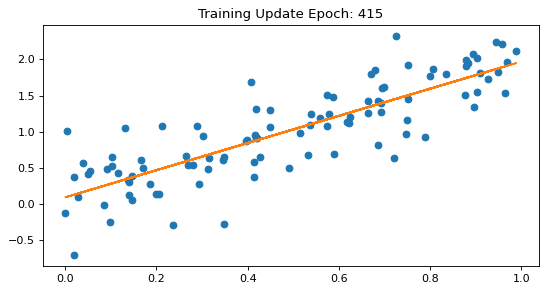

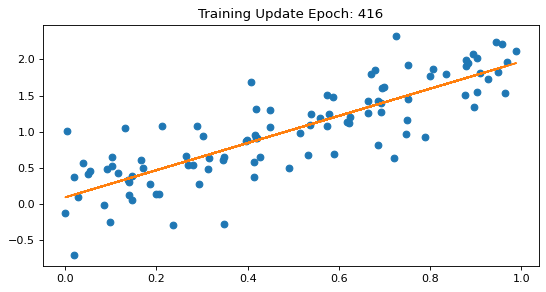

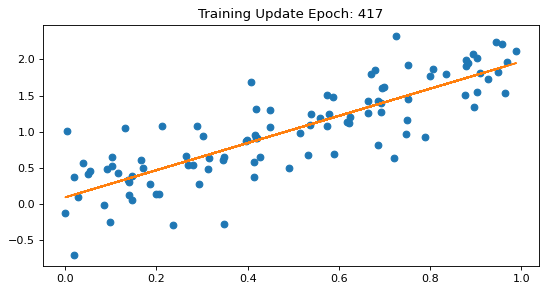

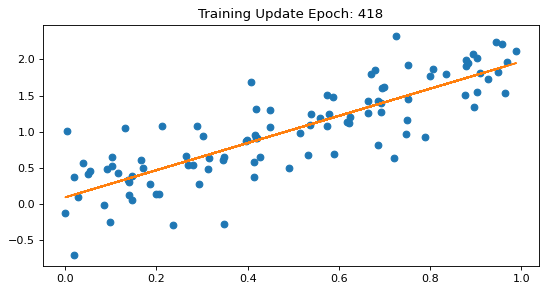

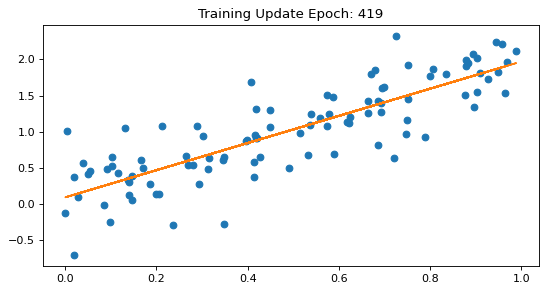

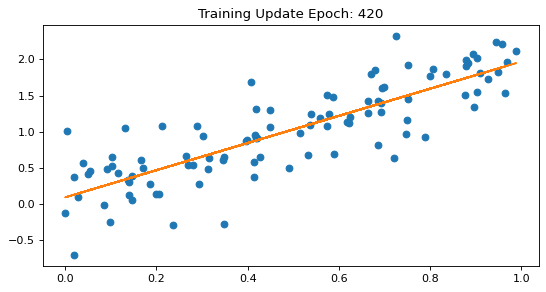

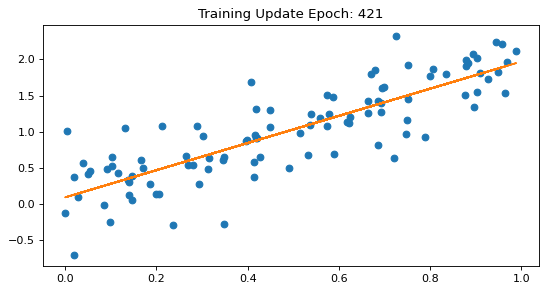

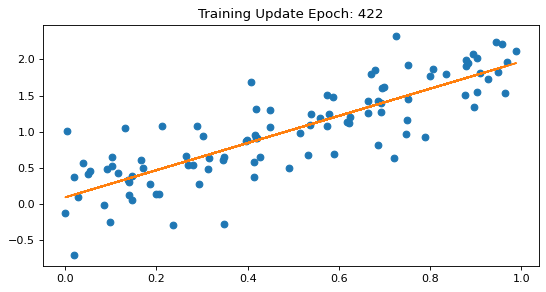

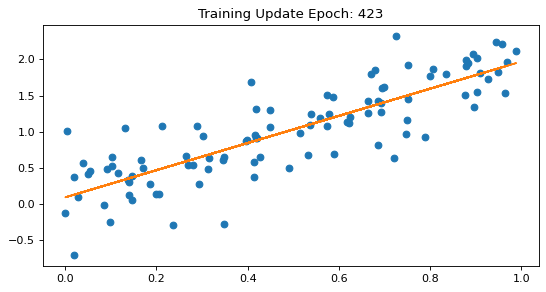

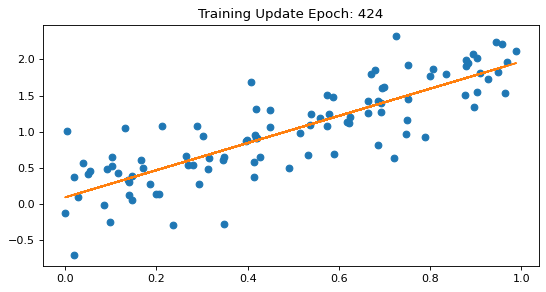

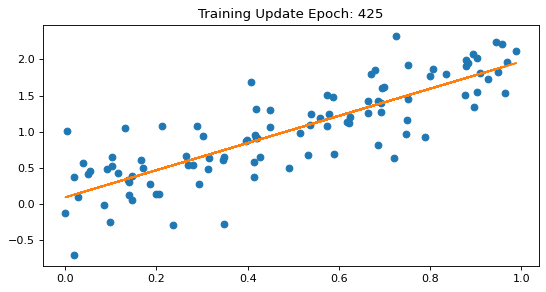

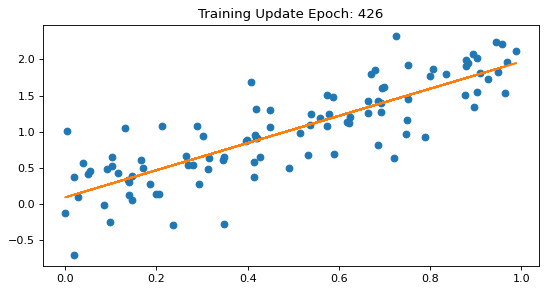

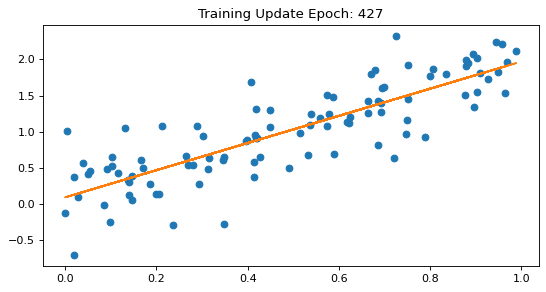

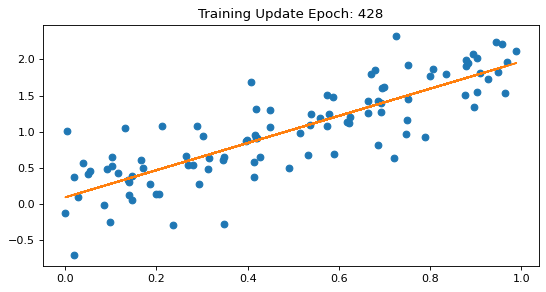

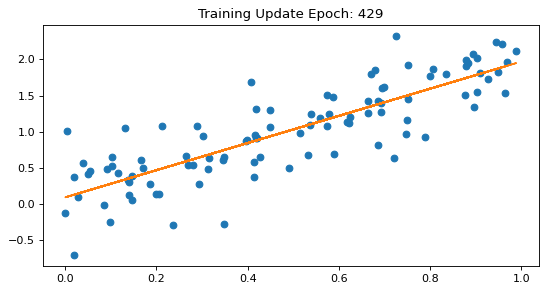

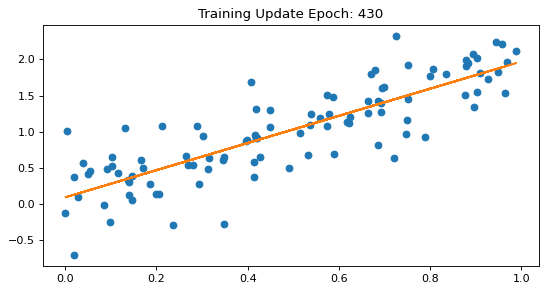

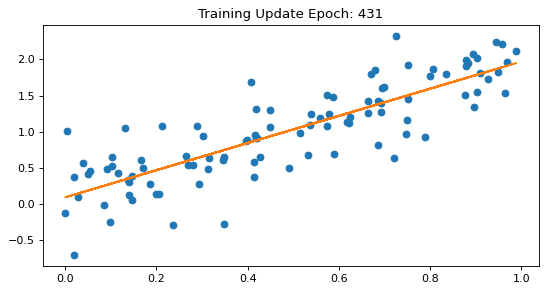

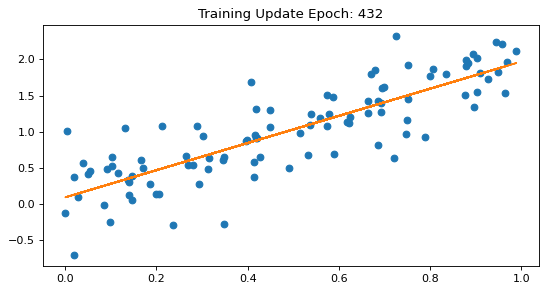

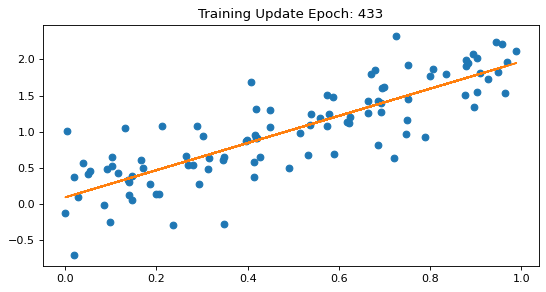

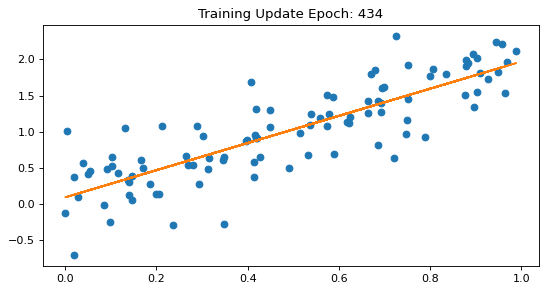

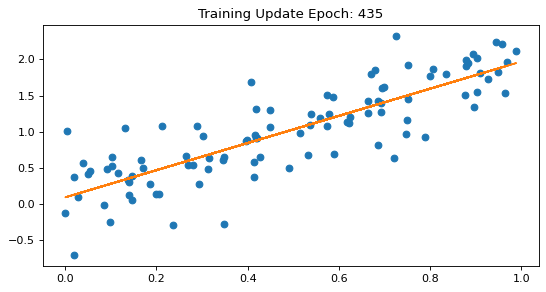

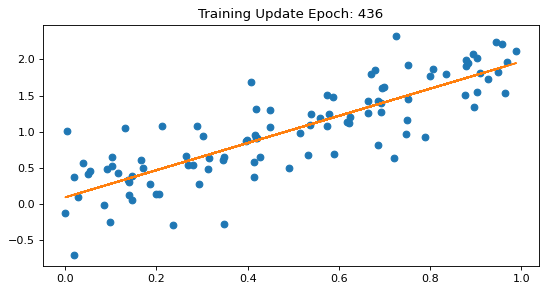

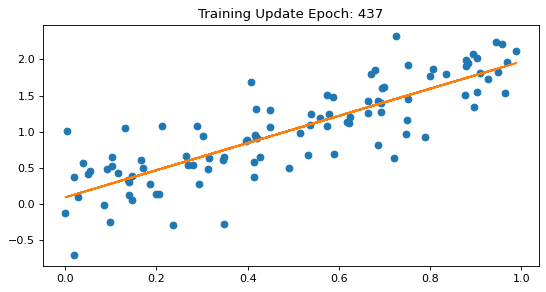

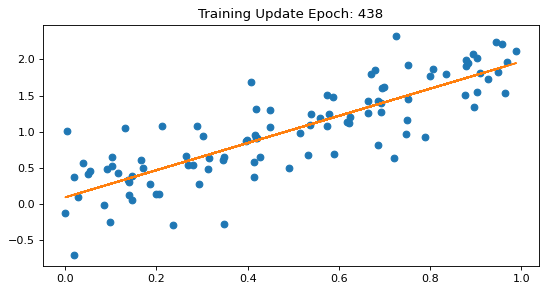

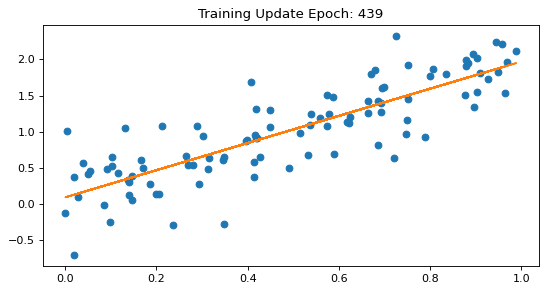

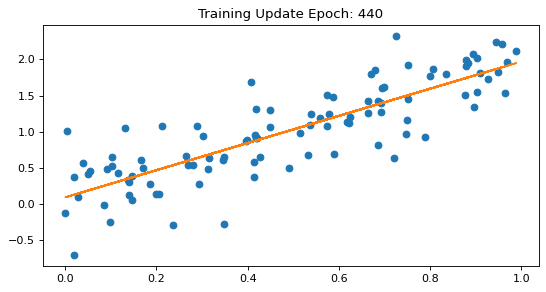

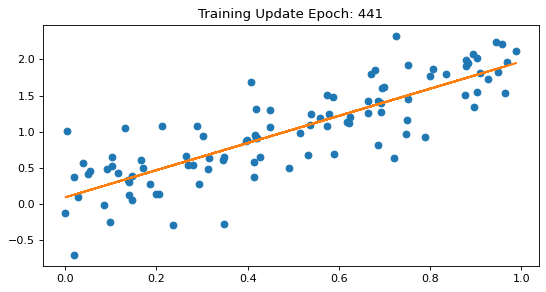

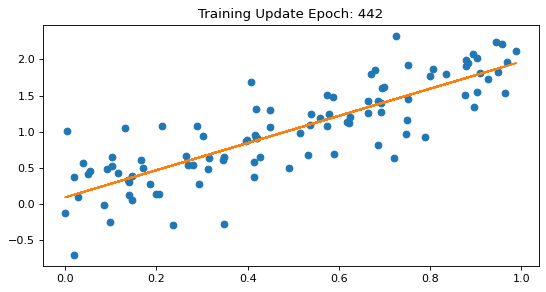

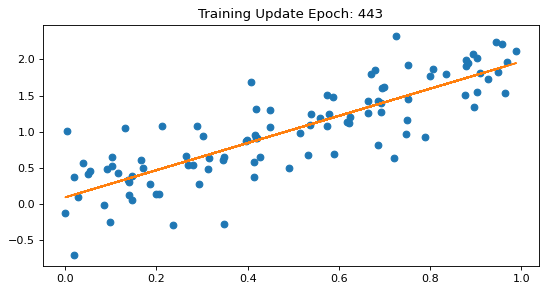

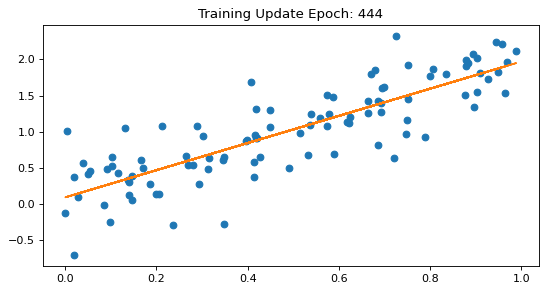

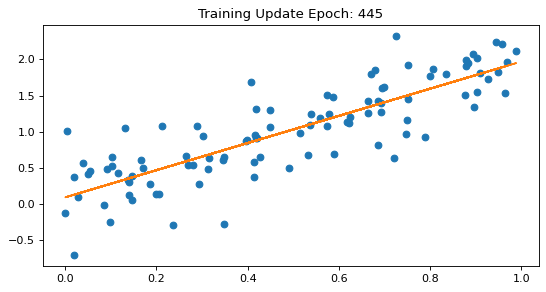

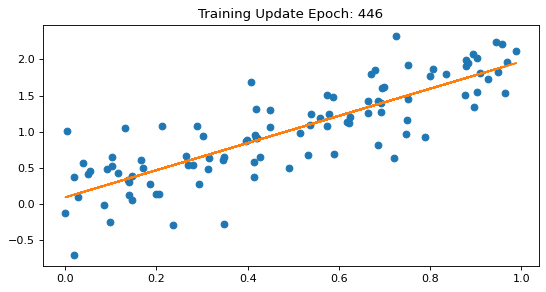

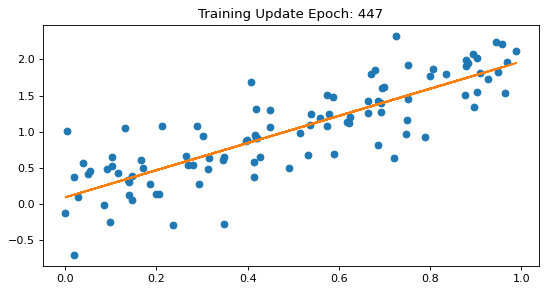

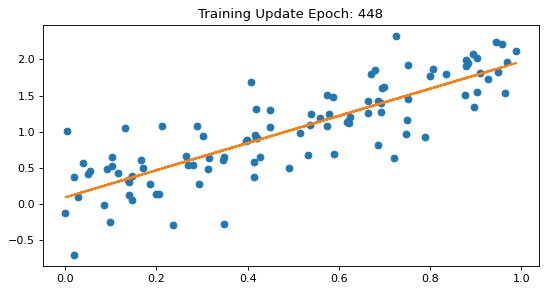

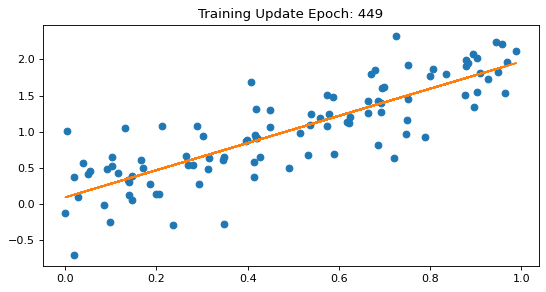

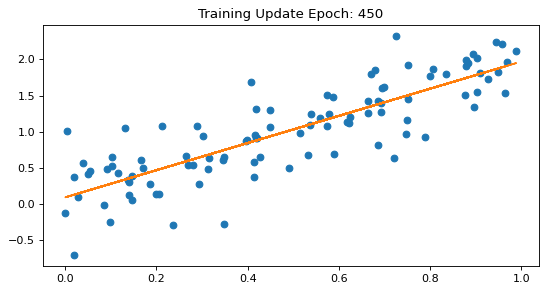

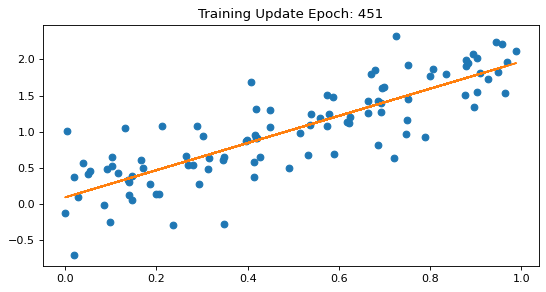

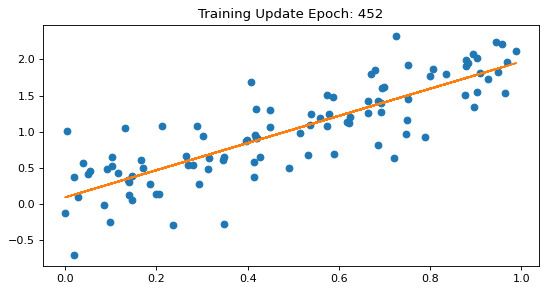

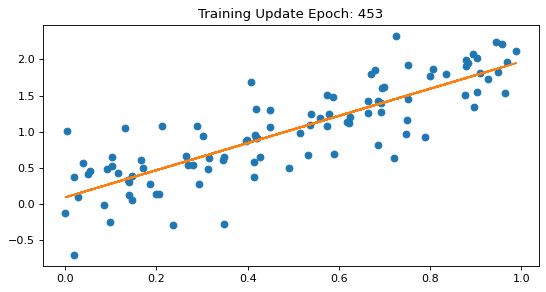

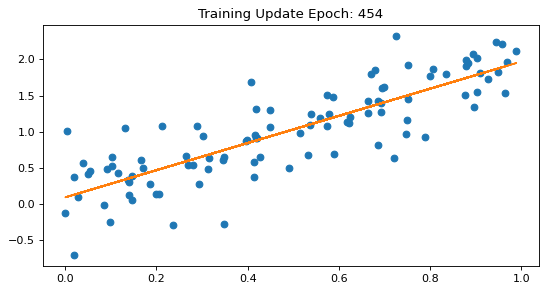

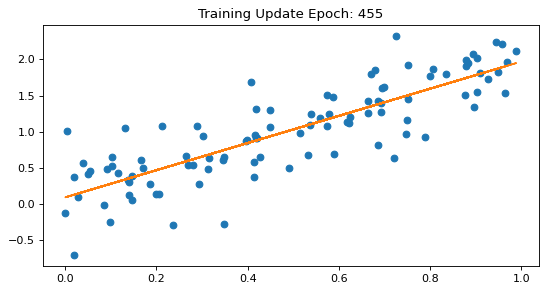

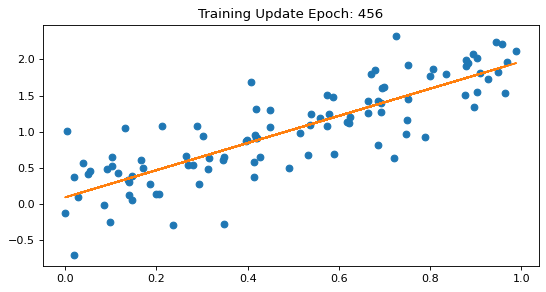

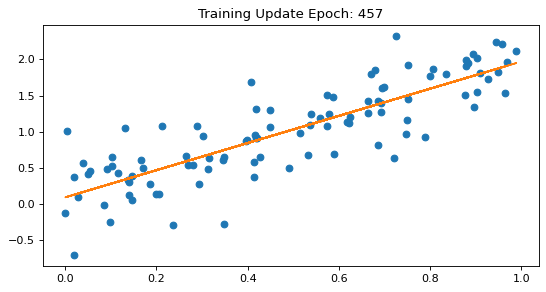

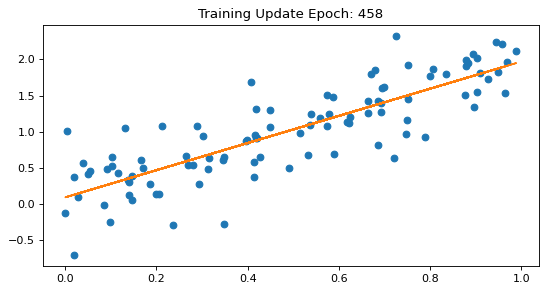

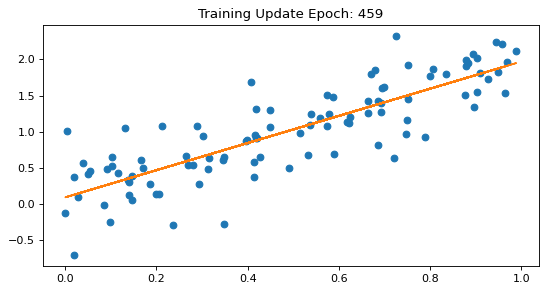

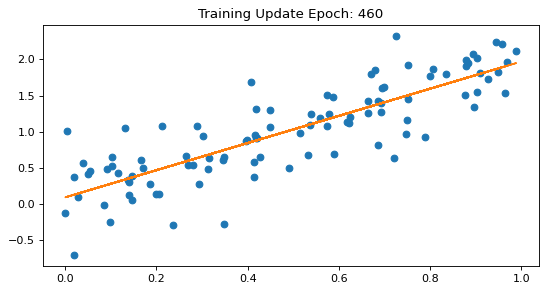

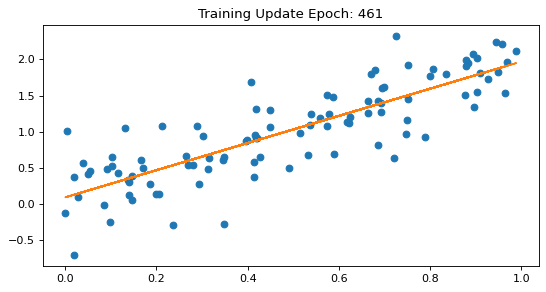

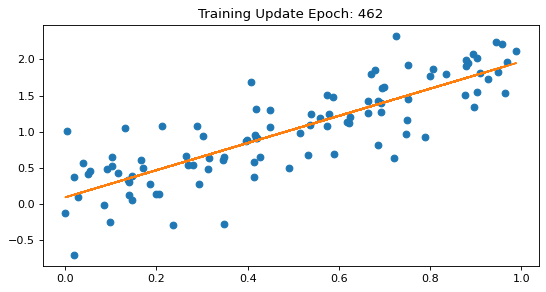

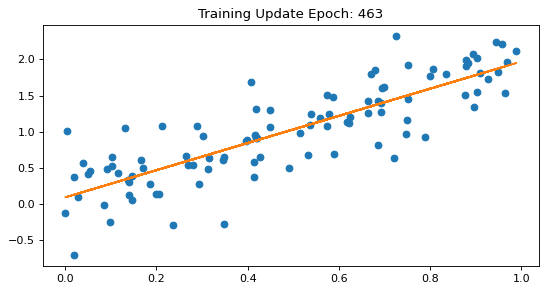

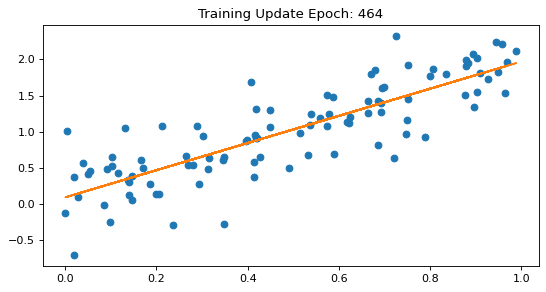

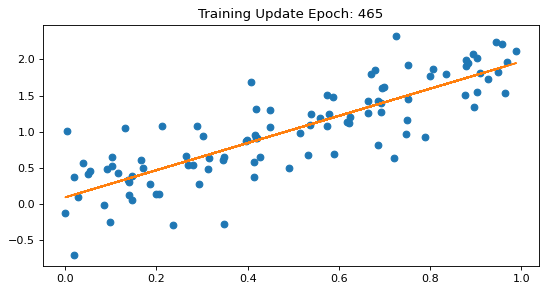

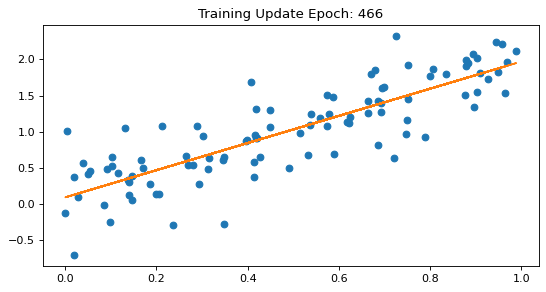

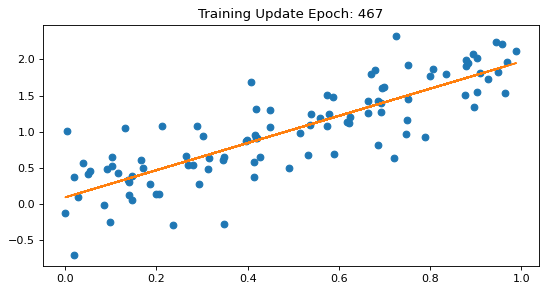

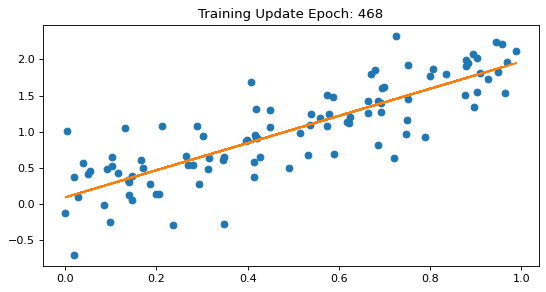

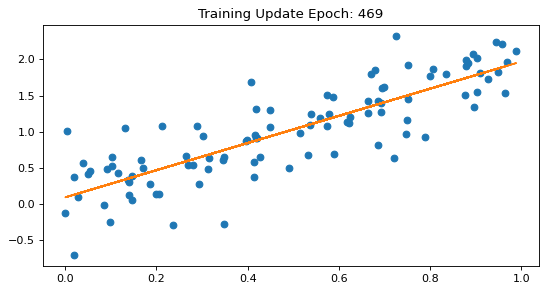

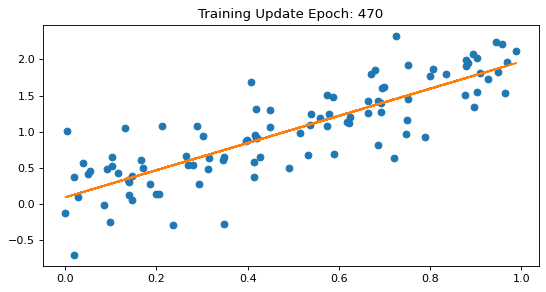

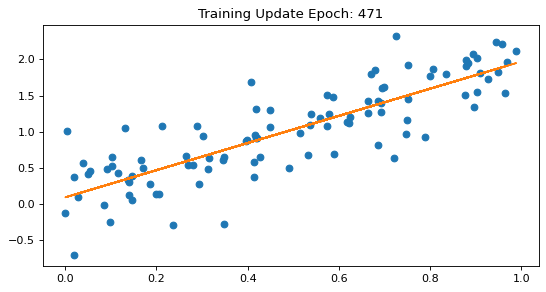

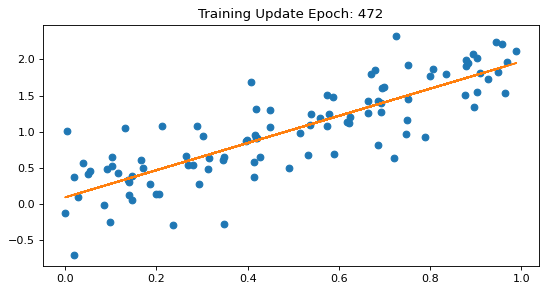

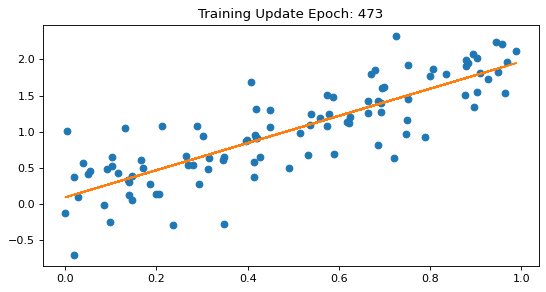

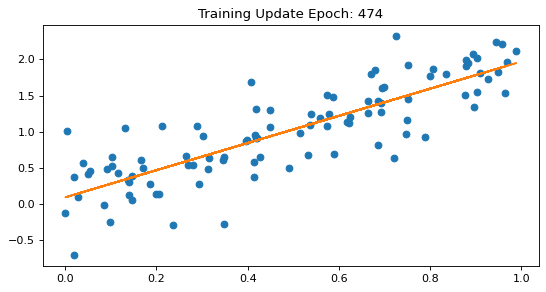

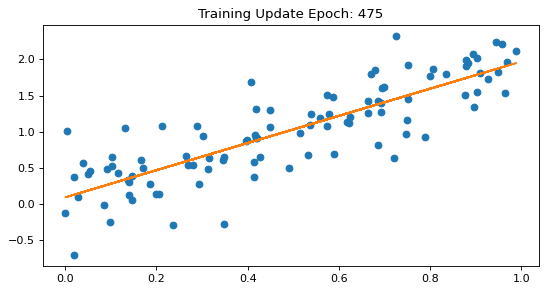

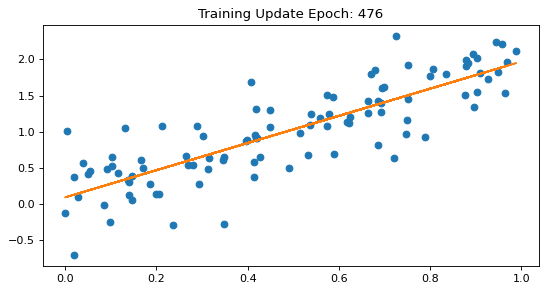

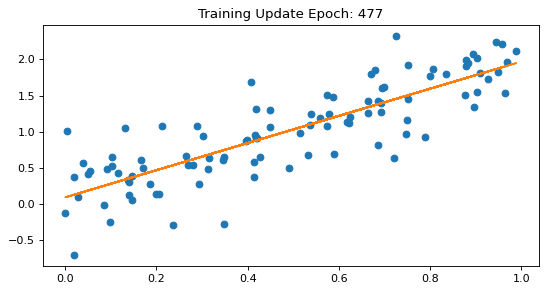

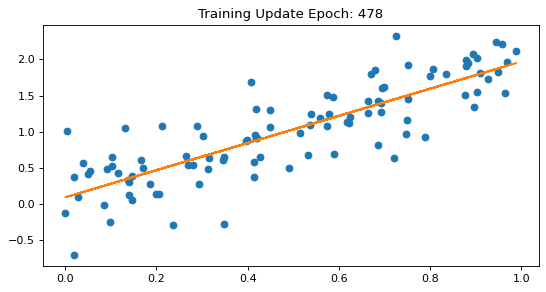

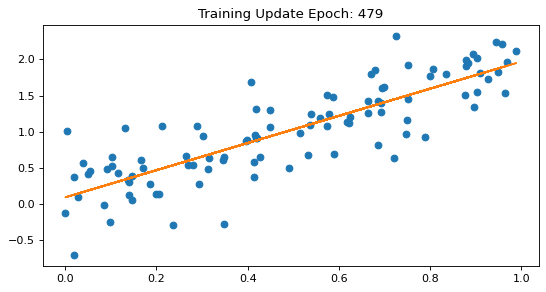

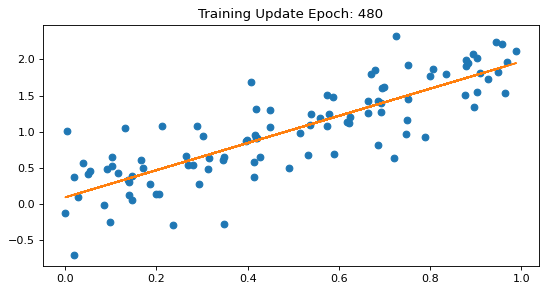

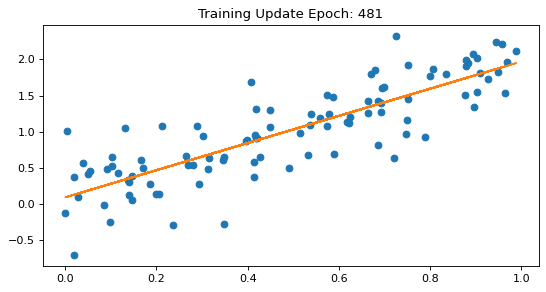

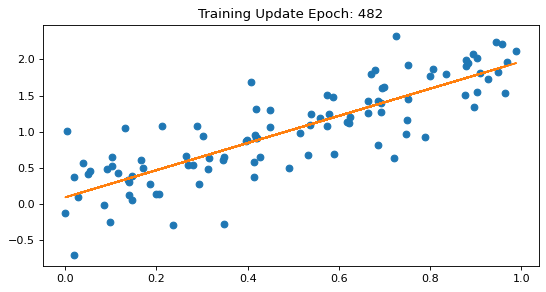

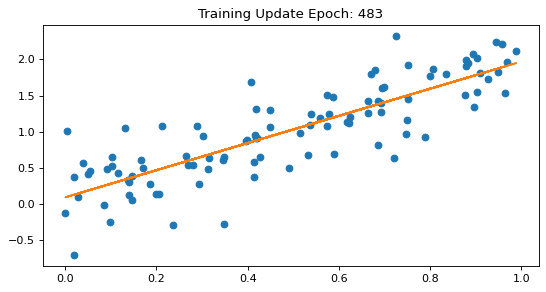

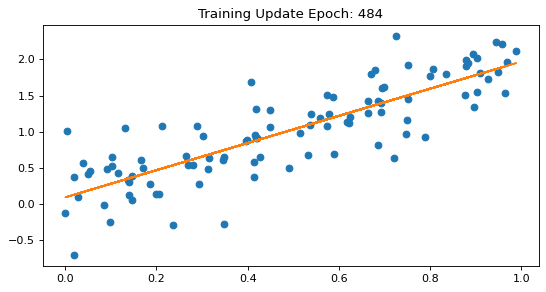

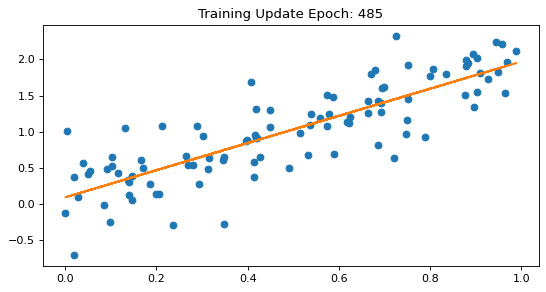

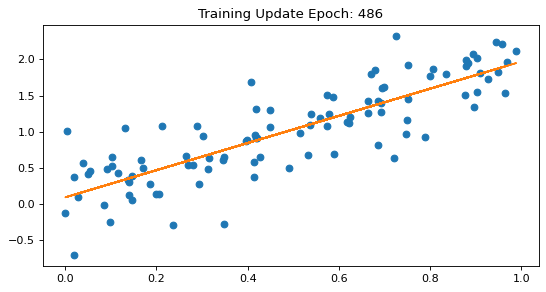

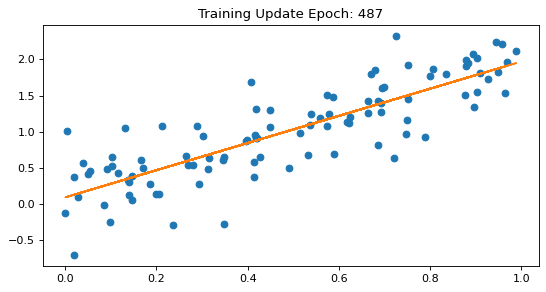

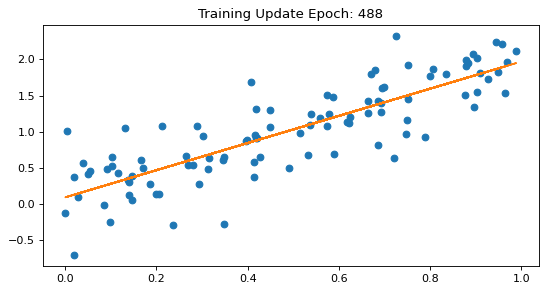

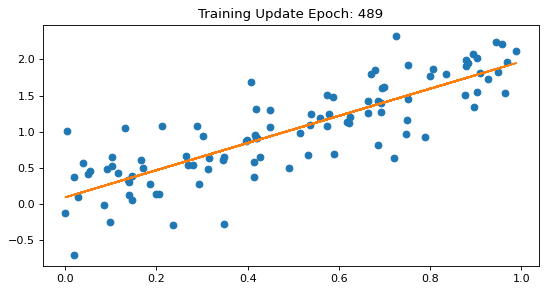

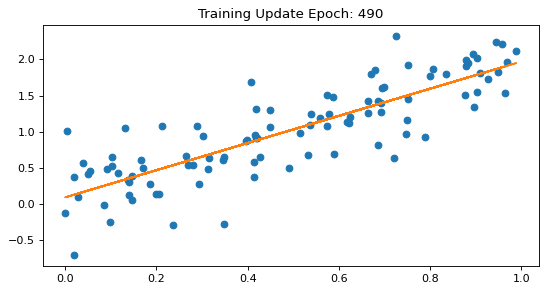

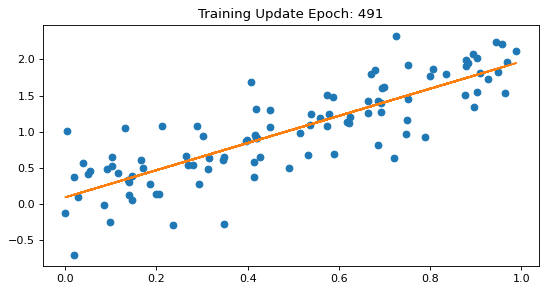

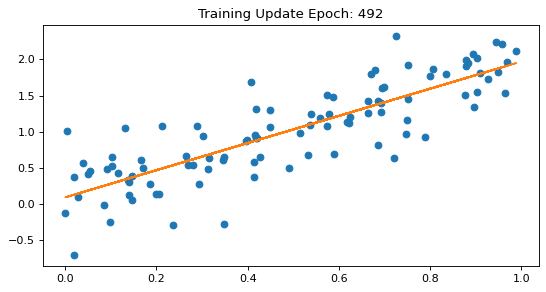

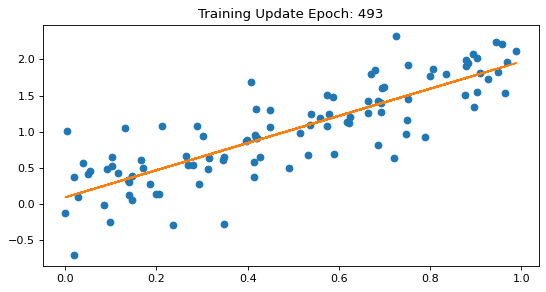

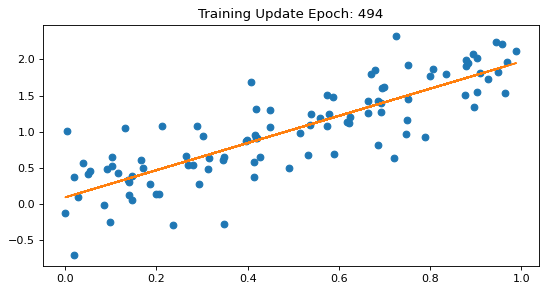

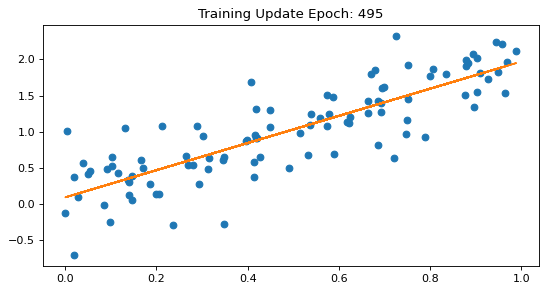

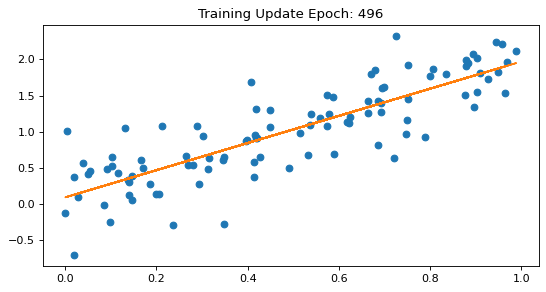

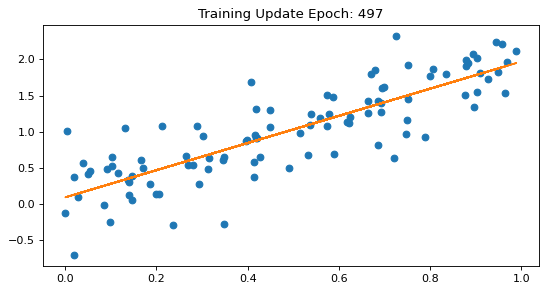

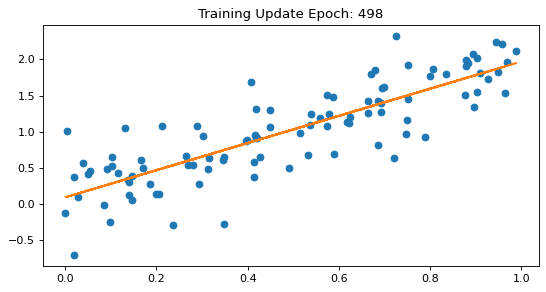

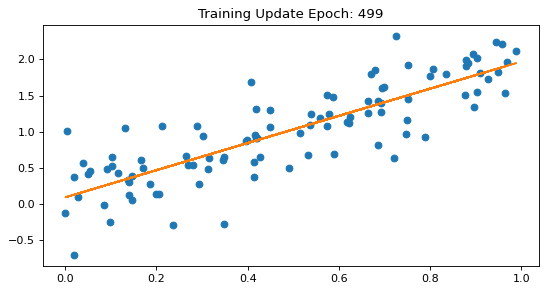

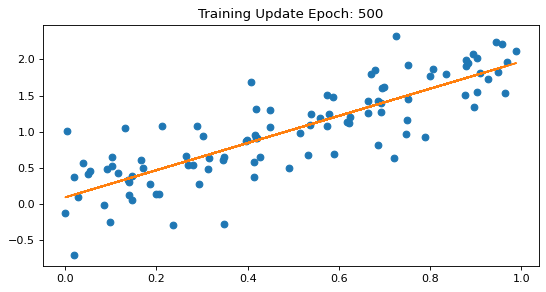

In [11]:
# Compute the weights
weights = model.train(show_training_updates = True)

In [12]:
print("Weights: ", weights)

Weights:  [0.09480628 1.87392429]


In [13]:
# Predict the values
Y_HAT = model.predict(X)

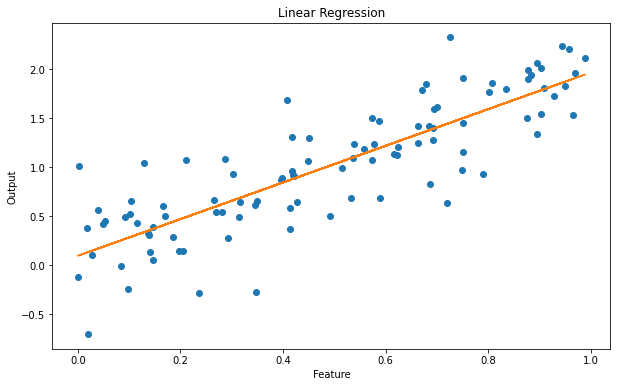

In [14]:
# Plot the regression line
fig= plt.figure(figsize=(10,6))
plt.title("Linear Regression")
plt.xlabel("Feature")
plt.ylabel("Output")
plt.plot(X,Y, marker='o', linestyle='none')
plt.plot(X,Y_HAT)
plt.show()

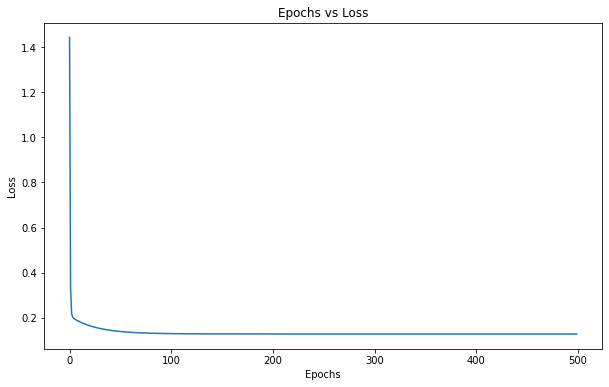

In [15]:
# Plot the regression line
fig= plt.figure(figsize=(10,6))
plt.title("Epochs vs Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(np.arange(epochs),model.loss_history)
plt.show()

### General Model

In [16]:
# General Linear Regression Model - Only 2 weights
class GeneralLinearRegression:
    
    def __init__(self, x, y, learning_rate, epoch):
        # Augment 1 to every instance to accomodate for the Bias
        self.x = np.column_stack((np.ones_like(x), x))
        self.y = y
        self.alpha = learning_rate
        self.epoch = epoch
        # Initiate gradients and weights to zero
        # Number of Samples and Number of Features
        self.samples, self.features = self.x.shape

        self.w = np.zeros(self.features)
        self.gradient = np.zeros(self.features)
    
    # Mean Square Error loss function
    def compute_loss(self):
        error = self.y - self.y_hat
        loss = 1/(self.samples) * np.dot(error.T, error)
        return loss
    
    # Compute gradients
    def compute_gradient(self, x):
        return -(2/self.samples) * sum(np.dot(x.T,(self.y - self.y_hat)))
    
    # Compute Weight using the Gradient descent
    def train(self):
        self.loss_history=[]            
        for i in range(self.epoch):
            # Predict and Calculate Loss
                self.y_hat = np.dot(self.x,self.w)
                loss = self.compute_loss() 
                self.loss_history.append(loss)
            # Perform optimization
                # Compute gradient
                for j in range(self.features):
                    self.gradient[j]  =  self.compute_gradient(self.x[:,j].reshape(-1, 1))
                # Update weights
                self.w = self.w - (self.alpha * self.gradient)
        return self.w
    
    # Predict values for new data
    def predict(self, x):
        return np.dot(self.x, self.w)           

In [17]:
# Initiate Hyperparameters
learning_rate = 0.2
epochs = 500

# Initiate the model
model = GeneralLinearRegression(X, Y, learning_rate, epochs)

In [18]:
# Compute the weights
weights = model.train()
print("Weights: ", weights)

Weights:  [0.09478351 1.87396887]


In [19]:
# Predict the values
Y_HAT = model.predict(X)

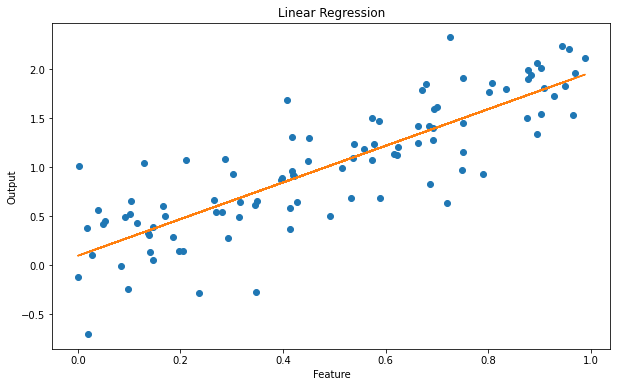

In [20]:
# Plot the regression line
fig= plt.figure(figsize=(10,6))
plt.title("Linear Regression")
plt.xlabel("Feature")
plt.ylabel("Output")
plt.plot(X,Y, marker='o', linestyle='none')
plt.plot(X,Y_HAT)
plt.show()

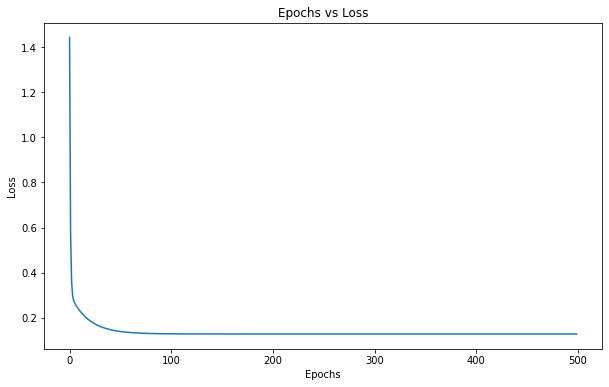

In [21]:
# Plot the regression line
fig= plt.figure(figsize=(10,6))
plt.title("Epochs vs Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(np.arange(epochs),model.loss_history)
plt.show()

**Note:**

If you want to add some additional features to the above implementation, here are a few ideas:

1. Return the history of thetas in addition to the history of losses
2. Implement early stopping

<div style='text-align: center;'>
    <h2>C. Linear Regression using Libraries</h2>
</div>

### scikit-learn

scikit-learn is a Python library that provides simple and efficient tools for predictive data analysis. It offers various algorithms for classification, regression, clustering, dimensionality reduction, model selection and preprocessing.

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [22]:
# Augment 1 to every instance to accomodate for the Bias
DATA = np.column_stack((np.ones_like(X), X))

In [23]:
# Initiating the Multiple Linear Regression model
mlr = LinearRegression()  
# Fitting the Regression model
mlr.fit(DATA, Y)

LinearRegression()

In [24]:
#Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:", mlr.coef_)

Intercept:  0.09478290165956271
Coefficients: [0.         1.87397004]


In [25]:
# Predict the values
Y_HAT = mlr.predict(DATA)

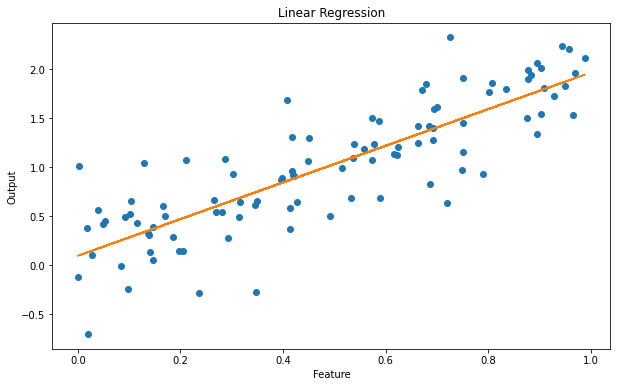

In [26]:
# Plot the regression line
fig= plt.figure(figsize=(10,6))
plt.title("Linear Regression")
plt.xlabel("Feature")
plt.ylabel("Output")
plt.plot(X,Y, marker='o', linestyle='none')
plt.plot(X,Y_HAT)
plt.show()

### statsmodels

statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. 

Documentation: https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html

In [27]:
X1 = sm.add_constant(X)

ols = sm.OLS(Y,X1)

In [28]:
results = ols.fit()

In [29]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     233.1
Date:                Sun, 28 Jan 2024   Prob (F-statistic):           1.18e-27
Time:                        15:33:11   Log-Likelihood:                -39.093
No. Observations:                 100   AIC:                             82.19
Df Residuals:                      98   BIC:                             87.40
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0948      0.070      1.359      0.177      -0.044       0.233
x1             1.8740      0.123     15.268      0.000       1.630       2.118
==============================================================================
Omnibus:                        2.308   Durbin-Watson:                   2.206
Prob(Omnibus):                  0.315   Jarque-Bera (JB):                1.753
Skew:                          -0.189   Prob(JB):                        0.416
Kurtosis:                       3.528   Cond. No.                         4.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
# Predict the values
Y_HAT = results.predict(X1)

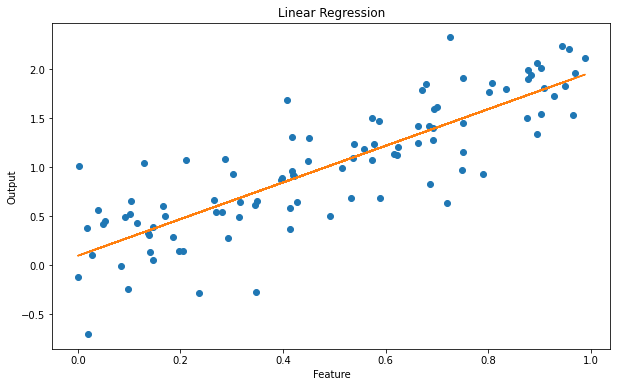

In [31]:
# Plot the regression line
fig= plt.figure(figsize=(10,6))
plt.title("Linear Regression")
plt.xlabel("Feature")
plt.ylabel("Output")
plt.plot(X,Y, marker='o', linestyle='none')
plt.plot(X,Y_HAT)
plt.show()